# ***SISTEMA DE RECOMENDACION DE RECETAS***

El sistema propuesto es un recomendador de recetas basado en técnicas avanzadas de machine learning y análisis de datos, diseñado para ofrecer recomendaciones precisas y adaptadas a las necesidades y preferencias del usuario. Este sistema integrará diversos atributos de cada receta, tales como información nutricional, preferencias personales, tiempo de preparación y popularidad, enriqueciendo la experiencia de búsqueda y selección de recetas. La solución permitirá a los usuarios encontrar recetas que no solo se adapten a sus gustos, sino que también optimicen su experiencia culinaria gracias a las valoraciones y comentarios de otros cocineros.

## **Datos:**
**[recipes_1.csv](https://www.kaggle.com/datasets/shuyangli94/foodcom-recipes-with-search-terms-and-tags)**

Este conjunto de datos consta de 500,000 recetas que abarcan 18 años de cargas enviadas por los usuarios en Food.com. Las variables en este conjunto incluyen:
* `id` -  Identificador único de cada receta.
* `name` - Nombre de la receta.
* `description` - Descripción breve de la receta.
* `ingredients` - Lista de ingredientes utilizados en la receta.
* `ingredients_raw_str` - Cadena de ingredientes y sus cantidades.
* `serving_size` - Tamaño de la porción.
* `servings` - Número de porciones que rinde la receta.
* `steps` - Pasos para preparar la receta.
* `tags` - Etiquetas asociadas a la receta.
* `search_terms` - Términos de búsqueda utilizados para encontrar la receta.

**[recipes_2.csv](https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews)**

Este conjunto de datos contiene 522.517 recetas de Food.com. Proporciona información sobre cada receta complementando los datos del `recipes_1`, incluyendo:
* `RecipeId` - Identificador único de la receta.
* `CookTime` - Tiempo de cocción.
* `PrepTime` - Tiempo de preparación.
* `Calories` - Calorías por porción.
* `FatContent` - Contenido de grasa.
* `SaturatedFatContent` - Contenido de grasas saturadas.
* `SodiumContent` - Contenido de sodio.
* `CarbohydrateContent` - Contenido de carbohidratos.
* `FiberContent` - Contenido de fibra.
* `SugarContent` - Contenido de azúcares.
* `ProteinContent` - Contenido de proteínas.

**[reviews.csv](https://www.kaggle.com/datasets/irkaal/foodcom-recipes-and-reviews)**

Este conjunto de datos contiene 1,401,982 reseñas de 271,907 usuarios diferentes de recetas de Food.com. Ofrece información sobre el autor de la reseña, la calificación, el texto de la reseña, entre otros:
* `ReviewId` - Identificador único de la reseña.
* `RecipeId` - Identificador de la receta a la que pertenece la reseña.
* `AuthorId` - Identificador del autor de la reseña.
* `Rating` - Calificación otorgada a la receta.
* `Review` - Texto de la reseña.
* `DateSubmitted` - Fecha en que se envió la reseña.


# ***NOTEBOOK 1: PREPROCESAMEINTO***

# **Carga de los datos**

*   **Librerias**

In [1]:
!pip install google-cloud-storage pandas

In [2]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached regex-2024.11.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (40 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (781 kB)


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import ast
from wordcloud import WordCloud
import nltk
import re

*   **Dataset 1: Recipes**

In [4]:
from google.cloud import storage
import pandas as pd

# Configura el nombre de tu bucket y archivo
bucket_name = 'mi-bucket-tfg'
file_path = 'datos/recipes_1.csv'
local_path = '/tmp/recipes_1_local.csv'

# Conectar a Google Cloud Storage
client = storage.Client()
bucket = client.bucket(bucket_name)
blob = bucket.blob(file_path)
blob.download_to_filename(local_path)

# Cargar el archivo CSV en un DataFrame
df_recipes_1 = pd.read_csv(local_path)
df_recipes_1.head()

,id,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms
0,96313,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low..."
1,232037,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}"
2,41090,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg..."
3,60656,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}"
4,232047,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'}


In [5]:
df_recipes_1.columns

Index(['id', 'name', 'description', 'ingredients', 'ingredients_raw_str',
       'serving_size', 'servings', 'steps', 'tags', 'search_terms'],
      dtype='object')

*   **Dataset 2: Macros & Time**

In [6]:
# Configura el nombre de tu bucket y archivo
bucket_name = 'mi-bucket-tfg'
file_path = 'datos/recipes_2.csv'
local_path = '/tmp/recipes_2_local.csv'

# Conectar a Google Cloud Storage
client = storage.Client()
bucket = client.bucket(bucket_name)
blob = bucket.blob(file_path)
blob.download_to_filename(local_path)

columns_to_use = ['RecipeId', 'CookTime', 'PrepTime', 'Calories', 'FatContent', 'SaturatedFatContent', 'SodiumContent',
                  'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent']

df_recipes_2 = pd.read_csv(local_path, usecols=columns_to_use)
df_recipes_2.head()

,RecipeId,CookTime,PrepTime,Calories,FatContent,SaturatedFatContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,38,PT24H,PT45M,170.9,2.5,1.3,29.8,37.1,3.6,30.2,3.2
1,39,PT25M,PT4H,1110.7,58.8,16.6,368.4,84.4,9.0,20.4,63.4
2,40,PT5M,PT30M,311.1,0.2,0.0,1.8,81.5,0.4,77.2,0.3
3,41,PT20M,PT24H,536.1,24.0,3.8,1558.6,64.2,17.3,32.1,29.3
4,42,PT30M,PT20M,103.6,0.4,0.1,959.3,25.1,4.8,17.7,4.3


In [7]:
df_recipes_2.columns

Index(['RecipeId', 'CookTime', 'PrepTime', 'Calories', 'FatContent',
       'SaturatedFatContent', 'SodiumContent', 'CarbohydrateContent',
       'FiberContent', 'SugarContent', 'ProteinContent'],
      dtype='object')

*   **Dataset 3: Reviews**

In [8]:
# Configura el nombre de tu bucket y archivo
bucket_name = 'mi-bucket-tfg'
file_path = 'datos/datos-reviews.csv'
local_path = '/tmp/datos-reviews.csv'

# Conectar a Google Cloud Storage
client = storage.Client()
bucket = client.bucket(bucket_name)
blob = bucket.blob(file_path)
blob.download_to_filename(local_path)

columns_to_use = ['ReviewId', 'RecipeId', 'AuthorId', 'Rating', 'Review', 'DateSubmitted']

df_reviews = pd.read_csv(local_path, usecols=columns_to_use)
df_reviews.head()

,ReviewId,RecipeId,AuthorId,Rating,Review,DateSubmitted
0,2,992,2008,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z
1,7,4384,1634,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z
2,9,4523,2046,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z
3,13,7435,1773,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z
4,14,44,2085,5,An excellent dish.,2000-03-28T12:51:00Z


In [9]:
df_reviews.columns

Index(['ReviewId', 'RecipeId', 'AuthorId', 'Rating', 'Review',
       'DateSubmitted'],
      dtype='object')

# **1. Preprocesamiento de Recipes**
El preprocesamiento de datos es una etapa crucial en el análisis de datos que consiste en transformar y limpiar la información cruda para hacerla adecuada para su análisis o modelado. Este proceso incluye varias tareas, como la eliminación de valores faltantes o duplicados, la normalización de valores, la transformación de tipos de datos, y la conversión de texto en formato adecuado para su análisis (por ejemplo, listas, palabras clave, etc.). El objetivo principal del preprocesamiento es mejorar la calidad de los datos y facilitar su uso en modelos de aprendizaje automático o análisis estadístico, garantizando resultados más precisos y consistentes.

Primero unamos los datasets.

In [10]:
df_recipes = pd.merge(df_recipes_1, df_recipes_2, left_on='id', right_on='RecipeId', how='left')

In [11]:
df_recipes.drop(columns=['id'], inplace=True)

Una primera vista a las base de datos:

In [12]:
df_recipes.head()

,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,RecipeId,CookTime,PrepTime,Calories,FatContent,SaturatedFatContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
0,Grilled Garlic Cheese Grits,"We love grits, this is another good way to ser...","['water', 'grits', 'salt', 'cheddar cheese', '...","[""4 cups water"",""1 cup uncooked old f...",1 (155 g),8,"['I a sauce pan, bring water to a boil; slowly...","['time-to-make', 'course', 'main-ingredient', ...","{'diabetic', 'low-calorie', 'vegetarian', 'low...",96313.0,PT50M,PT15M,144.8,6.7,3.3,382.7,15.7,0.9,0.2,5.0
1,Simple Shrimp and Andouille Jambalaya,"Simple, easy and very tasty for when you are i...","['onion', 'red bell pepper', 'garlic cloves', ...","[""1 medium onion, chopped coarse "",""1 m...",1 (366 g),4,"['In a food processor, pulse the onion, red pe...","['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'shrimp'}",232037.0,PT25M,PT20M,756.5,28.9,9.0,2094.9,82.3,3.9,9.7,39.2
2,black-and-white bean salad,NaN,"['white beans', 'canned black beans', 'tomatoe...","[""1 cup canned white beans, rinsed and dra...",1 (807 g),1,"['In a large bowl, combine beans, tomato, onio...","['15-minutes-or-less', 'time-to-make', 'course...","{'vegetarian', 'salad', 'side', 'dinner', 'veg...",41090.0,NaN,PT5M,159.0,1.6,0.3,318.3,28.3,8.3,2.1,9.1
3,Crock Pot Italian Zucchini,This is a good recipe for weight watchers. It ...,"['zucchini', 'yellow squash', 'diced tomatoes'...","[""2 zucchini, sliced "",""2 small yel...",1 (244 g),4,['Put all ingredients in the crock pot and coo...,"['weeknight', 'time-to-make', 'course', 'main-...","{'side', 'vegetarian', 'italian'}",60656.0,PT6H,PT10M,47.1,0.4,0.1,19.1,10.4,2.7,4.6,2.6
4,Beef Stew With Dried Cherries,This is a fabulous stew that came from one of ...,"['beef stew meat', 'flour', 'salt', 'allspice'...","[""3 lbs beef stew meat"",""3 tablespoons ...",1 (358 g),8,"['Preheat oven to 350°F.', ""Cut beef into 1 in...","['time-to-make', 'course', 'main-ingredient', ...",{'dinner'},232047.0,PT2H,PT45M,691.1,45.8,17.7,503.6,14.4,1.6,6.8,48.2


In [13]:
# Identificar cantidad de filas y columnas
print(f"El dataset de recetas tiene {len(df_recipes)} registros y {len(df_recipes.columns)} columnas")

El dataset de recetas tiene 494963 registros y 20 columnas


Veamos la columnas de cada base:

In [14]:
print(f"Las columnas con las que cuenta el dataset de recetas son las siguientes:")
for col in df_recipes.columns:
    print(f"- {col}")

Las columnas con las que cuenta el dataset de recetas son las siguientes:
- name
- description
- ingredients
- ingredients_raw_str
- serving_size
- servings
- steps
- tags
- search_terms
- RecipeId
- CookTime
- PrepTime
- Calories
- FatContent
- SaturatedFatContent
- SodiumContent
- CarbohydrateContent
- FiberContent
- SugarContent
- ProteinContent


Informacion del dataset:

In [15]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494963 entries, 0 to 494962
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 494963 non-null  object 
 1   description          485362 non-null  object 
 2   ingredients          494963 non-null  object 
 3   ingredients_raw_str  494963 non-null  object 
 4   serving_size         494963 non-null  object 
 5   servings             494963 non-null  int64  
 6   steps                494963 non-null  object 
 7   tags                 494963 non-null  object 
 8   search_terms         494963 non-null  object 
 9   RecipeId             494949 non-null  float64
 10  CookTime             422827 non-null  object 
 11  PrepTime             494949 non-null  object 
 12  Calories             494949 non-null  float64
 13  FatContent           494949 non-null  float64
 14  SaturatedFatContent  494949 non-null  float64
 15  SodiumContent    

In [16]:
print(f"La cantidad de registros duplicados del dataset de recetas es: {df_recipes.duplicated().sum ()}")

La cantidad de registros duplicados del dataset de recetas es: 0


## **1.1. Tratamiento de Nulos**

Veamos la cantidad de nulos de nuevo:

In [17]:
print("Porcentaje de nulos por variable en df:")
(df_recipes.isnull().sum().sort_values()/len(df_recipes))*100

Porcentaje de nulos por variable en df:


name                    0.000000
ingredients             0.000000
ingredients_raw_str     0.000000
serving_size            0.000000
servings                0.000000
steps                   0.000000
tags                    0.000000
search_terms            0.000000
FiberContent            0.002828
CarbohydrateContent     0.002828
SodiumContent           0.002828
SaturatedFatContent     0.002828
FatContent              0.002828
RecipeId                0.002828
PrepTime                0.002828
SugarContent            0.002828
Calories                0.002828
ProteinContent          0.002828
description             1.939741
CookTime               14.574019
dtype: float64

Dado que los macronutrientes tienen el mismo porcentaje de nulos, veamos si estos pertenecen a los mismos registros:

In [18]:
variables_a_verificar = [
    'FiberContent', 'CarbohydrateContent', 'SodiumContent', 'SaturatedFatContent',
    'FatContent', 'RecipeId', 'PrepTime', 'SugarContent', 'Calories', 'ProteinContent'
]

df_nulos = df_recipes[df_recipes[variables_a_verificar].isnull().any(axis=1)]

df_nulos

,name,description,ingredients,ingredients_raw_str,serving_size,servings,steps,tags,search_terms,RecipeId,CookTime,PrepTime,Calories,FatContent,SaturatedFatContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
28948,Palermo Style Pizza,This is a outstanding pizza if you like making...,"['pizza dough', 'pizza sauce', 'onions', 'beef...","[""1 recipe sicilian style pizza dough"",""1...",1 (202 g),4,['Prepare the Sicilian Style Pizza Dough. Prep...,"['60-minutes-or-less', 'time-to-make', 'course...","{'pizza', 'dinner', 'italian'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74601,Butternut Squash Ravioli With Sage Butter,This ravioli is made with wonton wrappers inst...,"['butternut squash', 'extra virgin olive oil',...","[""1 (1 1/2 lb) butternut squash, halved an...",1 (157 g),6,['Preheat the oven to 400°F Brush the olive oi...,"['time-to-make', 'course', 'main-ingredient', ...","{'appetizer', 'dinner', 'vegetarian', 'pasta'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86778,Sunny Slices,"These cookies, with their subtle citrus flavor...","['granulated sugar', 'butter', 'eggs', 'orange...","["""",""1 1/2 cups granulated sugar, divided ...",1 (1100 g),1,"['In a large bowl, using an electric mixer , b...","['60-minutes-or-less', 'time-to-make', 'course...","{'dessert', 'low-calorie', 'low-sodium', 'low-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121380,Chocolate-Almond Daim Cupcakes,From missginsu.com Almond cupcakes with crush...,"['eggs', 'almond paste', 'cream', 'cake flour'...","[""3 eggs, SEPARATED "",""8 ounces alm...",1 (90 g),6,"['Preheat the oven to 350°F.', 'Grease and flo...","['time-to-make', 'course', 'cuisine', 'prepara...",{'dessert'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123223,Amazing Veggie Burgers,"A tasty black bean burger with onion, BBQ sauc...","['black beans', 'onion', 'garlic clove', 'egg'...","[""1 (540 ml) can black beans"",""1/3 cup ...",1 (119 g),6,"['Drain beans, then rinse with cold water. Dra...","['30-minutes-or-less', 'time-to-make', 'course...","{'healthy', 'dinner', 'lunch'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214022,Jen's Crab Meat Rangoon,I came up with this version when I was trying ...,"['crabmeat', 'cream cheese', 'scallions', 'gar...","[""6 ounces crabmeat"",""6 ounces cream...",1 (40 g),12,['Mix all ingredients together in a small bowl...,"['15-minutes-or-less', 'time-to-make', 'course...",{'appetizer'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222594,Pumpkin Pie With Molasses,A variation of a traditional classic. We serv...,"['unbaked 9-inch pie crust', 'pumpkin puree', ...","[""1 unbaked 9-inch pie crust"",""1 (15 o...",1 (147 g),8,"['Preheat oven to 450 degrees F.', 'Prick the ...","['time-to-make', 'course', 'main-ingredient', ...","{'dessert', 'pie'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
242794,Pappa Al Pomodoro,"This recipe comes from my mother, my granmothe...","['tomatoes', 'stale bread', 'carrot', 'thyme',...","[""500 g peeled tomatoes, chopped "",""250 ...",1 (129 g),4,"['Lighet fried carrot, red onion. In 10 minute...","['60-minutes-or-less', 'time-to-make', 'course...",{'appetizer'},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312146,Double Crunch Honey Garlic Chicken,From Rock's Recipes made popular via Pinterest...,"['boneless skinless chicken breasts', 'salt', ...","["""",""4 large boneless skinless chicken br...",1 (259 g),4,['To make the Honey Garlic Sauce: In a small ...,"['60-minutes-or-less', 'time-to-make', 'course...","{'dinner', 'chicken'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
324293,Scotch Pancakes,These are so delicious! I actually used half ...,"['flour', 'sugar', 'salt', 'baking soda', 'cre...","[""2 cups flour"",""3 tablespoons sugar...",1 (111 g),6,"['Mix dry ingredients.', 'Cut in the shortenin...","['60-minutes-or-less', 'time-to-make', 'prepar...","{'healthy', 'breakfast'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Es evidente que los valores nulos corresponden a los mismos registros, lo cual no es casual, ya que estos provienen de la unión de los DataFrames. Por lo tanto, vamos a eliminar dichos registros. Además, eliminaremos los registros con valores nulos en las columnas `description` y `CookTime`, ya que estas variables son importantes para el sistema de recomendación. No podemos imputar estos valores, ya que hacerlo podría no ser representativo de la realidad y podría introducir sesgos que afecten la calidad y precisión de los resultados de nuestro análisis.

In [19]:
df_recipes.dropna(inplace=True)

Verifiquemos que se hayan eliminado correctamente.

In [20]:
print("Porcentaje de nulos por variable en df:")
(df_recipes.isnull().sum().sort_values()/len(df_recipes))*100

Porcentaje de nulos por variable en df:


name                   0.0
FiberContent           0.0
CarbohydrateContent    0.0
SodiumContent          0.0
SaturatedFatContent    0.0
FatContent             0.0
Calories               0.0
PrepTime               0.0
CookTime               0.0
RecipeId               0.0
search_terms           0.0
tags                   0.0
steps                  0.0
servings               0.0
serving_size           0.0
ingredients_raw_str    0.0
ingredients            0.0
description            0.0
SugarContent           0.0
ProteinContent         0.0
dtype: float64

## **1.2. Transformacion de Variables**

En primer lugar renombremos las variables:

In [21]:
df_recipes.columns = df_recipes.columns.str.replace('([A-Z])', r'_\1', regex=True).str.lower().str.replace('_+', '_', regex=True).str.strip('_')

df_recipes.columns

Index(['name', 'description', 'ingredients', 'ingredients_raw_str',
       'serving_size', 'servings', 'steps', 'tags', 'search_terms',
       'recipe_id', 'cook_time', 'prep_time', 'calories', 'fat_content',
       'saturated_fat_content', 'sodium_content', 'carbohydrate_content',
       'fiber_content', 'sugar_content', 'protein_content'],
      dtype='object')

Veamos que variables son numericas y cuales categoricas:

In [22]:
variables_numericas = df_recipes.select_dtypes(include=['int', 'float'])
print("Veamos las variables numéricas del dataset:")
for columna in variables_numericas.columns:
    print(f"- {columna}")

Veamos las variables numéricas del dataset:
- servings
- recipe_id
- calories
- fat_content
- saturated_fat_content
- sodium_content
- carbohydrate_content
- fiber_content
- sugar_content
- protein_content


In [23]:
variables_categoricas = df_recipes.select_dtypes(include=['object'])
print("Veamos las variables categoricas del dataset:")
for columna in variables_categoricas.columns:
    print(f"- {columna}")

Veamos las variables categoricas del dataset:
- name
- description
- ingredients
- ingredients_raw_str
- serving_size
- steps
- tags
- search_terms
- cook_time
- prep_time


### ***Variable: serving_size***

Para mejorar la calidad de los datos en el análisis, se llevó a cabo un proceso de extracción de información de la columna serving_size, que contiene las cantidades de porción en un formato que incluye valores y unidades entre paréntesis. Este formato dificultaba el análisis posterior, por lo que se utilizó una expresión regular para extraer tanto el valor numérico como la unidad de medida asociada. La extracción se realizó de manera que el valor se almacenara en una nueva columna llamada amount, convirtiendo el dato a tipo float para facilitar cálculos, mientras que la unidad de medida se almacenó en otra columna llamada unit. De este modo, se obtuvieron datos estructurados y fácilmente manipulables, lo que permite un análisis más efectivo de las porciones de los productos en el conjunto de recetas.

In [24]:
df_recipes.serving_size.unique()[:100]

array(['1 (155 g)', '1 (366 g)', '1 (244 g)', '1 (358 g)', '1 (832 g)',
       '1 (85 g)', '1 (499 g)', '1 (362 g)', '1 (103 g)', '1 (94 g)',
       '1 (28 g)', '1 (610 g)', '1 (250 g)', '1 (895 g)', '1 (74 g)',
       '1 (622 g)', '1 (205 g)', '1 (388 g)', '1 (174 g)', '1 (525 g)',
       '1 (7 g)', '1 (539 g)', '1 (343 g)', '1 (921 g)', '1 (435 g)',
       '1 (52 g)', '1 (658 g)', '1 (115 g)', '1 (77 g)', '1 (81 g)',
       '1 (185 g)', '1 (538 g)', '1 (298 g)', '1 (72 g)', '1 (273 g)',
       '1 (43 g)', '1 (230 g)', '1 (862 g)', '1 (40 g)', '1 (601 g)',
       '1 (109 g)', '1 (86 g)', '1 (91 g)', '1 (583 g)', '1 (404 g)',
       '1 (148 g)', '1 (266 g)', '1 (1079 g)', '1 (171 g)', '1 (432 g)',
       '1 (122 g)', '1 (181 g)', '1 (336 g)', '1 (285 g)', '1 (101 g)',
       '1 (178 g)', '1 (254 g)', '1 (265 g)', '1 (1244 g)', '1 (95 g)',
       '1 (194 g)', '1 (799 g)', '1 (154 g)', '1 (650 g)', '1 (225 g)',
       '1 (640 g)', '1 (675 g)', '1 (360 g)', '1 (543 g)', '1 (202 g)',
     

In [25]:
df_recipes[['recipe_amount', 'recipe_amount_unit']] = df_recipes['serving_size'].str.extract(r'\((\d+)\s*(\w+)\)')

# Convertir 'amount' a tipo float
df_recipes['recipe_amount'] = df_recipes['recipe_amount'].astype(float)

# Mostrar el DataFrame resultante
print(df_recipes[['serving_size', 'recipe_amount', 'recipe_amount_unit']])

       serving_size  recipe_amount recipe_amount_unit
0         1 (155 g)          155.0                  g
1         1 (366 g)          366.0                  g
3         1 (244 g)          244.0                  g
4         1 (358 g)          358.0                  g
5         1 (832 g)          832.0                  g
...             ...            ...                ...
494958     1 (83 g)           83.0                  g
494959    1 (340 g)          340.0                  g
494960    1 (283 g)          283.0                  g
494961    1 (564 g)          564.0                  g
494962    1 (160 g)          160.0                  g

[416169 rows x 3 columns]


Vemos la unidad de medida como se generó:

In [26]:
df_recipes.recipe_amount_unit.unique()

array(['g', nan], dtype=object)

Como figura un nulo, pero ya eliminamos los nulos, veamos de donde salio.

In [27]:
df_recipes[['serving_size', 'recipe_amount', 'recipe_amount_unit']][df_recipes['recipe_amount'].isnull() | df_recipes['recipe_amount_unit'].isnull()]

,serving_size,recipe_amount,recipe_amount_unit
460614,1 (-475 g),NaN,NaN


Asumimos que el valor negativo en este registro es un error, ya que no es posible tener cantidades negativas. Dado que solo existe un valor afectado por este error, y para evitar introducir sesgos en el análisis, decidimos eliminar dicho registro.

In [28]:
df_recipes.drop(index=460614, inplace=True)

Verificmos que se haya eliminado correctamente:

In [29]:
df_recipes[['serving_size', 'recipe_amount', 'recipe_amount_unit']][df_recipes['recipe_amount'].isnull() | df_recipes['recipe_amount_unit'].isnull()]

,serving_size,recipe_amount,recipe_amount_unit


Ahora eliminemos la variable que ya no vamos a usar.

In [30]:
df_recipes.drop(columns=['serving_size'], inplace=True)

Como todos los regitros estan en gramos y el unico que es NAN es un error, vamos a eliminar la variable y vamos a renombrar `recipe_amount`

In [31]:
df_recipes.drop(columns=['recipe_amount_unit'], inplace=True)

In [32]:
df_recipes.rename(columns={'recipe_amount': 'recipe_grams'}, inplace=True)

Ademas, como hay registros con recipe_grams = 0 y eso tiene que ser un error, vamos a borrarlos.

In [33]:
df_recipes = df_recipes[df_recipes.recipe_grams >= 1]

### ***Variable: CookTime & PrepTime***

Estas variables están en formato "PT + H + M", por lo que las convertiremos a un formato de tiempo que permita realizar cálculos de manera adecuada.

In [34]:
df_recipes[['cook_time', 'prep_time']]

,cook_time,prep_time
0,PT50M,PT15M
1,PT25M,PT20M
3,PT6H,PT10M
4,PT2H,PT45M
5,PT1H,PT20M
...,...,...
494958,PT12M,PT15M
494959,PT7H,PT20M
494960,PT1H30M,PT25M
494961,PT1H,PT1H


In [35]:
import re

# Función para convertir PT + H + M a minutos
def convert_to_minutes(duration):
    # Verificar si el valor no es nulo y es una cadena
    if isinstance(duration, str):
        # Extraer horas y minutos usando una expresión regular
        match = re.match(r'PT(?:(\d+)H)?(?:(\d+)M)?', duration)

        if match:
            hours = int(match.group(1)) if match.group(1) else 0
            minutes = int(match.group(2)) if match.group(2) else 0
            # Convertir todo a minutos
            total_minutes = hours * 60 + minutes
            return float(total_minutes)
    # Si no es cadena o es nulo, devolver 0.0
    return 0.0

In [36]:
df_recipes['CookTimeMinutes'] = df_recipes['cook_time'].apply(convert_to_minutes)
df_recipes['PrepTimeMinutes'] = df_recipes['prep_time'].apply(convert_to_minutes)

df_recipes[['prep_time', 'PrepTimeMinutes', 'cook_time', 'CookTimeMinutes']].head()

,prep_time,PrepTimeMinutes,cook_time,CookTimeMinutes
0,PT15M,15.0,PT50M,50.0
1,PT20M,20.0,PT25M,25.0
3,PT10M,10.0,PT6H,360.0
4,PT45M,45.0,PT2H,120.0
5,PT20M,20.0,PT1H,60.0


Eliminemos las variables `CookTime` y `PrepTime` ya que no vamos a volver a usarlas.

In [37]:
df_recipes.drop(columns=['cook_time', 'prep_time'], inplace=True)

###   ***Variable Nueva: RecipeMinutes***

Una vez convertidas las variables de tiempo a minutos, crearemos una nueva variable que refleje el tiempo total requerido para la receta. Esta variable será más útil, ya que las anteriores podrían generar confusiones. Además, nos permitirá identificar posibles outliers de manera más efectiva.

In [38]:
df_recipes['recipe_minutes'] = df_recipes['CookTimeMinutes'] + df_recipes['PrepTimeMinutes']

df_recipes[['CookTimeMinutes', 'PrepTimeMinutes', 'recipe_minutes']].head()

,CookTimeMinutes,PrepTimeMinutes,recipe_minutes
0,50.0,15.0,65.0
1,25.0,20.0,45.0
3,360.0,10.0,370.0
4,120.0,45.0,165.0
5,60.0,20.0,80.0


Eliminemos la variables variables anteriores ya que no vamos a necesitarlas. Esta nueva variable es mas representativa.

In [39]:
df_recipes.drop(columns=['CookTimeMinutes', 'PrepTimeMinutes'], inplace=True)

###   ***Variable: Ingredients***


In [40]:
df_recipes.ingredients

0         ['water', 'grits', 'salt', 'cheddar cheese', '...
1         ['onion', 'red bell pepper', 'garlic cloves', ...
3         ['zucchini', 'yellow squash', 'diced tomatoes'...
4         ['beef stew meat', 'flour', 'salt', 'allspice'...
5         ['slivered almonds', 'cider vinegar', 'sugar',...
                                ...                        
494958    ['unbleached flour', 'baking soda', 'butter', ...
494959    ['roasting chickens', 'lemons', 'rosemary spri...
494960    ['boneless beef chuck roast', 'olive oil', 'ta...
494961    ['cabbage', 'condensed tomato soup', 'kielbasa...
494962    ['zucchini', 'onion', 'butter', 'oregano', 'ba...
Name: ingredients, Length: 415650, dtype: object

Como parece estar en formato lista pero al imprimirlo se ve que no, vamos a pasarla a formato lista para que a la hora de hacer la recomendacion podamos imprimir los valores.

In [41]:
for val in df_recipes.ingredients[3]:
  print(val)

[
'
z
u
c
c
h
i
n
i
'
,
 
'
y
e
l
l
o
w
 
s
q
u
a
s
h
'
,
 
'
d
i
c
e
d
 
t
o
m
a
t
o
e
s
'
,
 
'
o
n
i
o
n
'
,
 
'
g
a
r
l
i
c
'
,
 
'
g
r
e
e
n
 
b
e
l
l
 
p
e
p
p
e
r
'
,
 
'
i
t
a
l
i
a
n
 
s
e
a
s
o
n
i
n
g
'
,
 
'
w
a
t
e
r
'
,
 
'
s
a
l
t
 
a
n
d
 
p
e
p
p
e
r
'
]


In [42]:
# Función para convertir cada registro a una lista
def convert_to_list(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

# Aplica la función a la columna para crear una nueva columna 'IngredientsList'
df_recipes['ingredients_list'] = df_recipes['ingredients'].apply(convert_to_list)

df_recipes[['ingredients_list', 'ingredients']]

,ingredients_list,ingredients
0,"[water, grits, salt, cheddar cheese, garlic, o...","['water', 'grits', 'salt', 'cheddar cheese', '..."
1,"[onion, red bell pepper, garlic cloves, large ...","['onion', 'red bell pepper', 'garlic cloves', ..."
3,"[zucchini, yellow squash, diced tomatoes, onio...","['zucchini', 'yellow squash', 'diced tomatoes'..."
4,"[beef stew meat, flour, salt, allspice, cinnam...","['beef stew meat', 'flour', 'salt', 'allspice'..."
5,"[slivered almonds, cider vinegar, sugar, sugar...","['slivered almonds', 'cider vinegar', 'sugar',..."
...,...,...
494958,"[unbleached flour, baking soda, butter, orange...","['unbleached flour', 'baking soda', 'butter', ..."
494959,"[roasting chickens, lemons, rosemary sprigs, p...","['roasting chickens', 'lemons', 'rosemary spri..."
494960,"[boneless beef chuck roast, olive oil, tawny p...","['boneless beef chuck roast', 'olive oil', 'ta..."
494961,"[cabbage, condensed tomato soup, kielbasa, oni...","['cabbage', 'condensed tomato soup', 'kielbasa..."


Probemos que funcione como una lista.

In [43]:
for val in df_recipes.ingredients_list[3]:
  print(val)

zucchini
yellow squash
diced tomatoes
onion
garlic
green bell pepper
italian seasoning
water
salt and pepper


Una vez creada la columna eliminamos la variable previa.

In [44]:
df_recipes.drop(columns=['ingredients'], inplace=True)

###   ***Variable: ingredients_raw_str***


In [45]:
df_recipes.ingredients_raw_str

0         ["4   cups    water","1   cup   uncooked old f...
1         ["1   medium    onion, chopped coarse ","1   m...
3         ["2       zucchini, sliced ","2   small    yel...
4         ["3   lbs    beef stew meat","3   tablespoons ...
5         ["12   ounces    slivered almonds","1/4  cup  ...
                                ...                        
494958    ["2 1/2  cups    unbleached flour","2   teaspo...
494959    ["1 (5   lb)    roasting chickens, rinsed and ...
494960    ["2 -3   lbs    boneless beef chuck roast","2 ...
494961    ["8   cups    cabbage or 2   heads    cabbage,...
494962    ["4   cups    zucchini (can mix the squash if ...
Name: ingredients_raw_str, Length: 415650, dtype: object

Como parece estar en formato lista pero al imprimirlo se ve que no, vamos a hacer lo mismo que con ingredients y pasarla a formato lista.

In [46]:
for val in df_recipes.ingredients_raw_str[3]:
  print(val)

[
"
2
 
 
 
 
 
 
 
z
u
c
c
h
i
n
i
,
 
s
l
i
c
e
d
 
"
,
"
2
 
 
 
s
m
a
l
l
 
 
 
 
y
e
l
l
o
w
 
s
q
u
a
s
h
,
 
s
l
i
c
e
d
 
"
,
"
2
 
-
3
 
 
 
c
a
n
s
 
 
 
 
d
i
c
e
d
 
t
o
m
a
t
o
e
s
"
,
"
1
 
 
 
 
 
 
 
o
n
i
o
n
,
 
c
h
o
p
p
e
d
 
"
,
"
4
 
 
 
c
l
o
v
e
s
 
 
 
 
g
a
r
l
i
c
,
 
c
r
u
s
h
e
d
 
"
,
"
1
 
 
 
 
 
 
 
g
r
e
e
n
 
b
e
l
l
 
p
e
p
p
e
r
,
 
c
h
o
p
p
e
d
 
"
,
"
2
 
 
 
t
e
a
s
p
o
o
n
s
 
 
 
 
i
t
a
l
i
a
n
 
s
e
a
s
o
n
i
n
g
"
,
"
1
 
 
 
c
u
p
 
 
 
 
w
a
t
e
r
 
o
r
 
1
 
 
 
c
u
p
 
 
 
 
v
e
g
e
t
a
b
l
e
 
b
r
o
t
h
"
,
"
 
 
s
a
l
t
 
a
n
d
 
p
e
p
p
e
r
"
]


Como las variables estan registrados con espacios que nos son homogeneso, vamos a homogenizarlos.

In [47]:
def clean_spaces(ingredient):
    # Divide por cualquier espacio y vuelve a unir con un solo espacio
    return ' '.join(ingredient.split())

df_recipes['ingredients_raw'] = df_recipes['ingredients_raw_str'].apply(clean_spaces)

In [48]:
df_recipes['ingredients_and_quantities'] = df_recipes['ingredients_raw'].apply(convert_to_list)

df_recipes[['ingredients_and_quantities', 'ingredients_raw']]

,ingredients_and_quantities,ingredients_raw
0,"[4 cups water, 1 cup uncooked old fashion grit...","[""4 cups water"",""1 cup uncooked old fashion gr..."
1,"[1 medium onion, chopped coarse , 1 medium red...","[""1 medium onion, chopped coarse "",""1 medium r..."
3,"[2 zucchini, sliced , 2 small yellow squash, s...","[""2 zucchini, sliced "",""2 small yellow squash,..."
4,"[3 lbs beef stew meat, 3 tablespoons flour, 1 ...","[""3 lbs beef stew meat"",""3 tablespoons flour"",..."
5,"[12 ounces slivered almonds, 1/4 cup cider vin...","[""12 ounces slivered almonds"",""1/4 cup cider v..."
...,...,...
494958,"[2 1/2 cups unbleached flour, 2 teaspoons baki...","[""2 1/2 cups unbleached flour"",""2 teaspoons ba..."
494959,"[1 (5 lb) roasting chickens, rinsed and skinne...","[""1 (5 lb) roasting chickens, rinsed and skinn..."
494960,"[2 -3 lbs boneless beef chuck roast, 2 tablesp...","[""2 -3 lbs boneless beef chuck roast"",""2 table..."
494961,"[8 cups cabbage or 2 heads cabbage, cut into 1...","[""8 cups cabbage or 2 heads cabbage, cut into ..."


Probemos que funcione como una lista.

In [49]:
for val in df_recipes.ingredients_and_quantities[3]:
  print(val)

2 zucchini, sliced 
2 small yellow squash, sliced 
2 -3 cans diced tomatoes
1 onion, chopped 
4 cloves garlic, crushed 
1 green bell pepper, chopped 
2 teaspoons italian seasoning
1 cup water or 1 cup vegetable broth
 salt and pepper


Como algunos elementos tienen un espacio adelante, vamos a eliminarlo y ademas vamos a reemplazar los giones por un "or"

In [50]:
df_recipes['ingredients_and_quantities'] = df_recipes['ingredients_and_quantities'].apply(lambda lista: [elemento.lstrip() for elemento in lista if isinstance(elemento, str)])

In [51]:
df_recipes['ingredients_and_quantities'] = df_recipes['ingredients_and_quantities'].apply(
    lambda lista: [elemento.lstrip().replace('-', ' or ') for elemento in lista if isinstance(elemento, str)])

Una vez creada la columna eliminamos la variable previa.

In [52]:
df_recipes.drop(columns=['ingredients_raw_str', 'ingredients_raw'], inplace=True)

###   ***Variable: steps***


In [53]:
df_recipes.steps

0         ['I a sauce pan, bring water to a boil; slowly...
1         ['In a food processor, pulse the onion, red pe...
3         ['Put all ingredients in the crock pot and coo...
4         ['Preheat oven to 350°F.', "Cut beef into 1 in...
5         ['Preheat oven to 375°F  Place almonds in sing...
                                ...                        
494958    ['Sift about 2 cups of flour onto a piece of w...
494959    ['Place rosemary springs, 1 lemon half, celery...
494960    ['In a large pan, heat oil and brown roast on ...
494961    ['Saute bacon in large pan until browned.  Lea...
494962    ['Melt butter in skillet. Add squash, onions, ...
Name: steps, Length: 415650, dtype: object

In [54]:
for val in df_recipes.steps[3]:
  print(val)

[
'
P
u
t
 
a
l
l
 
i
n
g
r
e
d
i
e
n
t
s
 
i
n
 
t
h
e
 
c
r
o
c
k
 
p
o
t
 
a
n
d
 
c
o
o
k
 
o
n
 
l
o
w
 
f
o
r
 
6
-
8
 
h
o
u
r
s
.
'
]


Como parece estar en formato lista pero al imprimirlo se ve que no, vamos a hacer lo mismo que con las anteriores dos variables, pero ademas de pasarla a lista, vamos a agregarle numeracion a los pasos.

In [55]:
# Función modificada para numerar las instrucciones
def convert_to_list_with_numbers(x):
    try:
        # Evalúa la cadena y la convierte en una lista
        instructions = ast.literal_eval(x)
        # Añade el número de la instrucción delante de cada elemento
        return [f"{i+1}. {instruction.strip()}" for i, instruction in enumerate(instructions)]
    except (ValueError, SyntaxError):
        return []

# Aplica la función a la columna de instrucciones
df_recipes['instructions'] = df_recipes['steps'].apply(convert_to_list_with_numbers)

df_recipes[['instructions', 'steps']]

,instructions,steps
0,"[1. I a sauce pan, bring water to a boil; slow...","['I a sauce pan, bring water to a boil; slowly..."
1,"[1. In a food processor, pulse the onion, red ...","['In a food processor, pulse the onion, red pe..."
3,[1. Put all ingredients in the crock pot and c...,['Put all ingredients in the crock pot and coo...
4,"[1. Preheat oven to 350°F., 2. Cut beef into 1...","['Preheat oven to 350°F.', ""Cut beef into 1 in..."
5,[1. Preheat oven to 375°F Place almonds in si...,['Preheat oven to 375°F Place almonds in sing...
...,...,...
494958,[1. Sift about 2 cups of flour onto a piece of...,['Sift about 2 cups of flour onto a piece of w...
494959,"[1. Place rosemary springs, 1 lemon half, cele...","['Place rosemary springs, 1 lemon half, celery..."
494960,"[1. In a large pan, heat oil and brown roast o...","['In a large pan, heat oil and brown roast on ..."
494961,[1. Saute bacon in large pan until browned. L...,['Saute bacon in large pan until browned. Lea...


In [56]:
for val in df_recipes.instructions[0]:
  print(val)

1. I a sauce pan, bring water to a boil; slowly add grits and salt, stirring constantly; Reduce heat:simmer, uncovered, for 40-45 minutes or untill thickened, stirrin occasionally.
2. Add cheese and garlic; stir until cheese is melted, Spray 9-inch baking dish with nonstick cooking spray; Cover and refrigerate for 2 to 2 1/2 hours or until frim.
3. Before starting the grill, coat the grill rack with nonstick cooking spray; Cut the grits into 3-inch squares; Brush both sides with olive oil.
4. Grill, covered, over medium heat for 4 to 6 minutes on each side or until lightly browned.


Eliminiemos la variable que ya no vamos a usar.

In [57]:
df_recipes.drop(columns=['steps'], inplace=True)

###   ***Variable: search_terms***

In [58]:
df_recipes.search_terms

0         {'diabetic', 'low-calorie', 'vegetarian', 'low...
1                                      {'dinner', 'shrimp'}
3                         {'side', 'vegetarian', 'italian'}
4                                                {'dinner'}
5                                               {'dessert'}
                                ...                        
494958                               {'breakfast', 'bread'}
494959                                {'dinner', 'chicken'}
494960        {'roast', 'dinner', 'low-sodium', 'low-carb'}
494961                                           {'dinner'}
494962                {'southern', 'pie', 'dinner', 'side'}
Name: search_terms, Length: 415650, dtype: object

In [59]:
for val in df_recipes.search_terms[3]:
  print(val)

{
'
s
i
d
e
'
,
 
'
v
e
g
e
t
a
r
i
a
n
'
,
 
'
i
t
a
l
i
a
n
'
}


Pasemos esta variable tambien a lista como las anteriores, pero esta vez vamos a usar el `.apply(list)` porque los datos estan en un set.

In [60]:
df_recipes['keywords_1'] = df_recipes['search_terms'].apply(convert_to_list)

df_recipes['keywords_1'] = df_recipes['keywords_1'].apply(lambda x: list(x))

df_recipes[['keywords_1', 'search_terms']]

,keywords_1,search_terms
0,"[side, diabetic, vegetarian, low-carb, low-cal...","{'diabetic', 'low-calorie', 'vegetarian', 'low..."
1,"[dinner, shrimp]","{'dinner', 'shrimp'}"
3,"[side, italian, vegetarian]","{'side', 'vegetarian', 'italian'}"
4,[dinner],{'dinner'}
5,[dessert],{'dessert'}
...,...,...
494958,"[bread, breakfast]","{'breakfast', 'bread'}"
494959,"[dinner, chicken]","{'dinner', 'chicken'}"
494960,"[roast, low-sodium, low-carb, dinner]","{'roast', 'dinner', 'low-sodium', 'low-carb'}"
494961,[dinner],{'dinner'}


Probemos que funcione como una lista.

In [61]:
for val in df_recipes.keywords_1[3]:
  print(val)

side
italian
vegetarian


Una vez creada la columna eliminamos la variable previa.

In [62]:
df_recipes.drop(columns=['search_terms'], inplace=True)

###   ***Variable: tags***

In [63]:
df_recipes.tags

0         ['time-to-make', 'course', 'main-ingredient', ...
1         ['60-minutes-or-less', 'time-to-make', 'course...
3         ['weeknight', 'time-to-make', 'course', 'main-...
4         ['time-to-make', 'course', 'main-ingredient', ...
5         ['time-to-make', 'course', 'preparation', 'des...
                                ...                        
494958    ['30-minutes-or-less', 'time-to-make', 'course...
494959    ['main-ingredient', 'preparation', 'occasion',...
494960    ['weeknight', 'time-to-make', 'course', 'prepa...
494961    ['time-to-make', 'course', 'preparation', 'mai...
494962    ['60-minutes-or-less', 'time-to-make', 'course...
Name: tags, Length: 415650, dtype: object

In [64]:
for val in df_recipes.tags[3]:
  print(val)

[
'
w
e
e
k
n
i
g
h
t
'
,
 
'
t
i
m
e
-
t
o
-
m
a
k
e
'
,
 
'
c
o
u
r
s
e
'
,
 
'
m
a
i
n
-
i
n
g
r
e
d
i
e
n
t
'
,
 
'
p
r
e
p
a
r
a
t
i
o
n
'
,
 
'
o
c
c
a
s
i
o
n
'
,
 
'
s
i
d
e
-
d
i
s
h
e
s
'
,
 
'
v
e
g
e
t
a
b
l
e
s
'
,
 
'
e
a
s
y
'
,
 
'
b
e
g
i
n
n
e
r
-
c
o
o
k
'
,
 
'
f
a
l
l
'
,
 
'
v
e
g
e
t
a
r
i
a
n
'
,
 
'
w
i
n
t
e
r
'
,
 
'
c
r
o
c
k
-
p
o
t
-
s
l
o
w
-
c
o
o
k
e
r
'
,
 
'
d
i
e
t
a
r
y
'
,
 
'
s
e
a
s
o
n
a
l
'
,
 
'
s
q
u
a
s
h
'
,
 
'
e
q
u
i
p
m
e
n
t
'
,
 
'
3
-
s
t
e
p
s
-
o
r
-
l
e
s
s
'
]


Pasemos esta variable tambien a lista como las anteriores.

In [65]:
df_recipes['keywords_2'] = df_recipes['tags'].apply(convert_to_list)

df_recipes[['keywords_2', 'tags']]

,keywords_2,tags
0,"[time-to-make, course, main-ingredient, prepar...","['time-to-make', 'course', 'main-ingredient', ..."
1,"[60-minutes-or-less, time-to-make, course, mai...","['60-minutes-or-less', 'time-to-make', 'course..."
3,"[weeknight, time-to-make, course, main-ingredi...","['weeknight', 'time-to-make', 'course', 'main-..."
4,"[time-to-make, course, main-ingredient, prepar...","['time-to-make', 'course', 'main-ingredient', ..."
5,"[time-to-make, course, preparation, desserts, ...","['time-to-make', 'course', 'preparation', 'des..."
...,...,...
494958,"[30-minutes-or-less, time-to-make, course, pre...","['30-minutes-or-less', 'time-to-make', 'course..."
494959,"[main-ingredient, preparation, occasion, poult...","['main-ingredient', 'preparation', 'occasion',..."
494960,"[weeknight, time-to-make, course, preparation,...","['weeknight', 'time-to-make', 'course', 'prepa..."
494961,"[time-to-make, course, preparation, main-dish,...","['time-to-make', 'course', 'preparation', 'mai..."


Probemos que funcione como una lista.

In [66]:
for val in df_recipes.keywords_2[3]:
  print(val)

weeknight
time-to-make
course
main-ingredient
preparation
occasion
side-dishes
vegetables
easy
beginner-cook
fall
vegetarian
winter
crock-pot-slow-cooker
dietary
seasonal
squash
equipment
3-steps-or-less


Una vez creada la columna eliminamos la variable previa.

In [67]:
df_recipes.drop(columns=['tags'], inplace=True)

###   ***Variable Nueva: keywords***

Una vez realizado esto, unamos las variables `keywords_1` y `keywords_2`, ya que contienen datos que usaremos con la misma finalidad.

In [68]:
df_recipes['keywords'] = df_recipes.apply(lambda row: row['keywords_1'] + row['keywords_2'], axis=1)

df_recipes[['keywords', 'keywords_1', 'keywords_2']]

,keywords,keywords_1,keywords_2
0,"[side, diabetic, vegetarian, low-carb, low-cal...","[side, diabetic, vegetarian, low-carb, low-cal...","[time-to-make, course, main-ingredient, prepar..."
1,"[dinner, shrimp, 60-minutes-or-less, time-to-m...","[dinner, shrimp]","[60-minutes-or-less, time-to-make, course, mai..."
3,"[side, italian, vegetarian, weeknight, time-to...","[side, italian, vegetarian]","[weeknight, time-to-make, course, main-ingredi..."
4,"[dinner, time-to-make, course, main-ingredient...",[dinner],"[time-to-make, course, main-ingredient, prepar..."
5,"[dessert, time-to-make, course, preparation, d...",[dessert],"[time-to-make, course, preparation, desserts, ..."
...,...,...,...
494958,"[bread, breakfast, 30-minutes-or-less, time-to...","[bread, breakfast]","[30-minutes-or-less, time-to-make, course, pre..."
494959,"[dinner, chicken, main-ingredient, preparation...","[dinner, chicken]","[main-ingredient, preparation, occasion, poult..."
494960,"[roast, low-sodium, low-carb, dinner, weeknigh...","[roast, low-sodium, low-carb, dinner]","[weeknight, time-to-make, course, preparation,..."
494961,"[dinner, time-to-make, course, preparation, ma...",[dinner],"[time-to-make, course, preparation, main-dish,..."


Eliminemos las variables que ya no vamos a usar.

In [69]:
df_recipes.drop(columns=['keywords_1', 'keywords_2'], inplace=True)

In [70]:
df_recipes[df_recipes.recipe_grams == 0]

,name,description,servings,recipe_id,calories,fat_content,saturated_fat_content,sodium_content,carbohydrate_content,fiber_content,sugar_content,protein_content,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords


###   ***Variables: macronutrientes***

In [71]:
macronutrientes = ['calories', 'fat_content',
       'saturated_fat_content', 'sodium_content', 'carbohydrate_content',
       'fiber_content', 'sugar_content', 'protein_content']

Como los macronutrientes estan con respecto al total de la receta, pero para sacar el nutriscore lo necesitamos cada 100g, vamos a hacer la transformacion de estas variables.

In [72]:
for nutrient in macronutrientes:
    df_recipes[f'{nutrient}_100g'] = round((df_recipes[nutrient] / df_recipes['recipe_grams']) * 100, 2)

Visualicemos los resultados:

In [73]:
df_recipes[['calories_100g', 'fat_content_100g', 'saturated_fat_content_100g',
       'sodium_content_100g', 'carbohydrate_content_100g',
       'fiber_content_100g', 'sugar_content_100g', 'protein_content_100g']]

,calories_100g,fat_content_100g,saturated_fat_content_100g,sodium_content_100g,carbohydrate_content_100g,fiber_content_100g,sugar_content_100g,protein_content_100g
0,93.42,4.32,2.13,246.90,10.13,0.58,0.13,3.23
1,206.69,7.90,2.46,572.38,22.49,1.07,2.65,10.71
3,19.30,0.16,0.04,7.83,4.26,1.11,1.89,1.07
4,193.04,12.79,4.94,140.67,4.02,0.45,1.90,13.46
5,246.62,11.65,0.88,320.71,33.68,2.96,29.22,5.04
...,...,...,...,...,...,...,...,...
494958,294.94,10.96,6.75,470.48,42.65,1.81,4.70,6.14
494959,166.53,11.44,3.26,111.59,2.74,0.56,0.88,12.71
494960,292.65,20.18,7.99,177.84,5.16,0.25,1.98,16.57
494961,121.99,8.60,2.96,368.58,6.95,0.87,3.40,4.54


Eliminemos las variables que ya no vamos a usar:

In [74]:
df_recipes.drop(columns=macronutrientes, inplace=True)

Renombremos las columnas para sacar el content.

In [75]:
original_columns = [
    'calories_100g', 'fat_content_100g', 'saturated_fat_content_100g',
    'sodium_content_100g', 'carbohydrate_content_100g',
    'fiber_content_100g', 'sugar_content_100g', 'protein_content_100g'
]

new_columns = [col.replace('_content', '') for col in original_columns]
df_recipes.rename(columns=dict(zip(original_columns, new_columns)), inplace=True)

In [76]:
df_recipes.columns

Index(['name', 'description', 'servings', 'recipe_id', 'recipe_grams',
       'recipe_minutes', 'ingredients_list', 'ingredients_and_quantities',
       'instructions', 'keywords', 'calories_100g', 'fat_100g',
       'saturated_fat_100g', 'sodium_100g', 'carbohydrate_100g', 'fiber_100g',
       'sugar_100g', 'protein_100g'],
      dtype='object')

## **1.3. Tratamiento de Outliers**


###   ***Funciones***

A continuacion vamos a analizar variable por variable para identificar outliers. Para facilitar el analisis vamos a crear funciones que nos permitan automatizar el proceso.
*   La función `describir_variable()` recibe un DataFrame y el nombre de una columna, y genera un resumen estadístico de la variable, incluyendo el valor mínimo, máximo, promedio y los cuartiles. También calcula el rango intercuartílico (IQR) y determina los límites superior e inferior para identificar posibles outliers. Es útil para obtener una visión rápida de la distribución de los datos y detectar valores atípicos en la variable analizada.

In [77]:
def describir_variable(df, variable):
    # Estadísticas básicas
    print(f'Min {variable}: ', df[f'{variable}'].min())
    print(f'Max {variable}: ', df[f'{variable}'].max())
    print(f'Promedio {variable}: ', df[f'{variable}'].mean().round(2))

    # Cuartiles
    print(f'\n1º Quartile: ', df[f'{variable}'].quantile(q=0.25))
    print(f'2º Quartile (Mediana): ', df[f'{variable}'].quantile(q=0.50))
    print(f'3º Quartile: ', df[f'{variable}'].quantile(q=0.75))
    print(f'4º Quartile: ', df[f'{variable}'].quantile(q=1.00))

    # Cálculo del rango intercuartílico (IQR)
    iqr = df[f'{variable}'].quantile(q=0.75) - df[f'{variable}'].quantile(q=0.25)

    # Límites superior e inferior para detectar outliers
    limite_superior = df[f'{variable}'].quantile(q=0.75) + 1.5 * iqr
    limite_inferior = df[f'{variable}'].quantile(q=0.25) - 1.5 * iqr

    print(f'\nValores de "{variable}" menores a {round(limite_inferior, 2)} podrían ser outliers (valores bajos).')
    print(f'Valores de "{variable}" mayores a {round(limite_superior, 2)} podrían ser outliers (valores altos).')

*   La función `graficar_variable()` genera dos gráficos para una variable dada: un histograma con KDE (estimación de densidad del núcleo) para visualizar su distribución y un boxplot para identificar la presencia de outliers. Es una herramienta visual rápida para analizar tanto la forma de la distribución como la dispersión de los datos en una variable específica.

In [78]:
def graficar_variable(df, variable, ambos_graficos=False):
    print(f"Variable: {variable}")

    if ambos_graficos:
        # Crear subplots para la distribución y el boxplot
        fig, ax = plt.subplots(1, 2, figsize=(10, 4))

        # Histograma con KDE
        ax[0].set_title(f"Distribución de {variable}", weight="bold")
        sns.histplot(data=df, x=variable, kde=True, ax=ax[0], color='skyblue')

        # Boxplot
        ax[1].set_title(f"Boxplot de {variable}", weight="bold")
        sns.boxplot(data=df, x=variable, ax=ax[1], color='lightcoral')

    else:
        # Mostrar solo el boxplot
        plt.figure(figsize=(6, 4))
        plt.title(f"Boxplot de {variable}", weight="bold")
        sns.boxplot(data=df, x=variable, color='lightcoral')

    plt.tight_layout()
    plt.show()

*   Mediante la función `detect_outliers_iqr`, podemos visualizar los registros que podrían ser outliers. La función utiliza el rango intercuartil (IQR), que se calcula como la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). A partir de esto, se define un límite inferior y un límite superior para detectar valores atípicos. Cualquier valor que se encuentre por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR será identificado como un outlier.

In [79]:
def detect_outliers_iqr(df, var):
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]

    return outliers.sort_values(by=var, ascending=False)

*   `plot_density_distribution` genera un gráfico de distribución de la variable indicada.

In [80]:
def plot_density_distribution(df, variable, step=None):
    plt.figure(figsize=(10, 6))

    # Crear el gráfico de densidad
    sns.kdeplot(df[f'{variable}'], shade=True, color='blue')

    plt.title(f'Distribución de Densidad {variable}', fontsize=15, weight="bold")
    plt.xlabel(f'{variable}', fontsize=12)
    plt.ylabel('Densidad', fontsize=12)

    max_value = df[variable].max()
    min_value = df[variable].min()

    # Establecer el paso
    if step is None:
        step = (max_value - min_value) / 10  # Valor predeterminado
    else:
        step = (max_value - min_value) / step  # Usar el paso proporcionado

    x_ticks = np.arange(min_value, max_value + step, step)
    plt.xticks(x_ticks)

    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.show()

###   ***Analisis***

In [81]:
df_recipes.columns

Index(['name', 'description', 'servings', 'recipe_id', 'recipe_grams',
       'recipe_minutes', 'ingredients_list', 'ingredients_and_quantities',
       'instructions', 'keywords', 'calories_100g', 'fat_100g',
       'saturated_fat_100g', 'sodium_100g', 'carbohydrate_100g', 'fiber_100g',
       'sugar_100g', 'protein_100g'],
      dtype='object')

In [82]:
df_recipes.describe()

,servings,recipe_id,recipe_grams,recipe_minutes,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g
count,415650.000000,415650.000000,4.156500e+05,4.156500e+05,415650.000000,415650.000000,415650.000000,415650.000000,415650.000000,415650.000000,415650.000000,415650.000000
mean,7.013687,274348.183950,3.833076e+02,1.464017e+02,201.401895,10.580509,4.191561,296.494656,19.837560,1.540872,8.276381,7.318314
std,52.616037,152852.667083,2.928862e+03,3.614247e+03,433.879776,33.700859,13.809297,1014.833666,24.579882,2.271775,15.597068,28.216754
min,1.000000,38.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,142107.250000,1.280000e+02,3.000000e+01,98.160000,2.970000,0.770000,79.402500,5.750000,0.490000,1.050000,2.740000
50%,4.000000,274343.000000,2.270000e+02,4.500000e+01,166.530000,7.420000,2.480000,202.090000,13.400000,1.140000,2.340000,5.650000
75%,8.000000,406773.750000,3.880000e+02,7.500000e+01,266.960000,14.100000,5.590000,355.330000,28.250000,2.000000,9.630000,10.000000
max,32767.000000,537804.000000,1.595816e+06,1.440500e+06,113450.000000,10000.000000,4120.000000,283217.750000,4013.570000,471.430000,2530.000000,8630.000000


###   ***Variable: servings***

In [83]:
variable = "servings"

describir_variable(df_recipes, variable)

Min servings:  1
Max servings:  32767
Promedio servings:  7.01

1º Quartile:  4.0
2º Quartile (Mediana):  4.0
3º Quartile:  8.0
4º Quartile:  32767.0

Valores de "servings" menores a -2.0 podrían ser outliers (valores bajos).
Valores de "servings" mayores a 14.0 podrían ser outliers (valores altos).


Como hay demasiados datos para visualizar el grafico, primero voy a eliminar los valores que claramente son errores. Por ello voy a filtrar todos los servings por encima de 100.

In [84]:
df_recipes = df_recipes[df_recipes.servings < 100]

Variable: servings


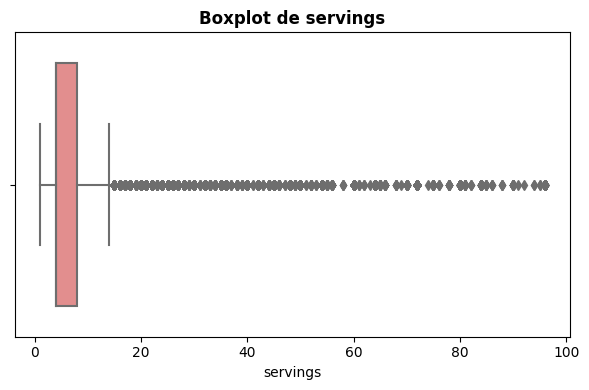



Min servings:  1
Max servings:  96
Promedio servings:  6.76

1º Quartile:  4.0
2º Quartile (Mediana):  4.0
3º Quartile:  8.0
4º Quartile:  96.0

Valores de "servings" menores a -2.0 podrían ser outliers (valores bajos).
Valores de "servings" mayores a 14.0 podrían ser outliers (valores altos).


In [85]:
variable = "servings"

graficar_variable(df_recipes, variable)
print(f"\n")
describir_variable(df_recipes, variable)

Veamos los outliers segun el IQR:

In [86]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g
366422,Elderberry Cordial,An old-fashioned recipe from the Wisconsin Dut...,96,63694.0,105.0,65.0,"[elderberries, cold water, sugar, whole allspi...","[8 quarts elderberries, 2 quarts cold water, 4...","[1. Stem and wash berries., 2. cover with wate...","[low-fat, healthy, low-sodium, weeknight, time...",148.38,0.29,0.00,3.71,26.57,3.24,18.00,0.29
8559,Chocolate Caramel Candy Recipe,This treat from Taste of Home tastes like a Sn...,96,489276.0,21.0,135.0,"[butter, milk chocolate chips, butterscotch ch...","[, 2 teaspoons butter, 1 cup milk chocolate ch...",[1. Line a 13-in. x 9-in. pan with foil; butte...,"[snack, dessert, lunch, time-to-make, course, ...",473.81,25.24,9.05,288.10,57.14,2.38,43.81,9.05
478949,Fantasy Fudge,I copied this recipe off the back of a jar of ...,96,15304.0,15.0,30.0,"[sugar, butter, evaporated milk, chocolate chi...","[3 cups sugar, 3/4 cup butter or 3/4 cup marga...","[1. Mix butter, sugar and milk in a saucepan.,...","[dessert, low-sodium, 30-minutes-or-less, time...",382.67,15.33,9.33,110.00,64.00,0.67,56.67,1.33
28986,Gingerbread Cookies (Large Batch),I got this recipe from a neighbour of mine. I...,96,397494.0,19.0,1450.0,"[all-purpose flour, ground ginger, ground cinn...","[6 1/2 cups all or purpose flour, 1 teaspoon g...","[1. Combine the flour, spices and salt., 2. in...","[dessert, bread, cookie, time-to-make, course,...",387.89,11.58,3.16,408.95,66.84,1.05,27.37,4.74
44976,Homemade Tomato Ketchup,U usually double or triple this and make a few...,96,37028.0,22.0,90.0,"[tomatoes, onion, garlic, cider vinegar, dark ...","[4 lbs slightly overripe tomatoes, cored,seede...",[1. Combine all ingredients in a large saucepa...,"[low-fat, low-carb, healthy, low-calorie, week...",29.55,0.45,0.00,226.36,6.36,1.36,4.55,0.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178440,Peanut Butter Ice Cream Sandwiches,Perfect ice cream cookie sandwiches. Dip half...,15,322591.0,44.0,71.0,"[sugar, brown sugar, peanut butter, shortening...","[1/2 cup sugar, 1/2 cup brown sugar, 1/2 cup p...","[1. Heat oven to 375., 2. Mix all ingredients ...","[dessert, sandwich, time-to-make, course, prep...",464.09,25.45,8.64,415.45,53.41,1.82,33.18,8.41
64908,Carne Seca,One of our friends is famous for her Carne Sec...,15,144589.0,167.0,730.0,"[chuck roast, water, onions, garlic cloves, gr...","[6 or 7 lbs chuck roast, water, to cover , 2 ...",[1. Place meat in a roasting pan and cover wit...,"[low-carb, lunch, mexican, appetizer, time-to-...",205.51,7.78,3.23,369.52,9.70,0.96,1.26,24.61
441568,Deep Chocolate Cake,I don't remember where I found this recipe. I...,15,295707.0,137.0,75.0,"[hershey bars, buttermilk, baking soda, hershe...","[8 (1 1/2 ounce) Hershey Bars, plain , 1 cup b...","[1. Melt candy and syrup, until smooth, add va...","[dessert, low-sodium, cake, time-to-make, cour...",478.61,19.42,8.98,165.62,71.09,2.63,50.88,5.99
178495,Tortellini Soup,Very good soup.,15,11790.0,167.0,55.0,"[hot italian sausage, onion, garlic, tortellin...","[1 lb hot Italian sausage, 1 medium onion, 2 c...","[1. Brown sausage., 2. Pour chicken broth into...","[dinner, soup, 60-minutes-or-less, time-to-mak...",183.95,8.50,3.41,436.35,18.44,1.20,0.84,8.50


Algunos de estos valores no los considero erróneos, ya que es posible que una receta pueda tener porciones de 15 o 20 galletas, por ejemplo. Sin embargo, dado que existen demasiados datos y el modelo podría volverse muy lento si incluyo todos, he decidido quedarme únicamente con las recetas que tienen porciones menores a 14, para optimizar el rendimiento sin perder representatividad.

In [87]:
indices_a_eliminar = outliers.index.tolist()
df_recipes = df_recipes.drop(indices_a_eliminar)

Ahora si veamos la distribucion de la variable.

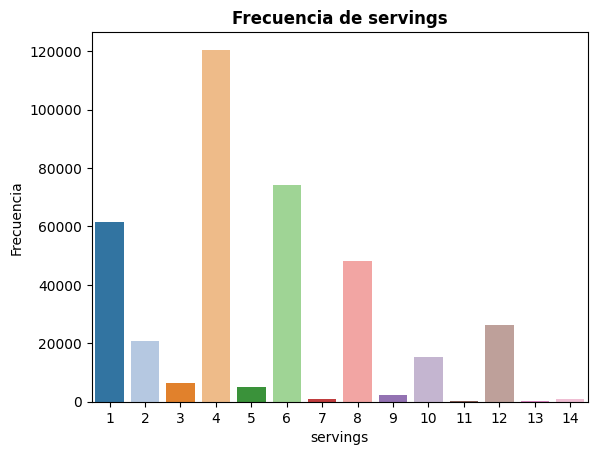

In [88]:
variable = "servings"

sns.countplot(data=df_recipes, x=variable, palette='tab20')
plt.title(f'Frecuencia de {variable}', fontweight="bold")
plt.xlabel(f'{variable}')
plt.ylabel('Frecuencia')
plt.show()

In [89]:
df_recipes.groupby('servings').size().sort_values(ascending = False)

servings
4     120501
6      74171
1      61616
8      48087
12     26164
2      20667
10     15329
3       6364
5       5126
9       2414
14      1060
7        841
11       122
13        78
dtype: int64

La mayoria de recetas tienen 4 y 6 porciones. Hay muy pocas recetas con 13, 11 y 7 porciones.

###   ***Variable: recipe_grams***

In [90]:
variable = "recipe_grams"

describir_variable(df_recipes, variable)

Min recipe_grams:  1.0
Max recipe_grams:  1595816.0
Promedio recipe_grams:  410.05

1º Quartile:  147.0
2º Quartile (Mediana):  244.0
3º Quartile:  409.0
4º Quartile:  1595816.0

Valores de "recipe_grams" menores a -246.0 podrían ser outliers (valores bajos).
Valores de "recipe_grams" mayores a 802.0 podrían ser outliers (valores altos).


Con esta variable sucede lo mismo que con la anterior, vamos a eliminar todos aquellos valores con `recipe_grams` mayores a 1.500, es decir, un kilo y medio.

In [91]:
df_recipes = df_recipes[df_recipes.recipe_grams < 1500]

Variable: recipe_grams


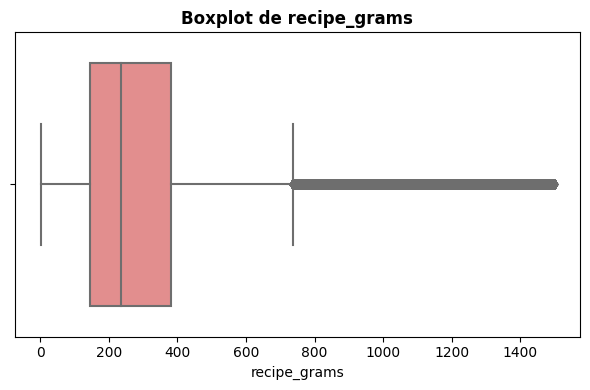



Min recipe_grams:  1.0
Max recipe_grams:  1499.0
Promedio recipe_grams:  314.7

1º Quartile:  144.0
2º Quartile (Mediana):  236.0
3º Quartile:  381.0
4º Quartile:  1499.0

Valores de "recipe_grams" menores a -211.5 podrían ser outliers (valores bajos).
Valores de "recipe_grams" mayores a 736.5 podrían ser outliers (valores altos).


In [92]:
variable = "recipe_grams"

graficar_variable(df_recipes, variable, False)
print(f"\n")
describir_variable(df_recipes, variable)

Veamos los outliers segun el IQR:

In [93]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g
49621,Seafood Saute with Linguinne,A great seafood dish for that special dinner f...,2,63927.0,1499.0,40.0,"[lobsters, dry linguine, butter, onions, garli...","[1 lb crabmeat or 1 lb shrimp, shelled and dev...",[1. Steam lobsters in one inch of water for 8 ...,"[dinner, seafood, 60-minutes-or-less, time-to-...",117.85,1.95,0.86,227.16,12.29,1.75,1.27,12.35
407676,Carolina Vinegar and Pepper Mop BBQ Sauce,Sometimes we pass up the mustard based sauce f...,1,382172.0,1499.0,35.0,"[apple cider vinegar, red pepper flakes, groun...","[3 cups apple cider vinegar, 1/4 cup red peppe...","[1. In a saucepan, stir together the vinegar, ...","[barbecue, southern, low-calorie, 60-minutes-o...",28.49,1.17,0.22,969.00,5.12,1.93,1.64,0.88
423324,Christmas Surprise Cookies,These are a hit for Christmas parties and get ...,1,77696.0,1499.0,27.0,"[butter, creamy peanut butter, brown sugar, su...","[1 cup butter, softened , 1 cup creamy peanut ...","[1. Combine butter, peanut butter, and sugars ...","[dinner, dessert, cookie, 30-minutes-or-less, ...",18.07,0.91,0.41,14.31,2.22,0.07,1.21,0.35
157173,Spiced Tea Cakes,A wonderful little cookie that goes well with ...,1,66317.0,1499.0,20.0,"[butter, sugar, eggs, buttermilk, baking soda,...","[1 cup butter, 2 cups sugar, 3 eggs, lightly b...","[1. Preheat oven to 400 degrees F., 2. Mix but...","[dessert, cake, 30-minutes-or-less, time-to-ma...",3.53,0.13,0.07,1.78,0.55,0.01,0.25,0.05
65313,Old-Fashioned Oatmeal Cookies (Great Grandma I...,Great Grandma's Oatmeal Raisin Cookie recipe.,1,510250.0,1499.0,55.0,"[seedless raisin, water, shortening, eggs, sug...","[1 cup seedless raisin, 1 cup water, 3/4 cup s...",[1. Simmer the raisins and water in saucepan o...,"[dessert, cookie, 60-minutes-or-less, time-to-...",58.65,2.37,0.54,49.02,8.72,0.42,4.36,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44472,Wet Burritos,"Having grown up with these, I didn't realize t...",4,33665.0,737.0,35.0,"[lean ground beef, garlic, onion, worcestershi...","[1 lb lean ground beef, 2 cloves garlic, press...","[1. Brown ground beef, onion, and garlic, maki...","[dinner, mexican, 60-minutes-or-less, time-to-...",139.54,5.96,2.81,417.92,13.35,1.87,1.67,8.17
396994,Korean Sweet Sauce Seasoning,This Korean recipe is for marinating meat and ...,1,488693.0,737.0,10.0,"[soy sauce, dark corn syrup, sugar, water, gin...","[1 cup soy sauce, 1/2 cup dark corn syrup, 1/3...",[1. Combine ingredients in a saucepan and simm...,"[dessert, dinner, vegetarian, korean, vegan, w...",53.36,0.01,0.00,887.33,11.63,0.15,6.26,1.67
197797,Rosenmunnar (Swedish Thumbprint Cookies),"A traditional cookie,but so yummy!",1,504210.0,737.0,25.0,"[butter, white sugar, all-purpose flour, fruit...","[1 cup butter, softened , 1/2 cup white sugar,...",[1. Preheat oven to 375 degrees F (190 degrees...,"[dessert, cookie, 30-minutes-or-less, time-to-...",76.20,4.22,2.65,37.95,9.06,0.19,4.03,0.64
459355,Jewish Corned Beef Roast,My mom heard this recipe on a PBS cooking show...,4,112986.0,737.0,205.0,"[garlic, olive oil, corned beef, celery, carro...","[1 tablespoon minced garlic, 1 tablespoon oliv...","[1. Heat oven to 300 degrees., 2. Saute garlic...","[roast, low-carb, dinner, time-to-make, course...",144.27,9.31,3.01,534.84,6.04,0.68,4.19,9.02


Dado que, generalmente, las preparaciones de recetas no superan los 800 gramos, decidimos eliminar los registros que presenten valores atípicos en esta variable. Esto nos permitirá trabajar con datos más consistentes y representativos, asegurando que las recetas seleccionadas estén dentro de un rango esperado de tamaños, lo que mejora la calidad de las recomendaciones sin la influencia de valores extremos que podrían sesgar los resultados.

In [94]:
indices_a_eliminar = outliers.index.tolist()
df_recipes = df_recipes.drop(indices_a_eliminar)

Veamos ahora la distribucion:

/tmp/ipykernel_1/3950498448.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{variable}'], shade=True, color='blue')


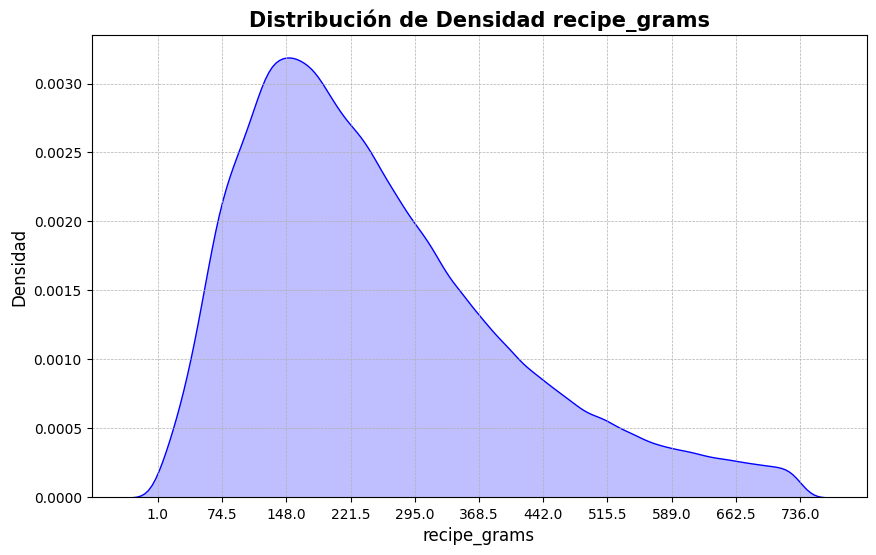

In [95]:
plot_density_distribution(df_recipes, variable)

In [96]:
len(df_recipes)

338844

###   ***Variable: recipe_minutes***

In [97]:
variable = "recipe_minutes"

describir_variable(df_recipes, variable)

Min recipe_minutes:  1.0
Max recipe_minutes:  1051200.0
Promedio recipe_minutes:  109.62

1º Quartile:  30.0
2º Quartile (Mediana):  45.0
3º Quartile:  72.0
4º Quartile:  1051200.0

Valores de "recipe_minutes" menores a -33.0 podrían ser outliers (valores bajos).
Valores de "recipe_minutes" mayores a 135.0 podrían ser outliers (valores altos).


Filtremos algunos outliers para poder visualizar el boxplot.

In [98]:
df_recipes = df_recipes[df_recipes.recipe_minutes < 180]

Variable: recipe_minutes


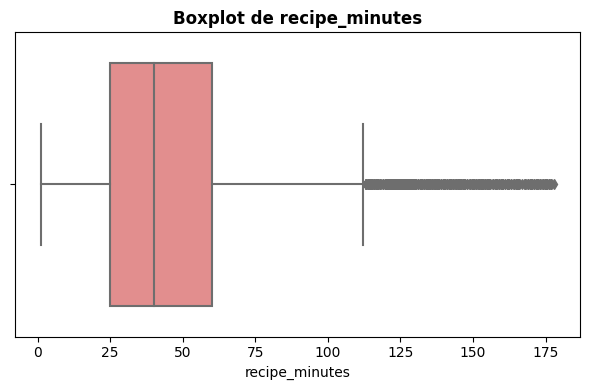



Min recipe_minutes:  1.0
Max recipe_minutes:  178.0
Promedio recipe_minutes:  48.38

1º Quartile:  25.0
2º Quartile (Mediana):  40.0
3º Quartile:  60.0
4º Quartile:  178.0

Valores de "recipe_minutes" menores a -27.5 podrían ser outliers (valores bajos).
Valores de "recipe_minutes" mayores a 112.5 podrían ser outliers (valores altos).


In [99]:
variable = "recipe_minutes"

graficar_variable(df_recipes, variable, False)
print(f"\n")
describir_variable(df_recipes, variable)

Veamos los outliers segun el IQR:

In [100]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g
181897,Indian Spiced Grilled Chicken (South Beach Die...,"From ""The South Beach Diet Parties & Holidays ...",10,314244.0,200.0,178.0,"[nonfat plain yogurt, fresh lemon juice, garam...",[3/4 cup nonfat plain yogurt or 3/4 cup low or...,"[1. Whisk together yogurt, lemon juice, garam ...","[healthy, dinner, diet, low-carb, low-sodium, ...",109.15,2.95,0.60,135.00,0.95,0.10,0.75,18.60
66939,Teddy Bear Rolls,These are the cutest rolls you'll ever eat! I ...,10,154650.0,130.0,177.0,"[dry yeast, warm water, milk, sugar, vegetable...","[2 (1/4 ounce) dry yeast, 1 cup warm water, 1 ...","[1. In a mixing bowl,dissolve yeast in water.,...","[healthy, time-to-make, course, preparation, o...",241.77,3.69,0.92,195.54,44.23,1.69,2.62,7.00
164256,Curried Flank Steak,This recipe comes from the famous Hon's Wun-Tu...,6,144388.0,438.0,177.0,"[flank steaks, fresh ginger, garlic cloves, ch...","[4 1/2 lbs flank steaks, 1 teaspoon fresh ging...","[1. In a large cooking pot, add flank steak, c...","[dinner, curries, time-to-make, course, main-i...",143.86,6.60,2.69,594.95,3.40,0.30,0.78,16.83
431374,Buffalo Wings,These are awesome wings-no one can believe the...,4,324138.0,306.0,177.0,"[flour, paprika, cayenne pepper, salt, chicken...","[, 1 cup flour, 1/2 teaspoon paprika, 1/2 teas...","[1. In a small bowl, mix together flour, papri...","[low-carb, appetizer, time-to-make, course, ma...",249.64,16.70,5.98,308.69,8.07,0.36,0.10,15.85
53825,Chipotle-Glazed Shrimp Kebabs,I found this delicious recipe in the Chicago T...,2,87660.0,461.0,176.0,"[olive oil, onion, garlic cloves, cumin seeds,...","[2 tablespoons olive oil, 1 medium onion, chop...","[1. For marinade, heat oil in medium skillet o...","[dinner, shrimp, lunch, time-to-make, course, ...",102.89,3.93,0.59,202.58,6.03,0.30,4.01,10.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436177,Eggplant (Aubergine) and Mushroom Pizza,Prep time is soaking and roasting time for egg...,8,63613.0,145.0,113.0,"[eggplants, salt, pizza dough, tomato sauce, p...","[2 eggplants, cut 1/8 inch slices , 2 teaspoon...",[1. Sprinkle eggplant with salt and let sit in...,"[dinner, pizza, italian, vegetarian, weeknight...",39.86,1.24,0.62,480.69,5.86,3.10,2.41,2.62
439014,"Turkey, Okra, and Rice Soup",In 'The Berghoff Cafe Cookbook',8,428638.0,362.0,113.0,"[vegetable oil, onion, celery, carrot, leek, b...","[2 tablespoons vegetable oil, 1 cup finely cho...",[1. Heat the oil in an 8- to 10-quart stockpot...,"[soup, rice, time-to-make, course, main-ingred...",69.61,2.13,0.50,244.34,6.13,0.52,1.19,6.16
12899,Pitas,Pitas,8,367679.0,88.0,113.0,"[unbleached all-purpose flour, salt, sugar, ye...","[3 cups unbleached all or purpose flour, 1 tea...","[1. Mix together., 2. Knead 10 minute., 3. put...","[low-fat, healthy, time-to-make, course, prepa...",217.61,2.50,0.34,332.84,41.93,1.70,1.02,5.91
62478,Mulligatawny Soup,My favorite version of the famous Indian soup ...,6,133310.0,490.0,113.0,"[vegetable oil, butter, carrot, onion, celery,...","[1 tablespoon vegetable oil, 1/2 tablespoon bu...","[1. In a big soup pot over medium heat, heat t...","[healthy, dinner, soup, low-carb, low-fat, low...",66.31,2.10,0.53,208.20,7.35,1.10,1.80,4.51


Eliminemos los outliers, ya que resulta logico que recetas mayores a dos horas sean outliers.

In [101]:
indices_a_eliminar = outliers.index.tolist()
df_recipes = df_recipes.drop(indices_a_eliminar)

Veamos ahora la distribucion:

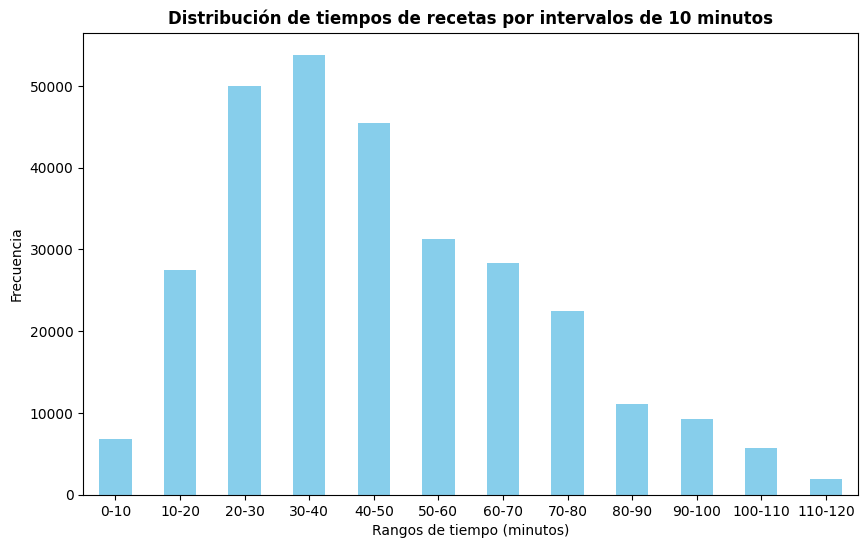

In [102]:
# Crear los intervalos de 10 en 10 hasta 120
bins = list(range(0, 130, 10))  # Rango de 0 a 120 con pasos de 10
labels = [f'{i}-{i+10}' for i in range(0, 120, 10)]  # Etiquetas para cada intervalo

# Agrupar los datos en los intervalos
df_recipes['time_group'] = pd.cut(df_recipes['recipe_minutes'], bins=bins, labels=labels, right=False)

# Contar la frecuencia de cada grupo
grouped_data = df_recipes['time_group'].value_counts().sort_index()

# Graficar los datos
plt.figure(figsize=(10, 6))
grouped_data.plot(kind='bar', color='skyblue')
plt.xticks(rotation=0)
plt.title('Distribución de tiempos de recetas por intervalos de 10 minutos', fontweight="bold")
plt.xlabel('Rangos de tiempo (minutos)')
plt.ylabel('Frecuencia')
plt.show()

Hay una gran cantidad de recetas que tienen tiempos de duración entre 20 y 50 minutos. Hay pocas que requieren mas de una hora y 20 minutos (80 minutos)

###   ***Variable: calories_100g***

In [103]:
variable = "calories_100g"

describir_variable(df_recipes, variable)

Min calories_100g:  0.0
Max calories_100g:  103640.0
Promedio calories_100g:  202.07

1º Quartile:  106.96
2º Quartile (Mediana):  168.09
3º Quartile:  256.72
4º Quartile:  103640.0

Valores de "calories_100g" menores a -117.68 podrían ser outliers (valores bajos).
Valores de "calories_100g" mayores a 481.36 podrían ser outliers (valores altos).


Variable: calories_100g


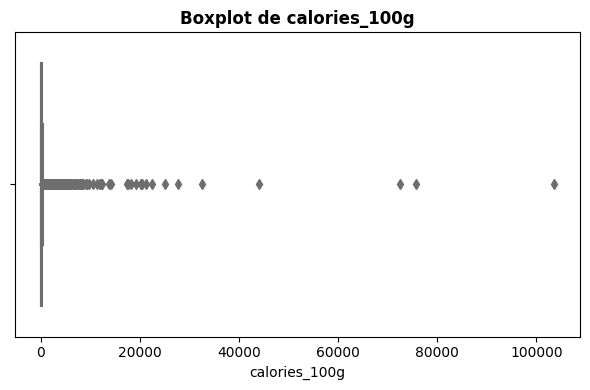



Min calories_100g:  0.0
Max calories_100g:  103640.0
Promedio calories_100g:  202.07

1º Quartile:  106.96
2º Quartile (Mediana):  168.09
3º Quartile:  256.72
4º Quartile:  103640.0

Valores de "calories_100g" menores a -117.68 podrían ser outliers (valores bajos).
Valores de "calories_100g" mayores a 481.36 podrían ser outliers (valores altos).


In [104]:
variable = "calories_100g"

graficar_variable(df_recipes, variable, False)
print(f"\n")
describir_variable(df_recipes, variable)

Veamos los outliers segun el IQR:

In [105]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group
78814,Grilled Steaks (Indoors),Cold outside? No problem grill indoors with yo...,4,215382.0,1.0,20.0,"[beef steaks, dried thyme, dried rosemary, dri...","[4 lbs beef steaks, 2 well or trimmed (removed...","[1. Heat grill pan to very very hot., 2. Rub s...","[dinner, 30-minutes-or-less, time-to-make, cou...",103640.00,7410.00,2940.00,53130.00,40.00,10.00,20.00,8630.00,20-30
407146,Seasoned Rib Roast,Can also be used with a rib eye roast,6,285109.0,1.0,80.0,"[lemon-pepper seasoning, paprika, garlic salt,...","[1 1/2 teaspoons lemon or pepper seasoning, 1 ...","[1. In a small bowl, combine the seasonings; r...","[roast, low-sodium, low-carb, dinner, time-to-...",75730.00,6670.00,2750.00,12050.00,40.00,30.00,10.00,3650.00,80-90
94143,Chef Flower's How Do I Make Grill Marks on a S...,I have been often asked how I cook steaks to g...,2,293859.0,1.0,17.0,"[filet of beef, olive oil, salt, black pepper]",[2 (250 g) porterhouse steaks or 2 (250 g) sir...,[1. Remove beef from the fridge for about 10 m...,"[dinner, low-carb, low-sodium, 30-minutes-or-l...",72500.00,5920.00,2350.00,15500.00,0.00,0.00,0.00,4470.00,10-20
445429,Spiral Rolled Beef Fillet With Fresh Pesto,"We had this for a family celebration, and it w...",6,164751.0,1.0,30.0,"[filet of beef, salt %26 freshly ground black ...","[2 lbs center cut filet of beef, spiral cut , ...",[1. With the heel of your hand or a meat malle...,"[dinner, beef, course, main-ingredient, occasi...",43990.00,3590.00,1430.00,9400.00,0.00,0.00,0.00,2710.00,30-40
84288,Asparagus With Gorgonzola Cheese Wrapped in P...,Here is another signature recipe of the Incred...,1,243165.0,1.0,36.0,"[puff pastry sheet, baby asparagus, gorgonzola...","[1 small puff pastry sheet, 1 3x4 or inch piec...",[1. Take 3 sheets and butter the first then la...,"[dinner, appetizer, 60-minutes-or-less, time-t...",32470.00,2240.00,600.00,18050.00,2610.00,110.00,70.00,500.00,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196936,Butter Pecan Cake,This is from my MIL.,10,40391.0,132.0,85.0,"[butter, pecans, butter, sugar, eggs, all-purp...","[3 tablespoons butter, melted , 1 1/3 cups cho...","[1. Pour melted butter into a baking pan., 2. ...","[dessert, dinner, cake, snack, southern, lunch...",481.44,24.02,10.53,207.95,64.32,1.59,47.50,4.62,80-90
64669,Baked Raw Apple Donut Muffins,These are really yummy muffins. My friend Jenn...,10,227790.0,63.0,45.0,"[all-purpose flour, baking powder, salt, groun...","[1 1/2 cups sifted all or purpose flour, 1 3/4...",[1. Prehat oven to 350 F and have ready grease...,"[bread, baked, breakfast, 60-minutes-or-less, ...",481.43,26.98,12.54,304.44,57.14,1.27,32.86,4.60,40-50
398551,Hamburger Bun Toasts,This recipe is from Cooking with Paula Deen ma...,6,411646.0,49.0,7.0,"[butter, mustard, worcestershire sauce, hambur...","[3 tablespoons butter, melted , 1 tablespoon m...","[1. Preheat broiler., 2. Line a baking sheet w...","[side, bread, celebrity, weeknight, 15-minutes...",481.43,29.80,17.96,566.33,32.45,1.43,4.69,20.82,0-10
10070,Rustic Strawberry Coconut Cake,If you are looking for a bit different recipe ...,5,522988.0,164.0,30.0,"[pastry dough, strawberry jam, coconut, egg yo...","[250 g sweet pastry dough, 4 teaspoons strawbe...",[1. Mix all the pastry ingredients together an...,"[dessert, cake, 30-minutes-or-less, time-to-ma...",481.40,30.06,16.28,283.41,48.66,2.93,15.91,5.37,30-40


Dado que existen valores extremadamente bajos y altos, como 0.0 y 103640.0, que están fuera del rango esperado para el contenido calórico de 100 gramos de una receta, eliminaremos aquellos registros que tengan valores de `calories_100g` menores a -117.68 o mayores a 481.36. Esto garantizará que nuestros datos no estén sesgados por estos outliers y que la recomendación de recetas sea más precisa y representativa.

In [106]:
indices_a_eliminar = outliers.index.tolist()
df_recipes = df_recipes.drop(indices_a_eliminar)

Veamos ahora la distribucion:

/tmp/ipykernel_1/3950498448.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{variable}'], shade=True, color='blue')


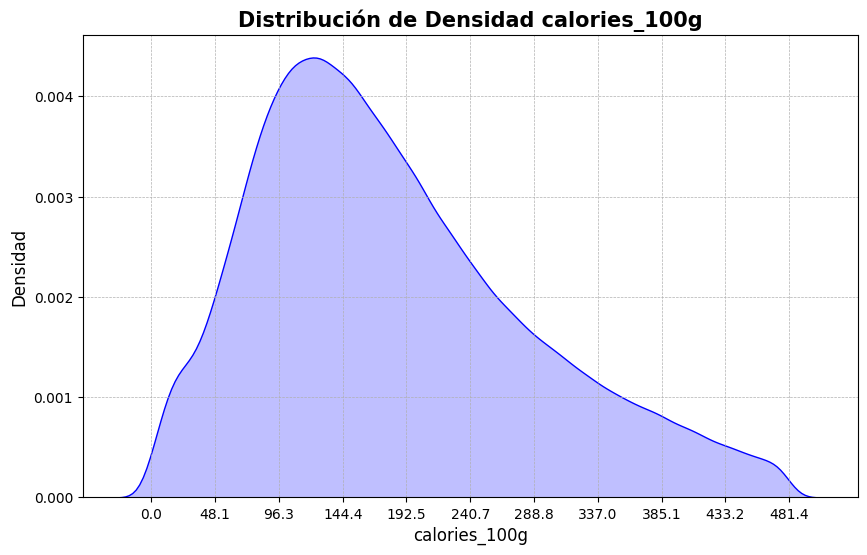



Min calories_100g:  0.0
Max calories_100g:  481.36
Promedio calories_100g:  182.09

1º Quartile:  104.84
2º Quartile (Mediana):  163.36
3º Quartile:  244.0575
4º Quartile:  481.36

Valores de "calories_100g" menores a -103.99 podrían ser outliers (valores bajos).
Valores de "calories_100g" mayores a 452.88 podrían ser outliers (valores altos).


In [107]:
plot_density_distribution(df_recipes, variable)
print(f"\n")
describir_variable(df_recipes, variable)

###   ***Variable: fat_100g***

In [108]:
variable = "fat_100g"

describir_variable(df_recipes, variable)

Min fat_100g:  0.0
Max fat_100g:  53.96
Promedio fat_100g:  9.16

1º Quartile:  3.42
2º Quartile (Mediana):  7.37
3º Quartile:  12.96
4º Quartile:  53.96

Valores de "fat_100g" menores a -10.89 podrían ser outliers (valores bajos).
Valores de "fat_100g" mayores a 27.27 podrían ser outliers (valores altos).


Variable: fat_100g


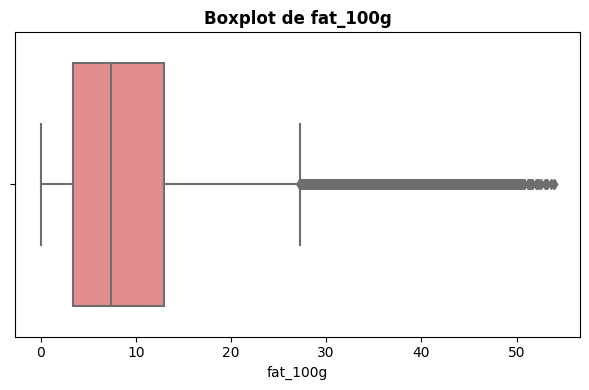

In [109]:
variable = "fat_100g"

graficar_variable(df_recipes, variable, False)

Veamos los outliers segun el IQR:

In [110]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group
466871,Ghee (Usli Ghee),Ghee is used in preparing many Indian dishes. ...,1,482648.0,455.0,35.0,"[unsalted butter, cheesecloth]","[1 lb unsalted butter, cheesecloth]","[1. In a heavy saucepan, melt the butter over ...","[low-carb, low-sodium, indian, 60-minutes-or-l...",476.95,53.96,34.18,7.32,0.04,0.00,0.04,0.57,30-40
278800,How to Prepare Ghee,Ghee is a healthy alternative to butter and oi...,1,55434.0,455.0,45.0,"[unsalted butter, cheesecloth]","[1 lb unsalted butter, cheesecloth]","[1. Heat unsalted butter in a stainless steel,...","[vegetarian, low-sodium, low-carb, indian, 60-...",476.95,53.96,34.18,7.32,0.04,0.00,0.04,0.57,40-50
61987,Soymilk Sweet Cr&egrave;me,"I use plain homemade soymilk with this recipe,...",1,130828.0,517.0,2.0,"[soymilk, sucanat, salt, corn oil, liquid leci...","[1 cup soymilk, 1 tablespoon sucanat or 1 tabl...","[1. Pour the milk into a blender container., 2...","[lactose-free, vegetarian, low-carb, low-sodiu...",440.74,53.62,7.79,26.09,2.38,0.62,0.29,2.13,0-10
7362,Crystal Beurre Blanc,This wonderful sauce was created by Gus Martin...,8,319359.0,92.0,23.0,"[crystal hot sauce, heavy cream, butter]","[1 cup Crystal hot sauce, 1/4 cup heavy cream,...",[1. Cook the hot sauce in a saucepan over medi...,"[low-carb, southern, 30-minutes-or-less, time-...",473.59,53.15,33.59,1168.48,0.76,0.11,0.43,0.87,20-30
77259,Michelle's French Mayonnaise in a Flash!,My French friend came over for lunch recently ...,1,207690.0,569.0,4.0,"[sunflower oil, egg yolks, dijon mustard, lemo...","[500 ml sunflower oil or 500 ml olive oil, 4 e...",[1. Take a tall measuring jug or a tall glass ...,"[dinner, low-carb, vegetarian, french, 15-minu...",477.08,53.08,7.33,295.91,0.74,0.07,0.19,1.23,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180464,Hashbrown Casserole,"Very good, and very easy!",8,440371.0,151.0,55.0,"[frozen hash browns, cream of chicken soup, so...","[32 ounces frozen hash browns, 1 (8 ounce) can...","[1. Mix all together., 2. Pour in 9x13 oven sa...","[side, casserole, dinner, 60-minutes-or-less, ...",363.91,27.28,14.64,356.23,24.11,1.66,2.45,8.08,50-60
260538,Methi(Dried Fenugreek Leaves) And Curd (Yoghur...,"From this week's Weekend magazine, Foodcourt c...",1,60267.0,206.0,50.0,"[ghee, onion, salt, red chili powder, coriande...","[3 tablespoons ghee, 1 large onion, thinly sli...","[1. Heat ghee in a frying pan., 2. Fry sliced ...","[dinner, vegetarian, indian, curries, 60-minut...",317.52,27.28,18.11,60.68,16.60,3.59,8.01,5.05,50-60
266463,Simple Maple Cheesecake,This recipe was printed in one of those Sunday...,8,339999.0,147.0,85.0,"[graham cracker crumbs, butter, granulated sug...","[2 cups honey graham cracker crumbs, 4 tablesp...","[1. Preheat oven to 350., 2. Combine the graha...","[dessert, time-to-make, course, preparation, d...",410.34,27.28,15.92,311.77,35.31,0.41,25.24,7.55,80-90
60181,Fried Burritos,My MIL made these for my DH when he was younge...,4,120554.0,272.0,30.0,"[flour tortillas, refried beans, american chee...","[8 flour tortillas, 1 (8 ounce) can traditiona...",[1. Warm the tortillas for 15 seconds in the m...,"[dinner, lunch, mexican, 30-minutes-or-less, t...",360.33,27.28,8.90,608.49,18.05,1.80,0.48,11.25,30-40


Utilizando el rango intercuartílico (IQR), hemos identificado que los valores de `fat_100g` menores a -10.89 podrían considerarse outliers bajos y los valores mayores a 27.27 podrían considerarse outliers altos. Dado que estos extremos no son representativos de las preparaciones comunes, eliminaremos los registros que caen fuera de estos límites para evitar que influyan en el análisis

In [111]:
indices_a_eliminar = outliers.index.tolist()
df_recipes = df_recipes.drop(indices_a_eliminar)

Veamos ahora la distribucion:

/tmp/ipykernel_1/3950498448.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{variable}'], shade=True, color='blue')


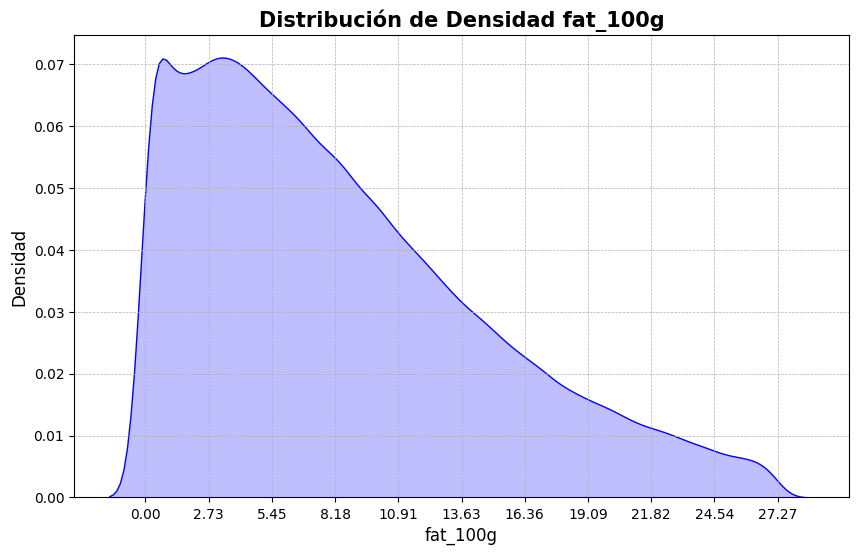



Min fat_100g:  0.0
Max fat_100g:  27.27
Promedio fat_100g:  8.42

1º Quartile:  3.31
2º Quartile (Mediana):  7.1
3º Quartile:  12.3
4º Quartile:  27.27

Valores de "fat_100g" menores a -10.17 podrían ser outliers (valores bajos).
Valores de "fat_100g" mayores a 25.78 podrían ser outliers (valores altos).


In [112]:
plot_density_distribution(df_recipes, variable)
print(f"\n")
describir_variable(df_recipes, variable)

El valor máximo observado es 27.27, mientras que el primer cuartil es 3.31 y el tercer cuartil es 12.3, lo que sugiere que la mayoría de las recetas tienen un contenido de grasa dentro de un rango moderado.

###   ***Variable: saturated_fat_100g***

In [113]:
variable = "saturated_fat_100g"

describir_variable(df_recipes, variable)

Min saturated_fat_100g:  0.0
Max saturated_fat_100g:  23.81
Promedio saturated_fat_100g:  3.33

1º Quartile:  0.84
2º Quartile (Mediana):  2.35
3º Quartile:  4.86
4º Quartile:  23.81

Valores de "saturated_fat_100g" menores a -5.19 podrían ser outliers (valores bajos).
Valores de "saturated_fat_100g" mayores a 10.89 podrían ser outliers (valores altos).


Variable: saturated_fat_100g


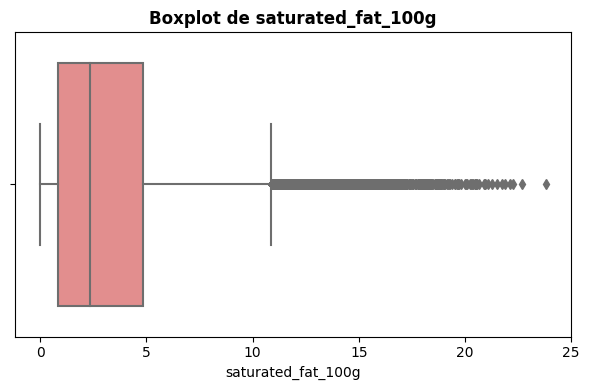

In [114]:
variable = "saturated_fat_100g"

graficar_variable(df_recipes, variable, False)

Veamos los outliers segun el IQR:

In [115]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group
484909,Easy Coconut Macaroons,This recipe is so easy and so delicious. The ...,1,405298.0,273.0,30.0,"[coconut, sugar, flour, salt, egg whites, almo...",[1 1/3 cups coconut (Bakers angel flake works ...,"[1. Combine sugar, flour, salt and coconut in ...","[dessert, weeknight, 30-minutes-or-less, time-...",415.02,26.96,23.81,56.01,41.06,7.00,27.69,6.37,30-40
112120,Happiness in Chocolate Form- Easy!,"SOOO easy! this will impress everybody, and th...",5,118401.0,15.0,25.0,"[tart crusts, chocolate pudding, m%26m%27s, co...",[4 or 5 tart crusts (homemade or store bought...,"[1. pre-heat oven to 475 deg., 2. cut five pie...","[dessert, 30-minutes-or-less, time-to-make, co...",345.33,26.67,22.67,28.67,27.33,0.00,26.67,1.33,20-30
129313,Black and White Cookies,This is a gluten-free version created by Erin ...,12,459978.0,62.0,70.0,"[rice flour, bob%27s red mill gluten-free all-...","[, 1 1/4 cups rice flour (white or brown), 1/2...",[1. Preheat oven to 325 degrees F; line 2 rimm...,"[vegetarian, dessert, lactose-free, gluten-fre...",401.45,25.97,22.26,600.16,40.00,1.13,10.97,1.61,70-80
89138,Candy Bar Ice Cream Cake,"The quickest way to make a frozen, kid pleasin...",10,268161.0,28.0,35.0,"[ice cream sandwiches, cool whip, candy bars]","[8 or 10 ice cream sandwiches, 10 ounces Cool...",[1. Line glass dish (9x13 inch) with unwrapped...,"[dessert, cake, 60-minutes-or-less, time-to-ma...",322.14,25.71,22.14,25.36,23.21,0.00,23.21,1.07,30-40
474877,Healthy Brownie in a Mug,This is a healthy alternative to a regular bro...,1,533154.0,112.0,6.0,"[coconut oil, water, vanilla extract, salt, wh...","[2 tablespoons coconut oil, 2 tablespoons wate...","[1. In a microwave safe mug, add water/milk, c...","[dessert, healthy, 15-minutes-or-less, time-to...",371.34,26.25,21.88,142.05,36.34,6.07,11.79,5.45,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362783,Strawberry Preserve Cake,"Beautiful pale pink cake and icing, from Taste...",12,357977.0,200.0,40.0,"[cake flour, baking powder, salt, baking soda,...","[2 1/2 cups cake flour, 1 1/4 teaspoons baking...",[1. Preheat oven to 350°. Line the bottoms of ...,"[dessert, cake, 60-minutes-or-less, time-to-ma...",381.85,17.75,10.90,215.95,53.40,0.40,38.95,3.30,40-50
305639,Death by Triple-Chocolate Cookies,There is NO escaping the chocolate goodness in...,4,498935.0,100.0,31.0,"[unsalted butter, sugar, brown sugar, egg, van...","[1/4 cup unsalted butter, room temperature , 1...",[1. Preheat oven to 350F degrees. Line a cooki...,"[vegetarian, dessert, cookie, 60-minutes-or-le...",395.70,18.20,10.90,667.20,56.60,3.30,38.90,5.50,30-40
209265,Ramac and Cheese,"This ""ramen hack"" uses fresh ingredients to dr...",1,453127.0,332.0,30.0,"[extra-sharp cheddar cheese, cornstarch, evapo...","[1/4 lb extra or sharp cheddar cheese, grated ...",[1. Remove and reserve 2 tbsp (1 oz) grated ch...,"[dinner, 30-minutes-or-less, time-to-make, cou...",303.61,18.22,10.90,802.41,21.23,0.60,0.60,13.80,30-40
293190,Stuffed Cheeseburgers,Inspired by Rachael Ray's 30 Minute Meal Guy F...,6,331078.0,212.0,30.0,"[bacon, ground beef, worcestershire sauce, sal...","[6 slices bacon, chopped & cooked , 1 3/4 lbs ...","[1. Combine beef, Worcestershire sauce, salt, ...","[low-carb, 30-minutes-or-less, time-to-make, p...",294.25,23.07,10.90,323.30,1.27,0.14,0.52,19.58,30-40


Al igual que en las variables anteriores, eliminaremos los outliers de la variable `saturated_fat_100g` para asegurar que los datos sean representativos de las recetas típicas, evitando que valores extremos afecten el análisis y las recomendaciones.

In [116]:
indices_a_eliminar = outliers.index.tolist()
df_recipes = df_recipes.drop(indices_a_eliminar)

Veamos ahora la distribucion:

/tmp/ipykernel_1/3950498448.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{variable}'], shade=True, color='blue')


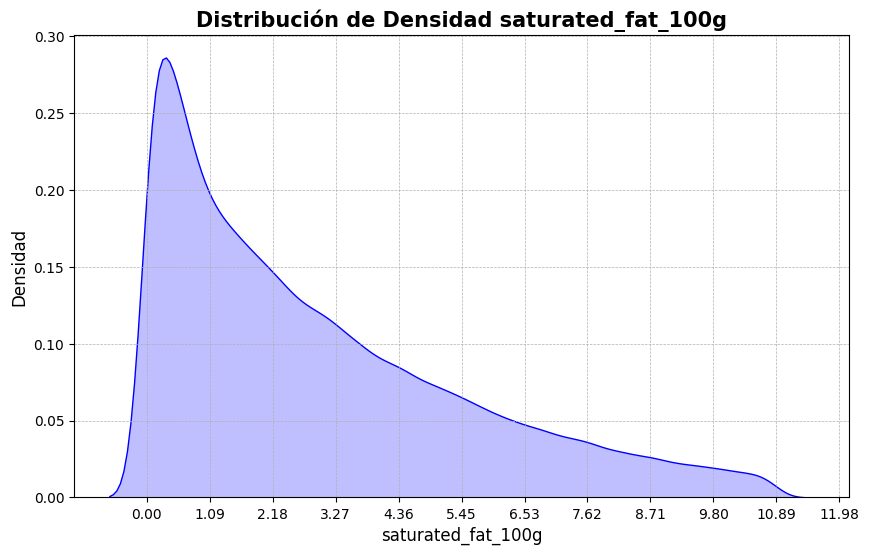



Min saturated_fat_100g:  0.0
Max saturated_fat_100g:  10.89
Promedio saturated_fat_100g:  2.96

1º Quartile:  0.8
2º Quartile (Mediana):  2.22
3º Quartile:  4.49
4º Quartile:  10.89

Valores de "saturated_fat_100g" menores a -4.74 podrían ser outliers (valores bajos).
Valores de "saturated_fat_100g" mayores a 10.02 podrían ser outliers (valores altos).


In [117]:
plot_density_distribution(df_recipes, variable)
print(f"\n")
describir_variable(df_recipes, variable)


Los resultados indican que la mayoría de las recetas tienen un contenido moderado de grasa saturada, con un promedio de 2.96 gramos por cada 100 gramos

###   ***Variable: carbohydrate_100g***

In [118]:
variable = "carbohydrate_100g"

describir_variable(df_recipes, variable)

Min carbohydrate_100g:  0.0
Max carbohydrate_100g:  124.31
Promedio carbohydrate_100g:  17.54

1º Quartile:  6.26
2º Quartile (Mediana):  12.96
3º Quartile:  23.95
4º Quartile:  124.31

Valores de "carbohydrate_100g" menores a -20.27 podrían ser outliers (valores bajos).
Valores de "carbohydrate_100g" mayores a 50.48 podrían ser outliers (valores altos).


Variable: carbohydrate_100g


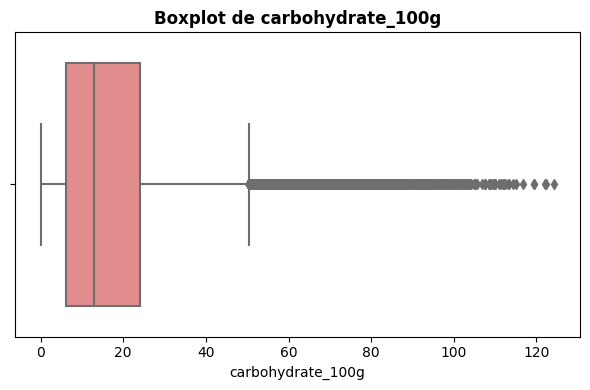

In [119]:
variable = "carbohydrate_100g"

graficar_variable(df_recipes, variable, False)

Veamos los outliers segun el IQR:

In [120]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group
418451,Diva's Divine Lamb Chops (Scd),I'm sharing my favorite lamb chop recipe ever ...,4,434584.0,144.0,25.0,"[lamb chop, dijon mustard, dried rosemary, sal...","[lamb chop, Dijon mustard (SCD legal), dried r...",[1. Preheat the broiler. Spread mustard on one...,"[lamb, dinner, low-sodium, low-fat, gluten-fre...",458.61,0.00,0.00,6.04,124.31,0.28,123.89,0.49,20-30
8694,Yummy Sweet Tea,I bet you can't have just one sip of this deli...,6,400519.0,55.0,7.0,"[sugar, lemon juice, family-size tea bags]","[2 cups sugar, 3 tablespoons lemon juice, 2 fa...","[1. Put sugar, lemon juice and tea bags in 2 ...","[dessert, 15-minutes-or-less, time-to-make, co...",472.55,0.00,0.00,0.18,122.36,0.00,121.45,0.00,0-10
318443,Strawberry Glaze,I have not tried this recipe. I got it from a ...,2,252682.0,46.0,18.0,"[berries, sugar, salt, cornstarch, water, lemo...","[1 cup sliced berries, 1/2 cup sugar, 1 dash s...","[1. Bring to boil for 3 minutes berries, sugar...","[dessert, 30-minutes-or-less, time-to-make, co...",474.57,0.00,0.00,171.09,121.96,0.22,108.91,0.00,10-20
186507,Easy Pineapple Icing,This Icing goes great on my Mod's Mountian Dew...,12,187414.0,18.0,10.0,"[sugar, crushed pineapple with juice, cornstarch]","[1 cup sugar, 1 (8 ounce) can crushed pineappl...","[1. In a saucepan, combine pineapple (with jui...","[dessert, healthy, vegetarian, low-sodium, low...",463.89,0.00,0.00,2.22,119.44,1.11,107.78,0.56,10-20
241823,Homemade Sweet and Sour Sauce,Simple sweet and sour sauce recipe.\r\n\r\nDoe...,1,327026.0,187.0,10.0,"[brown sugar, all-purpose flour, vinegar, wate...","[1/2 cup brown sugar, packed , 1 1/2 teaspoons...",[1. In a small saucepan mix the brown sugar an...,"[low-fat, 15-minutes-or-less, time-to-make, co...",474.76,0.05,0.00,643.58,119.41,0.21,114.60,1.50,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396438,Celebration Cake With Hot Buttered Whiskey Glaze,Here's another recipe from a recent novel that...,12,321211.0,163.0,75.0,"[flour, baking powder, salt, butter, brown sug...","[2 cups flour, 4 teaspoons baking powder, 1/2 ...","[1. Preheat the oven to 325 degrees., 2. Greas...","[dinner, dessert, cake, time-to-make, course, ...",407.30,19.57,9.69,241.84,50.49,1.41,38.77,3.62,70-80
299894,Banana and Pecan Fudge Loaf,Moreish tea time treat and what a treat it is!...,10,233564.0,81.0,80.0,"[bananas, eggs, butter, toffee yogurt, light m...","[2 ripe bananas, mashed (8 oz peeled weight), ...",[1. Heat the oven to 160C/fan (320ºF) 140C/gas...,"[dinner, vegetarian, time-to-make, course, mai...",448.02,26.05,10.86,490.74,50.49,2.84,27.04,5.93,80-90
338230,Muffins That Taste Like Old Fashion Plain Doug...,This is a great recipe that I enjoy making and...,12,509584.0,81.0,40.0,"[flour, baking powder, salt, nutmeg, cinnamon,...","[1 3/4 cups flour, 1 1/2 tablespoons baking po...","[1. Combine 1 3/4 cups of Flour, 1 1/2 tablesp...","[dessert, bread, 60-minutes-or-less, time-to-m...",375.93,18.52,7.65,627.78,50.49,1.23,30.99,3.70,40-50
421788,Cranberry Scones,I love cranberries and I love scones. Serve t...,10,116214.0,61.0,50.0,"[flour, sugar, cornmeal, baking powder, baking...","[1 3/4 cups flour, 1/2 cup sugar, 1/4 cup corn...","[1. Preheat oven to 375F°., 2. Combine flour a...","[vegetarian, bread, breakfast, 60-minutes-or-l...",271.48,5.25,2.79,334.75,50.49,1.80,18.20,5.90,50-60


Con el mismo argumento que en las variables de macronutrientes previas, eliminemos los outliers.

In [121]:
indices_a_eliminar = outliers.index.tolist()
df_recipes = df_recipes.drop(indices_a_eliminar)

Veamos ahora la distribucion:

/tmp/ipykernel_1/3950498448.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{variable}'], shade=True, color='blue')


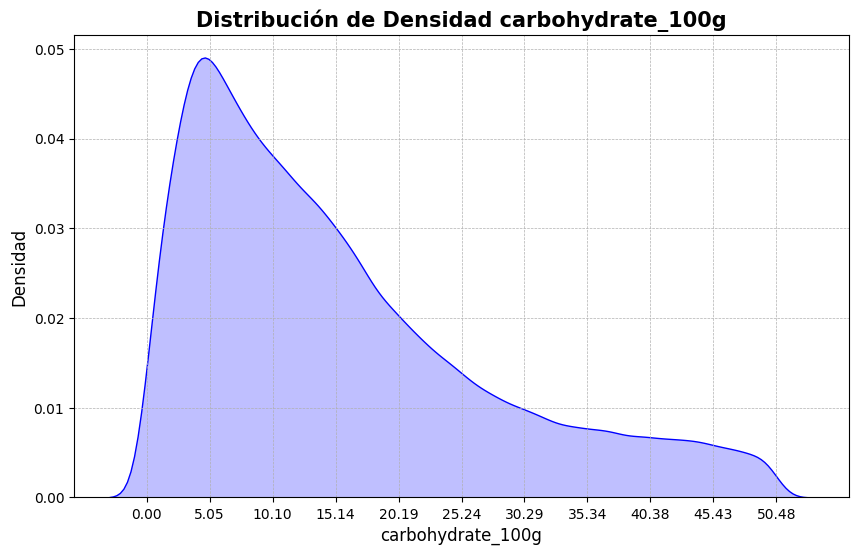



Min carbohydrate_100g:  0.0
Max carbohydrate_100g:  50.48
Promedio carbohydrate_100g:  15.47

1º Quartile:  6.0
2º Quartile (Mediana):  12.25
3º Quartile:  21.77
4º Quartile:  50.48

Valores de "carbohydrate_100g" menores a -17.66 podrían ser outliers (valores bajos).
Valores de "carbohydrate_100g" mayores a 45.42 podrían ser outliers (valores altos).


In [122]:
plot_density_distribution(df_recipes, variable)
print(f"\n")
describir_variable(df_recipes, variable)

Los resultados muestran que el contenido de carbohidratos en las recetas varía considerablemente, con un promedio de 15.47 gramos por cada 100 gramos, lo que refleja una amplia diversidad en las recetas.

###   ***Variable: sugar_100g***

In [123]:
variable = "sugar_100g"

describir_variable(df_recipes, variable)

Min sugar_100g:  0.0
Max sugar_100g:  50.53
Promedio sugar_100g:  5.04

1º Quartile:  1.02
2º Quartile (Mediana):  2.01
3º Quartile:  4.78
4º Quartile:  50.53

Valores de "sugar_100g" menores a -4.62 podrían ser outliers (valores bajos).
Valores de "sugar_100g" mayores a 10.42 podrían ser outliers (valores altos).


Variable: sugar_100g


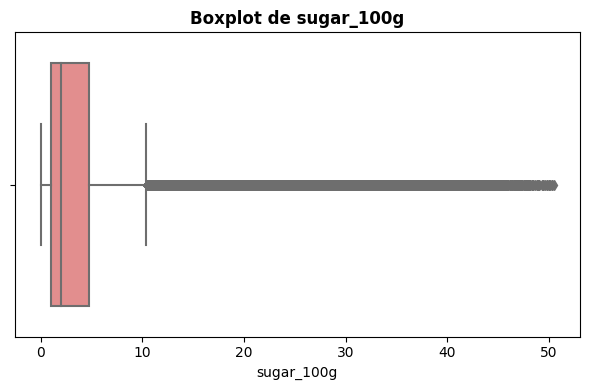

In [124]:
variable = "sugar_100g"

graficar_variable(df_recipes, variable, False)

Veamos los outliers segun el IQR:

In [125]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group
213556,Brazilian Flan (Pudim De Leite),A brazilian lady friend called 'Maria do Carmo...,8,363157.0,188.0,75.0,"[sugar, sweetened condensed milk, whole milk, ...","[1 1/2 cups sugar (caramelized), 2 (14 ounce) ...",[1. To caramelize the sugar: Add the sugar to...,"[dessert, brazilian, low-sodium, time-to-make,...",295.43,7.61,4.10,107.93,50.27,0.00,50.53,7.71,70-80
277139,Sugar Glaze for Pastries,"Glaze for open fruit tarts, cake toppings such...",10,228877.0,90.0,11.0,"[water, sugar, liquid glucose]","[1 lb water, 1 lb sugar, 4 ounces liquid glucose]","[1. Bring to boil water sugar anf glucose., 2....","[dessert, 15-minutes-or-less, time-to-make, co...",195.00,0.00,0.00,1.00,50.44,0.00,50.33,0.00,10-20
206543,Coconut Buttermilk Syrup,Delicious on pancakes and waffles. From http:/...,4,531304.0,36.0,12.0,"[butter, buttermilk, sugar, baking soda, cocon...","[2 tablespoons butter, 1/2 cup buttermilk, 1/3...","[1. In a saucepan, melt the butter, then add b...","[breakfast, 15-minutes-or-less, time-to-make, ...",357.78,16.67,10.56,449.17,50.28,0.00,50.28,3.06,10-20
81289,Pastry Chefs Simple Syrup,This syrup is used for soaking cake layers pri...,10,227930.0,181.0,20.0,"[water, sugar, vanilla, liquor]","[2 lbs water, 2 lbs sugar, 1 teaspoon vanilla,...","[1. Boil water and sugar 1 minute., 2. Cool., ...","[dessert, 30-minutes-or-less, time-to-make, co...",194.64,0.00,0.00,1.05,50.17,0.00,50.11,0.00,20-30
25307,The Perfect Cup of Tea-British Style,I had a rommate for 6 years who was from Engla...,1,230372.0,9.0,3.0,"[tea bag, boiling water, low-fat milk, sugar]","[1 twining's english breakfast tea bag, boilin...","[1. First, you have to boil the water - don't ...","[vegetarian, english, 15-minutes-or-less, time...",204.44,1.11,0.00,24.44,50.00,0.00,50.00,2.22,0-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22698,Pork and Vegetable Stir Fry,"From NBC's show ""Biggest Loser Families"", a re...",4,327042.0,300.0,30.0,"[pam cooking spray, lean pork loin, nu-salt, f...","[Pam cooking spray, 1 lb lean pork loin, cut i...",[1. Heat a large nonstick pan over high heat. ...,"[dinner, pork, 30-minutes-or-less, time-to-mak...",147.97,5.13,1.63,24.77,12.67,1.17,10.43,12.87,30-40
112487,Summer Shortcakes,You can make it with berries or for a variatio...,8,383063.0,234.0,45.0,"[old fashioned oats, all-purpose flour, whole ...","[, 1/2 cup old fashioned oats, 1 cup all or pu...",[1. Prepare shortcakes: Preheat oven to 425 d...,"[dessert, 60-minutes-or-less, time-to-make, co...",136.45,4.15,1.03,161.79,21.84,2.31,10.43,3.93,40-50
274174,Mexican-Style Chocolate Bananas,Prevention Magazine,4,147777.0,70.0,12.0,"[bittersweet chocolate chips, ground cinnamon,...","[1/3 cup bittersweet chocolate chips, 1/4 teas...",[1. Heat chocolate in skillet over low heat ti...,"[dessert, mexican, low-sodium, 15-minutes-or-l...",154.29,8.57,5.14,4.57,24.14,4.86,10.43,3.00,10-20
473735,Grandma Sahlstrom's Ham Loaf,During World War II meat was scarce and ration...,6,490097.0,345.0,110.0,"[veal, ham, cracker crumb, milk, salt %26 pepp...","[1 1/2 lbs veal or 1 1/2 lbs ground beef, 1 lb...","[1. Mix first 6 ingredients, well with hands a...","[dinner, low-carb, low-calorie, low-sodium, ti...",160.14,4.67,1.80,377.01,15.94,0.41,10.43,12.96,110-120


Eliminemos los outliers.

In [126]:
indices_a_eliminar = outliers.index.tolist()
df_recipes = df_recipes.drop(indices_a_eliminar)

Veamos ahora la distribucion:

/tmp/ipykernel_1/3950498448.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{variable}'], shade=True, color='blue')


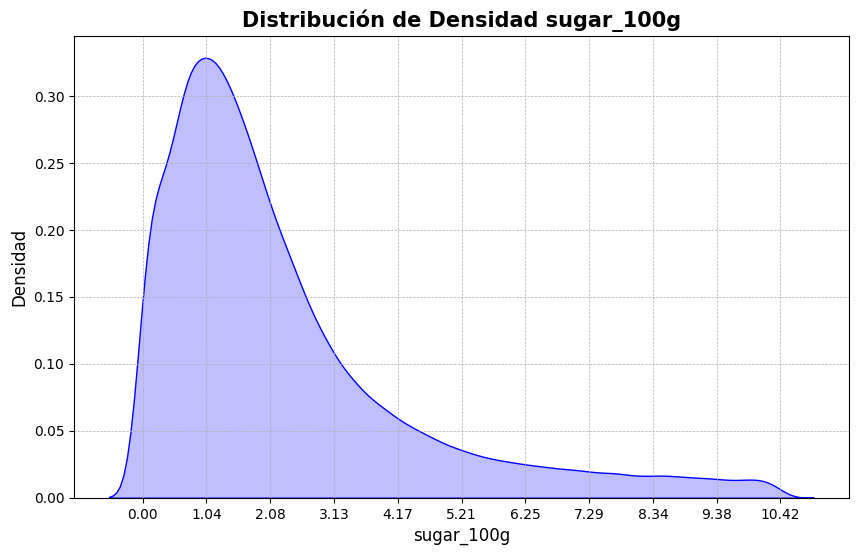



Min sugar_100g:  0.0
Max sugar_100g:  10.42
Promedio sugar_100g:  2.31

1º Quartile:  0.88
2º Quartile (Mediana):  1.67
3º Quartile:  2.97
4º Quartile:  10.42

Valores de "sugar_100g" menores a -2.26 podrían ser outliers (valores bajos).
Valores de "sugar_100g" mayores a 6.1 podrían ser outliers (valores altos).


In [127]:
plot_density_distribution(df_recipes, variable)
print(f"\n")
describir_variable(df_recipes, variable)

###   ***Variable: protein_100g***

In [128]:
variable = "protein_100g"

describir_variable(df_recipes, variable)

Min protein_100g:  0.0
Max protein_100g:  101.91
Promedio protein_100g:  7.93

1º Quartile:  3.33
2º Quartile (Mediana):  6.98
3º Quartile:  11.31
4º Quartile:  101.91

Valores de "protein_100g" menores a -8.64 podrían ser outliers (valores bajos).
Valores de "protein_100g" mayores a 23.28 podrían ser outliers (valores altos).


Variable: protein_100g


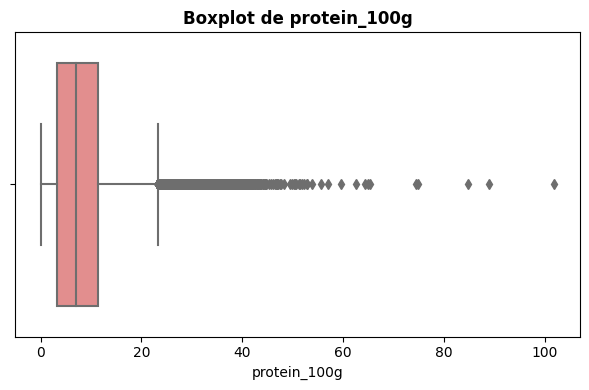



Min protein_100g:  0.0
Max protein_100g:  101.91
Promedio protein_100g:  7.93

1º Quartile:  3.33
2º Quartile (Mediana):  6.98
3º Quartile:  11.31
4º Quartile:  101.91

Valores de "protein_100g" menores a -8.64 podrían ser outliers (valores bajos).
Valores de "protein_100g" mayores a 23.28 podrían ser outliers (valores altos).


In [129]:
variable = "protein_100g"

graficar_variable(df_recipes, variable, False)
print(f"\n")
describir_variable(df_recipes, variable)

Veamos los outliers segun el IQR:

In [130]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group
446071,Gelatin Fingers,Great for kids.,12,169369.0,47.0,30.0,"[gelatin, boiling water, cold water, fruit jui...","[4 (6 ounce) envelopes gelatin, 1 1/2 cups boi...","[1. Dissolve gelatin in hot water., 2. Add oth...","[dessert, 30-minutes-or-less, time-to-make, co...",399.15,0.21,0.00,235.11,0.00,0.00,0.00,101.91,30-40
479490,Ghoulish Grape Hands,I have not tried this recipe. I got it from Ne...,3,254639.0,9.0,20.0,"[juicy juice harvest surprise, unflavored gela...",[4 cups nestle grape Juicy Juice Harvest Surpr...,[1. Directions: Rinse insides of 3 clear plast...,"[dessert, 30-minutes-or-less, time-to-make, co...",347.78,0.00,0.00,203.33,0.00,0.00,0.00,88.89,20-30
386747,Kitchen Princess Rainbow Jelly,"Another Kitchen Princess recipe, although I ha...",8,255704.0,53.0,105.0,"[juice, gelatin, granulated sugar]","[1 cup juice, five different juices (try choos...","[1. In a small pot, add 1 cup juice over low h...","[dessert, time-to-make, course, preparation, 5...",339.43,0.19,0.00,194.15,2.08,0.00,2.08,84.72,100-110
30228,Red Lobster's Grilled Baby Rack of Shrimp,Those who are familiar with a rack of lamb or ...,4,317664.0,43.0,21.0,"[shrimp, skewers, barbecue sauce]","[28 shrimp, peeled and deveined , 4 grilling s...","[1. Before lighting the grill, make sure it is...","[healthy, low-carb, low-fat, shrimp, low-calor...",354.65,3.95,1.16,802.33,0.00,0.00,0.00,74.88,20-30
175032,Indian Spiced Shrimp,Shrimp with indian spices,4,310756.0,31.0,10.0,"[shrimp, curry, ginger, turmeric, allspice, cu...","[20 shrimp, fresh (or frozen), 1/4 teaspoon cu...","[1. Thaw shrimp, if frozen. Shell and devein. ...","[healthy, low-carb, low-fat, shrimp, low-calor...",360.65,4.19,0.97,796.45,1.61,0.65,0.00,74.52,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,Budapest Tenderloin Steaks,Found this recipe off a website--sounded like ...,4,51036.0,258.0,40.0,"[beef tenderloin, bacon fat, goose liver, fiel...","[2 lbs beef tenderloin, bacon fat, rendered fr...",[1. Fry the onion in the bacon fat until trans...,"[dinner, 60-minutes-or-less, time-to-make, cou...",296.82,20.66,7.36,54.07,3.76,1.05,1.98,23.29,40-50
460098,Salmon &amp; Shrimp Confetti Croquettes,This is my own creation. We had an extra guest...,4,227283.0,161.0,75.0,"[salmon fillet, shrimp, red bell peppers, scal...","[1 lb salmon fillet, steamed, chilled and flak...","[1. Mix all ingredients together., 2. Form int...","[healthy, low-carb, low-sodium, low-fat, shrim...",163.73,3.73,0.75,139.81,7.58,0.37,0.25,23.29,70-80
457911,Potato Chip Chicken Breasts,I found this recipe on a calendar at the Docto...,6,112428.0,140.0,40.0,"[boneless skinless chicken breasts, eggs, milk...","[6 or 8 boneless skinless chicken breasts, 2 ...","[1. Preheat oven to 400 degrees., 2. Crush the...","[dinner, chicken, 60-minutes-or-less, time-to-...",298.57,15.07,4.43,251.79,17.21,1.50,1.50,23.29,40-50
291986,Garlic and Rosemary Shrimp,I came across this recipe when looking for thi...,4,96053.0,301.0,50.0,"[medium shrimp, butter, olive oil, head of gar...","[3 lbs unpeeled medium shrimp, 1/4 cup butter ...","[1. Peel shrimp, leaving tails on and set asid...","[shrimp, 60-minutes-or-less, time-to-make, mai...",215.88,10.30,3.42,341.50,3.02,0.20,0.43,23.29,50-60


Eliminemos los outliers.

In [131]:
indices_a_eliminar = outliers.index.tolist()
df_recipes = df_recipes.drop(indices_a_eliminar)

Veamos ahora la distribucion:

/tmp/ipykernel_1/3950498448.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{variable}'], shade=True, color='blue')


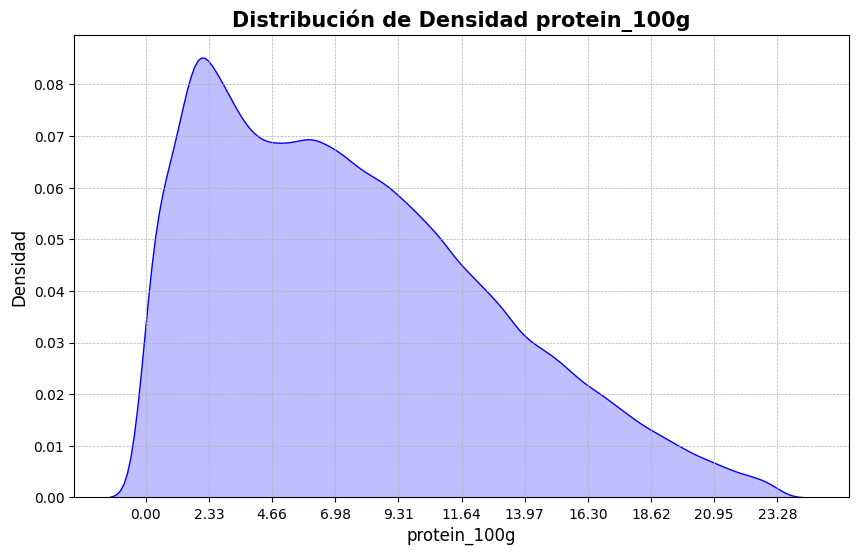



Min protein_100g:  0.0
Max protein_100g:  23.28
Promedio protein_100g:  7.65

1º Quartile:  3.28
2º Quartile (Mediana):  6.88
3º Quartile:  11.09
4º Quartile:  23.28

Valores de "protein_100g" menores a -8.44 podrían ser outliers (valores bajos).
Valores de "protein_100g" mayores a 22.8 podrían ser outliers (valores altos).


In [132]:
plot_density_distribution(df_recipes, variable)
print(f"\n")
describir_variable(df_recipes, variable)

###   ***Variable: fiber_100g***

In [133]:
variable = "fiber_100g"

describir_variable(df_recipes, variable)

Min fiber_100g:  0.0
Max fiber_100g:  30.0
Promedio fiber_100g:  1.47

1º Quartile:  0.58
2º Quartile (Mediana):  1.17
3º Quartile:  1.95
4º Quartile:  30.0

Valores de "fiber_100g" menores a -1.48 podrían ser outliers (valores bajos).
Valores de "fiber_100g" mayores a 4.0 podrían ser outliers (valores altos).


Variable: fiber_100g


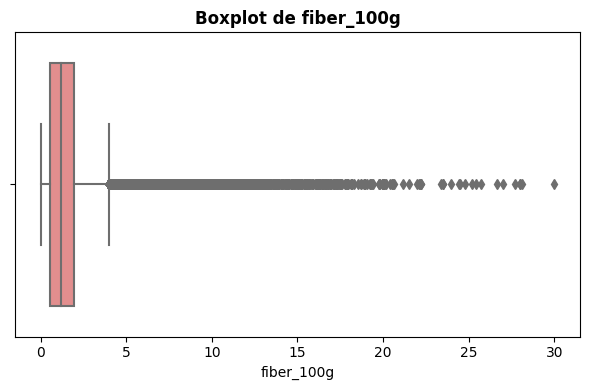

In [134]:
variable = "fiber_100g"

graficar_variable(df_recipes, variable, False)

Veamos los outliers segun el IQR:

In [135]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group
462292,Cinnamon Coffee,I considered not posting this since it's not r...,1,245091.0,1.0,12.0,"[ground coffee, water, ground cinnamon]","[3/4 cup ground coffee, water, 1/4 teaspoon gr...",[1. Add coffee grounds and water to coffee mak...,"[dinner, vegetarian, 15-minutes-or-less, time-...",150.00,0.00,0.00,10.00,50.00,30.00,0.00,0.00,10-20
329516,Hamour tikka,This is from the Thursday magazine and was sub...,4,60843.0,436.0,75.0,"[hamour fillet, red chili powder, cumin powder...","[500 g boneless hamour fillet, pieces , 50 g r...","[1. Mix all the ingredients, except fish, to p...","[side, indian, appetizer, weeknight, time-to-m...",313.90,16.93,2.91,840.18,45.48,28.10,6.17,16.10,70-80
431798,Cinnamon London Broil,"Sweet and tasty, great for summertime grilling.",4,387575.0,10.0,22.0,"[london broil beef, lemon juice, barbecue sauc...","[1 london broil beef, 1 teaspoon lemon juice, ...",[1. 1. Shake well in bag and marinate in fridg...,"[dinner, weeknight, 30-minutes-or-less, time-t...",164.00,2.00,0.00,319.00,47.00,28.00,3.00,3.00,20-30
488922,Cinnamon Black Tea,This particular recipe is inspired by the Midd...,1,447904.0,10.0,15.0,"[cinnamon, black tea]","[2 teaspoons cinnamon, 1 teaspoon black tea]",[1. Assemble all the ingredients and place in ...,"[low-fat, healthy, low-sodium, 15-minutes-or-l...",130.00,1.00,0.00,5.00,42.00,28.00,1.00,2.00,10-20
32326,Chocolate Coconut Mousse - Hcg P3,A sweet treat!! =),1,477365.0,13.0,20.0,"[coconut milk, vanilla extract, stevia, unswee...",[coconut milk (chilled and separated... use on...,[1. Whip creamy chilled coconut milk with a ha...,"[vegetarian, dessert, vegan, 30-minutes-or-les...",236.15,11.54,6.92,19.23,50.00,27.69,3.85,16.15,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197544,Grecian Party Squares,Another Junior League recipe from the Edible H...,8,463566.0,202.0,45.0,"[crescent rolls, dry vegetable soup mix, mayon...","[2 (8 ounce) cans crescent rolls, 0.5 (1 ounce...",[1. Preheat oven to 375 degrees. Flatten cres...,"[appetizer, 60-minutes-or-less, time-to-make, ...",183.76,7.57,2.87,365.89,24.41,4.01,3.27,5.64,40-50
58668,Smooth Summer Smoothie,"Every summer, when the family is all together ...",4,489034.0,137.0,6.0,"[raspberries, blueberries, strawberry, mango, ...","[1 1/2 cups raspberries, 1 1/2 cups blueberrie...",[1. 1. Pour cranberry/raspberry cocktail juice...,"[dinner, breakfast, 15-minutes-or-less, time-t...",62.63,0.51,0.00,1.53,15.04,4.01,9.49,1.02,0-10
268196,"Lamb, Lemon and Olive Pasta",From Healthy Food Guide magazine and posted fo...,4,371101.0,277.0,30.0,"[onion, olive oil flavored cooking spray, grou...","[1/2 onion, finely chopped , olive oil flavore...",[1. Cook onion in olive oil spray until soft. ...,"[dinner, pasta, italian, lamb, 30-minutes-or-l...",263.97,15.16,5.02,203.36,24.40,4.01,0.90,8.92,30-40
171903,Sweet Potatoes With Warm Black Bean Salad,"I haven't tried this recipe yet, but it sounds...",4,298280.0,289.0,25.0,"[sweet potatoes, black beans, tomatoes, extra ...","[4 medium sweet potatoes, 1 (15 ounce) can bla...",[1. Prick sweet potatoes with a fork in severa...,"[side, dessert, salad, healthy, low-fat, low-c...",96.19,2.08,0.62,179.62,16.57,4.01,2.46,3.46,20-30


Para esta variable, a pesar de que segun el rango IQR indica que valores mayores a 4 son outliers, consideramos que hasta 10g de fibra cada 10g es lo normal, por lo que vamos a borrar los registros con fibra por encima de esto.

Eliminemos los outliers.

In [136]:
df_recipes = df_recipes[df_recipes.fiber_100g < 10]

Veamos ahora la distribucion:

/tmp/ipykernel_1/3950498448.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{variable}'], shade=True, color='blue')


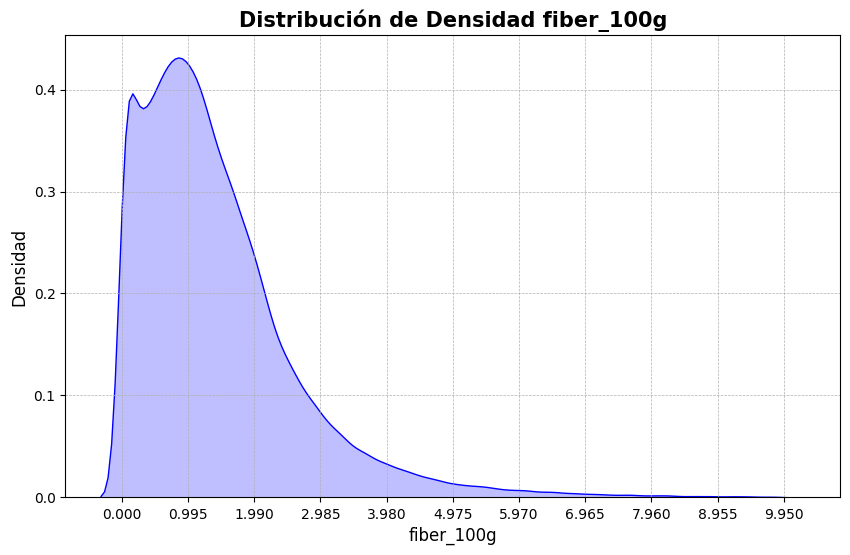



Min fiber_100g:  0.0
Max fiber_100g:  9.95
Promedio fiber_100g:  1.44

1º Quartile:  0.58
2º Quartile (Mediana):  1.17
3º Quartile:  1.94
4º Quartile:  9.95

Valores de "fiber_100g" menores a -1.46 podrían ser outliers (valores bajos).
Valores de "fiber_100g" mayores a 3.98 podrían ser outliers (valores altos).


In [137]:
plot_density_distribution(df_recipes, variable)
print(f"\n")
describir_variable(df_recipes, variable)

###   ***Variable: sodium_100g***

In [138]:
variable = "sodium_100g"

describir_variable(df_recipes, variable)

Min sodium_100g:  0.0
Max sodium_100g:  87205.0
Promedio sodium_100g:  278.65

1º Quartile:  93.08
2º Quartile (Mediana):  211.7
3º Quartile:  364.48
4º Quartile:  87205.0

Valores de "sodium_100g" menores a -314.02 podrían ser outliers (valores bajos).
Valores de "sodium_100g" mayores a 771.58 podrían ser outliers (valores altos).


Filtremos algunos outliers. para poder visualizar el boxplot.

In [139]:
df_recipes = df_recipes[df_recipes.sodium_100g < 1500]

Variable: sodium_100g


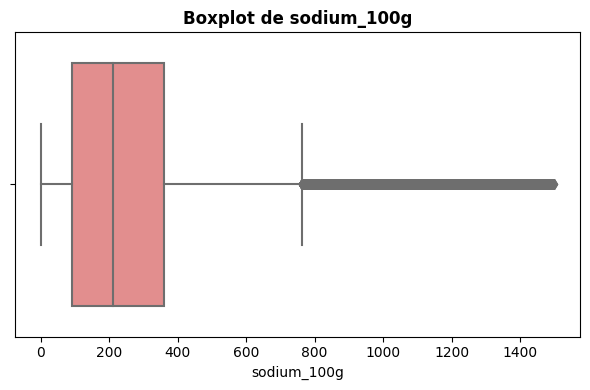



Min sodium_100g:  0.0
Max sodium_100g:  1499.44
Promedio sodium_100g:  256.82

1º Quartile:  92.44
2º Quartile (Mediana):  210.19
3º Quartile:  360.99
4º Quartile:  1499.44

Valores de "sodium_100g" menores a -310.39 podrían ser outliers (valores bajos).
Valores de "sodium_100g" mayores a 763.82 podrían ser outliers (valores altos).


In [140]:
variable = "sodium_100g"

graficar_variable(df_recipes, variable, False)
print(f"\n")
describir_variable(df_recipes, variable)

Veamos los outliers segun el IQR:

In [141]:
outliers = detect_outliers_iqr(df_recipes, variable)
outliers

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group
102859,Pad Thai,This is one of those recipes that may look a l...,2,338108.0,285.0,20.0,"[prawns, chicken breast, garlic cloves, fresh ...",[500 g green prawns (deveined and tails remove...,"[1. Combine prawns, soy sauce and garlic - mar...","[thai, 30-minutes-or-less, time-to-make, main-...",278.63,4.98,1.05,1499.44,36.67,1.33,3.93,20.46,20-30
144637,Orange Glazed Ham With Mustard Sauce,Recipe courtesy of www.jamiecooksitup.blogspot...,14,525206.0,204.0,105.0,"[spiral cut ham, butter, brown sugar, honey, o...","[7 or 10 lbs precooked spiral cut ham, 1/2 cu...",[1. Melt 1/2 cup butter in a medium sized glas...,"[dinner, pork, ham, time-to-make, main-ingredi...",276.03,15.15,6.52,1497.21,15.29,1.57,10.34,19.07,100-110
220194,The Easiest Hot Dog Soup,My great grandmother made this during the Depr...,4,371969.0,104.0,20.0,"[condensed cream of pea soup, condensed cream ...",[2 (10 ounce) cans condensed cream of pea soup...,"[1. Combine the soups in a sauce pan, add wate...","[soup, 30-minutes-or-less, time-to-make, cours...",337.40,25.67,9.90,1495.67,15.96,0.58,2.79,10.48,20-30
238796,North African Spiced Chicken,"From Bobby Flay, these chicken breasts are rub...",4,503438.0,126.0,20.0,"[ground cumin, kosher salt, ground cinnamon, g...","[1 tablespoon ground cumin, 1 tablespoon koshe...","[1. Preheat the grill to medium-high., 2. Comb...","[healthy, dinner, low-carb, low-fat, low-calor...",117.38,2.78,0.56,1495.63,2.14,0.87,0.08,20.24,20-30
92207,Salsa,My favorite Salsa! From Sunspot restaurant in ...,6,284210.0,190.0,12.0,"[tomatillos, yellow onions, cilantro, serranos...",[1 1/2 lbs tomatillos or 2 (28 ounce) cans tom...,[1. Peel husks and blanch tomatillos (in boili...,"[appetizer, 15-minutes-or-less, time-to-make, ...",34.58,0.74,0.11,1495.47,7.00,2.05,3.42,1.26,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188505,Verena's Mystery Biscuits,Wonderful light and tender biscuits.,1,190681.0,518.0,30.0,"[flour, baking powder, salt, mayonnaise, milk,...","[2 cups flour, sifted , 1 tablespoon baking po...","[1. Sift flour, baking powder and salt., 2. Ad...","[bread, 30-minutes-or-less, time-to-make, cour...",254.56,5.98,1.70,763.90,43.19,1.31,1.66,6.64,30-40
310937,Cedar Planked Salmon With Spice Rub,Cooking fish on wooden planks is a native trad...,6,123504.0,166.0,40.0,"[cedar plank, salmon fillets, olive oil, brown...",[1 cedar plank (approx. 8 or inch x12 or inch)...,[1. Soak plank in a tub of cold water for at l...,"[dinner, fish, 60-minutes-or-less, time-to-mak...",136.39,4.64,0.72,763.86,4.52,0.30,4.10,18.37,40-50
135724,Thai Chicken Soup(Cook's Illustrated),"If you want a soup with less fat, it is possib...",4,487265.0,508.0,45.0,"[canola oil, lemongrass, fresh ginger, garlic ...","[1 tablespoon canola oil, 1 or 2 stalk lemong...",[1. 1. Heat the oil in a large stockpot or Dut...,"[thai, soup, lactose-free, chicken, lactose, w...",124.19,10.10,7.72,763.86,3.72,0.57,1.02,6.30,40-50
320412,Pork and Lemongrass Meatballs in Lettuce Cups,Nice,4,451899.0,306.0,90.0,"[pork, lemongrass, shallot, cilantro, fish sau...","[1 lb pork, ground , 1 stalk lemongrass, smash...",[1. Meatballs: Chill port in freezer whild ma...,"[dinner, vietnamese, pork, time-to-make, cours...",125.13,6.83,1.60,763.86,4.77,0.39,2.81,11.14,90-100


Eliminemos los outliers.

In [142]:
indices_a_eliminar = outliers.index.tolist()
df_recipes = df_recipes.drop(indices_a_eliminar)

Veamos ahora la distribucion:

/tmp/ipykernel_1/3950498448.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[f'{variable}'], shade=True, color='blue')


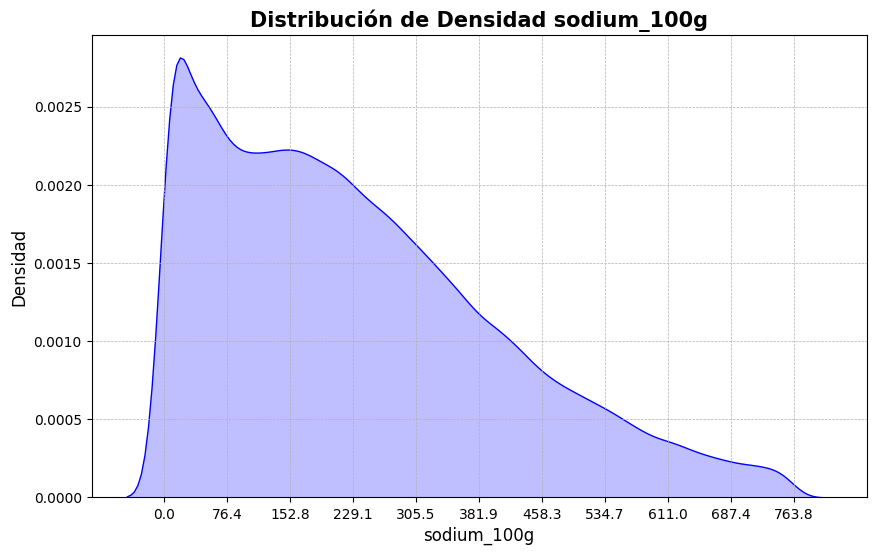



Min sodium_100g:  0.0
Max sodium_100g:  763.81
Promedio sodium_100g:  233.4

1º Quartile:  88.75
2º Quartile (Mediana):  202.39
3º Quartile:  342.9
4º Quartile:  763.81

Valores de "sodium_100g" menores a -292.47 podrían ser outliers (valores bajos).
Valores de "sodium_100g" mayores a 724.12 podrían ser outliers (valores altos).


In [143]:
plot_density_distribution(df_recipes, variable)
print(f"\n")
describir_variable(df_recipes, variable)

Una vez tratados los outliers, veamos el describe.

In [144]:
df_recipes.describe()

,servings,recipe_id,recipe_grams,recipe_minutes,calories_100g,fat_100g,saturated_fat_100g,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g
count,203559.000000,203559.000000,203559.000000,203559.000000,203559.000000,203559.000000,203559.000000,203559.000000,203559.000000,203559.000000,203559.000000,203559.000000
mean,5.008474,277847.389646,280.611317,43.076494,144.302607,7.250346,2.698765,233.404462,12.377178,1.432988,2.285003,7.529554
std,2.470948,151980.779876,148.189803,22.929253,74.275946,5.413743,2.433019,175.690317,9.453298,1.227760,2.090830,5.149968
min,1.000000,44.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,148102.000000,170.000000,25.000000,90.490000,2.960000,0.720000,88.750000,5.230000,0.580000,0.880000,3.210000
50%,4.000000,280646.000000,253.000000,40.000000,136.590000,6.150000,1.990000,202.390000,10.140000,1.170000,1.660000,6.750000
75%,6.000000,409735.000000,363.500000,60.000000,191.610000,10.500000,4.050000,342.900000,16.990000,1.940000,2.910000,10.900000
max,14.000000,537802.000000,736.000000,112.000000,480.120000,27.270000,10.890000,763.810000,50.470000,9.950000,10.420000,23.280000


Y veamos cuantos registros quedaron.

In [145]:
len(df_recipes)

203559

# **2. Preprocesamiento de Reviews**

Una primera vista a las base de datos:

In [146]:
df_reviews.head()

,ReviewId,RecipeId,AuthorId,Rating,Review,DateSubmitted
0,2,992,2008,5,better than any you can get at a restaurant!,2000-01-25T21:44:00Z
1,7,4384,1634,4,"I cut back on the mayo, and made up the differ...",2001-10-17T16:49:59Z
2,9,4523,2046,2,i think i did something wrong because i could ...,2000-02-25T09:00:00Z
3,13,7435,1773,5,easily the best i have ever had. juicy flavor...,2000-03-13T21:15:00Z
4,14,44,2085,5,An excellent dish.,2000-03-28T12:51:00Z


In [147]:
# Identificar cantidad de filas y columnas
print(f"El dataset de reviews tiene {len(df_reviews)} registros y {len(df_reviews.columns)} columnas")

El dataset de reviews tiene 1401982 registros y 6 columnas


Veamos la columnas de cada base:

In [148]:
print(f"Las columnas con las que cuenta el dataset de reviews son las siguientes:")
for col in df_reviews.columns:
    print(f"- {col}")

Las columnas con las que cuenta el dataset de reviews son las siguientes:
- ReviewId
- RecipeId
- AuthorId
- Rating
- Review
- DateSubmitted


Informacion del dataset:

In [149]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1401982 entries, 0 to 1401981
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   ReviewId       1401982 non-null  int64 
 1   RecipeId       1401982 non-null  int64 
 2   AuthorId       1401982 non-null  int64 
 3   Rating         1401982 non-null  int64 
 4   Review         1401768 non-null  object
 5   DateSubmitted  1401982 non-null  object
dtypes: int64(4), object(2)
memory usage: 64.2+ MB


In [150]:
print(f"La cantidad de registros duplicados del dataset de reviews es: {df_reviews.duplicated().sum ()}")

La cantidad de registros duplicados del dataset de reviews es: 0


## **2.1. Tratamiento de Nulos**

Veamos la cantidad de nulos de nuevo:

In [151]:
print("Porcentaje de nulos por variable en df:")
(df_reviews.isnull().sum().sort_values()/len(df_reviews))*100

Porcentaje de nulos por variable en df:


ReviewId         0.000000
RecipeId         0.000000
AuthorId         0.000000
Rating           0.000000
DateSubmitted    0.000000
Review           0.015264
dtype: float64

Como las reviews vamos a necesitarlas, eliminemos los nulos de estos registros.

In [152]:
df_reviews.dropna(inplace=True)

Verifiquemos que se hayan eliminado correctamente.

In [153]:
print("Porcentaje de nulos por variable en df:")
(df_reviews.isnull().sum().sort_values()/len(df_reviews))*100

Porcentaje de nulos por variable en df:


ReviewId         0.0
RecipeId         0.0
AuthorId         0.0
Rating           0.0
Review           0.0
DateSubmitted    0.0
dtype: float64

## **2.2. Transformacion de Variables**

En primer lugar renombremos las variables:

In [154]:
df_reviews.columns = df_reviews.columns.str.replace('([A-Z])', r'_\1', regex=True).str.lower().str.replace('_+', '_', regex=True).str.strip('_')

df_reviews.columns

Index(['review_id', 'recipe_id', 'author_id', 'rating', 'review',
       'date_submitted'],
      dtype='object')

Veamos que variables son numericas y cuales categoricas:

In [155]:
variables_numericas = df_reviews.select_dtypes(include=['int', 'float'])
print("Veamos las variables numéricas del dataset:")
for columna in variables_numericas.columns:
    print(f"- {columna}")

Veamos las variables numéricas del dataset:
- review_id
- recipe_id
- author_id
- rating


In [156]:
variables_categoricas = df_reviews.select_dtypes(include=['object'])
print("Veamos las variables categoricas del dataset:")
for columna in variables_categoricas.columns:
    print(f"- {columna}")

Veamos las variables categoricas del dataset:
- review
- date_submitted


### ***Variable: date_submitted***

In [157]:
df_reviews.date_submitted

0          2000-01-25T21:44:00Z
1          2001-10-17T16:49:59Z
2          2000-02-25T09:00:00Z
3          2000-03-13T21:15:00Z
4          2000-03-28T12:51:00Z
                   ...         
1401977    2020-12-27T23:57:54Z
1401978    2020-12-28T00:44:42Z
1401979    2020-12-28T01:04:43Z
1401980    2020-12-28T03:07:10Z
1401981    2020-12-28T03:23:48Z
Name: date_submitted, Length: 1401768, dtype: object

Como podemos ver, el año de la review no esta en un formato comodo para trabajar, es por ello que vamos a transformarla, quedandonos solo con el año.

In [158]:
df_reviews['date_submitted'] = pd.to_datetime(df_reviews['date_submitted'], errors='coerce')
df_reviews['review_date'] = df_reviews['date_submitted'].dt.year

df_reviews[['date_submitted', 'review_date']].head()

,date_submitted,review_date
0,2000-01-25 21:44:00+00:00,2000
1,2001-10-17 16:49:59+00:00,2001
2,2000-02-25 09:00:00+00:00,2000
3,2000-03-13 21:15:00+00:00,2000
4,2000-03-28 12:51:00+00:00,2000


Una vez modificada la variable, eliminemos la que no vamos a usar.

In [159]:
df_reviews.drop('date_submitted', axis=1, inplace=True)

### ***Variable: rating***

In [160]:
df_reviews.groupby('rating').size()

rating
0      76248
1      16555
2      17596
3      50276
4     229181
5    1011912
dtype: int64

In [161]:
df_reviews.rating.dtype

dtype('int64')

Esta variable no tiene errores, por lo que no es necesario hacer una transformacion.

# **3. Creacion de Variables**

### ***Variables Nuevas: avg_rating y review_count***

Se crean dos variables nuevas en `df_recipes` a partir de los datos en `df_reviews`: el puntaje promedio (`avg_rating`) y la cantidad de reseñas (`review_count`) por receta. Esto permite un análisis más detallado de la popularidad y la calidad percibida de cada receta, facilitando la identificación de las recetas más valoradas y con mayor interacción.

In [162]:
# Calcular el puntaje promedio y la cantidad de reseñas por cada receta en df_reviews
reviews_summary = df_reviews.groupby('recipe_id').agg(
    avg_rating=('rating', lambda x: round(x.mean(), 2)),
    review_count=('rating', 'count')
).reset_index()

df_recipes = df_recipes.merge(reviews_summary, how='left', left_on='recipe_id', right_on='recipe_id')

df_recipes[['recipe_id', 'avg_rating', 'review_count']].head()

,recipe_id,avg_rating,review_count
0,96313.0,4.67,3.0
1,232037.0,5.00,3.0
2,232083.0,4.71,17.0
3,79222.0,3.96,25.0
4,393638.0,4.00,1.0


### ***Variable Nueva: n_ingredients***
En esta sección, se crea una nueva variable llamada `n_ingredients` para cada receta. Esta variable representa el número de ingredientes utilizados en cada receta y se derivó contando los elementos presentes en la lista de ingredientes (`ingredients_list`). El objetivo de esta nueva variable es facilitar el análisis sobre la complejidad o simplicidad de las recetas en función de la cantidad de ingredientes, lo cual puede ser útil para segmentar o comparar recetas en función de su nivel de detalle o preparación.

In [163]:
df_recipes['n_ingredients'] = df_recipes['ingredients_list'].apply(len)

df_recipes[['ingredients_list', 'n_ingredients']].head()

,ingredients_list,n_ingredients
0,"[water, grits, salt, cheddar cheese, garlic, o...",6
1,"[onion, red bell pepper, garlic cloves, large ...",13
2,"[eggs, milk, fresh sage, fresh thyme, garlic c...",8
3,"[butter, onion, garlic, potatoes, flour, milk,...",13
4,"[lean ground beef, ketchup, heinz chili sauce,...",7


### ***Variable Nueva: nutriscore***

En esta sección, se ha introducido la variable `Nutri-Score` en el DataFrame `df_recipes`. Este puntaje se calcula a partir de diversos macronutrientes y calorías por cada 100g de la receta. La metodología para determinar el `Nutri-Score` implica asignar puntos negativos en función del contenido de azúcares, grasas saturadas, sodio y calorías, mientras que se otorgan puntos positivos en función del contenido de fibra y proteínas. Finalmente, el puntaje total se clasifica en categorías desde 'A' (mejor) hasta 'E' (peor). Esta variable permitirá evaluar y comparar la calidad nutricional de las recetas de manera más efectiva, facilitando decisiones informadas sobre la selección de alimentos.

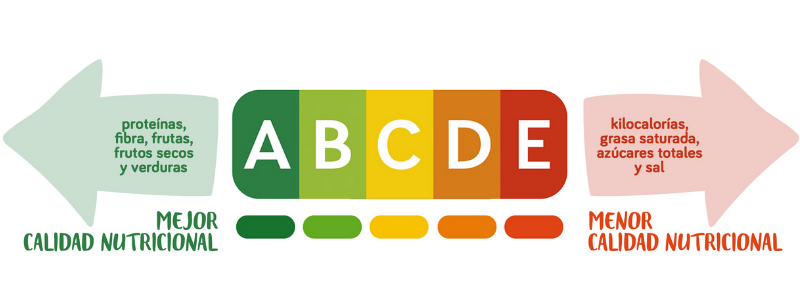

In [164]:
from IPython.display import Image


bucket_name = 'mi-bucket-tfg' 
file_path = 'nutriscore_notebook.png'


client = storage.Client()
bucket = client.get_bucket(bucket_name)
blob = bucket.blob(file_path)

# Descargar la imagen desde GCS a un directorio temporal
local_path = '/tmp/imagen_descargada.png'
blob.download_to_filename(local_path)

# Mostrar la imagen en el notebook
Image(filename=local_path)

In [165]:
def calculate_negative_points(row):
    points = 0

    # Energía (kcal por porción)
    if row['calories_100g'] > 3350:
        points += 10
    elif row['calories_100g'] > 3015:
        points += 9
    elif row['calories_100g'] > 2680:
        points += 8
    elif row['calories_100g'] > 2345:
        points += 7
    elif row['calories_100g'] > 2010:
        points += 6
    elif row['calories_100g'] > 1675:
        points += 5
    elif row['calories_100g'] > 1340:
        points += 4
    elif row['calories_100g'] > 1005:
        points += 3
    elif row['calories_100g'] > 670:
        points += 2
    elif row['calories_100g'] > 335:
        points += 1

    # Grasas totales (g por porción)
    if row['fat_100g'] > 10:
        points += 10
    elif row['fat_100g'] > 9:
        points += 9
    elif row['fat_100g'] > 8:
        points += 8
    elif row['fat_100g'] > 7:
        points += 7
    elif row['fat_100g'] > 6:
        points += 6
    elif row['fat_100g'] > 5:
        points += 5
    elif row['fat_100g'] > 4:
        points += 4
    elif row['fat_100g'] > 3:
        points += 3
    elif row['fat_100g'] > 2:
        points += 2
    elif row['fat_100g'] > 1:
        points += 1

    # Grasas saturadas (g por porción)
    if row['saturated_fat_100g'] > 10:
        points += 10
    elif row['saturated_fat_100g'] > 9:
        points += 9
    elif row['saturated_fat_100g'] > 8:
        points += 8
    elif row['saturated_fat_100g'] > 7:
        points += 7
    elif row['saturated_fat_100g'] > 6:
        points += 6
    elif row['saturated_fat_100g'] > 5:
        points += 5
    elif row['saturated_fat_100g'] > 4:
        points += 4
    elif row['saturated_fat_100g'] > 3:
        points += 3
    elif row['saturated_fat_100g'] > 2:
        points += 2
    elif row['saturated_fat_100g'] > 1:
        points += 1

    # Azúcares (g por porción)
    if row['sugar_100g'] > 45:
        points += 10
    elif row['sugar_100g'] > 40:
        points += 9
    elif row['sugar_100g'] > 36:
        points += 8
    elif row['sugar_100g'] > 31:
        points += 7
    elif row['sugar_100g'] > 27:
        points += 6
    elif row['sugar_100g'] > 22:
        points += 5
    elif row['sugar_100g'] > 18:
        points += 4
    elif row['sugar_100g'] > 13:
        points += 3
    elif row['sugar_100g'] > 9:
        points += 2
    elif row['sugar_100g'] > 4.5:
        points += 1

    # Sodio (mg por porción)
    if row['sodium_100g'] > 900:
        points += 10
    elif row['sodium_100g'] > 810:
        points += 9
    elif row['sodium_100g'] > 720:
        points += 8
    elif row['sodium_100g'] > 630:
        points += 7
    elif row['sodium_100g'] > 540:
        points += 6
    elif row['sodium_100g'] > 450:
        points += 5
    elif row['sodium_100g'] > 360:
        points += 4
    elif row['sodium_100g'] > 270:
        points += 3
    elif row['sodium_100g'] > 180:
        points += 2
    elif row['sodium_100g'] > 90:
        points += 1

    return points

In [166]:
def calculate_positive_points(row):
    points = 0

    # Fibra (g por porción)
    if row['fiber_100g'] > 4.7:
        points += 5
    elif row['fiber_100g'] > 3:
        points += 4
    elif row['fiber_100g'] > 2:
        points += 3
    elif row['fiber_100g'] > 1.5:
        points += 2
    elif row['fiber_100g'] > 0.9:
        points += 1

    # Proteínas (g por porción)
    if row['protein_100g'] > 20:
        points += 5
    elif row['protein_100g'] > 10:
        points += 4
    elif row['protein_100g'] > 5:
        points += 3
    elif row['protein_100g'] > 2.5:
        points += 2
    elif row['protein_100g'] > 1:
        points += 1

    return points

In [167]:
def calculate_nutriscore(row):
    negative_points = calculate_negative_points(row)
    positive_points = calculate_positive_points(row)

    # Calcular el puntaje total
    total_score = negative_points - positive_points

    # Asignar categorías del Nutri-Score
    if total_score <= 0:
        return 'A'
    elif 1 <= total_score <= 2:
        return 'B'
    elif 3 <= total_score <= 10:
        return 'C'
    elif 11 <= total_score <= 18:
        return 'D'
    else:
        return 'E'

# Aplicar la función para crear la nueva columna 'nutriscore'
df_recipes['nutriscore'] = df_recipes.apply(calculate_nutriscore, axis=1)

df_recipes[['recipe_id', 'nutriscore']].head()

,recipe_id,nutriscore
0,96313.0,C
1,232037.0,C
2,232083.0,A
3,79222.0,B
4,393638.0,D


In [168]:
df_recipes.groupby('nutriscore').size()

nutriscore
A    46953
B    24678
C    75318
D    51496
E     5114
dtype: int64

Cada letra del nutriscore significa:
* **A:** Producto con un perfil nutricional excelente, recomendado para el consumo.
* **B:** Alimento considerado bueno desde el punto de vista nutricional, aunque puede contener ciertos ingredientes que moderan su calidad.
* **C:** Producto con un equilibrio aceptable de nutrientes, que puede ser consumido con moderación.
* **D:** Alimento con un perfil nutricional menos favorable, recomendado para un consumo ocasional.
* **E:** Producto con un bajo valor nutricional, que debería ser evitado o consumido con precaución en la dieta diaria.

# **4. Seleccion de datos**

Ahora si, como luego de preprocesar los datos tenemos una cantidad bastante elevada de recetas y se hace dificil trabajarlas porque hay que crear vectores que demoran y colapsan la RAM, vamos a seleccionar las 50mil recetas que mas reviews tengan.

In [169]:
print(f" El df ahora tiene {len(df_recipes)} recetas")

 El df ahora tiene 203559 recetas


In [170]:
df_recipes[['recipe_id', 'review_count']].sort_values(by='review_count', ascending=False).head(20)

,recipe_id,review_count
99585,45809.0,2892.0
148740,39087.0,1491.0
19152,54257.0,1325.0
17306,22782.0,1273.0
125159,25690.0,1076.0
20147,68955.0,910.0
123300,33919.0,885.0
21039,82102.0,862.0
174594,85629.0,805.0
176372,99476.0,785.0


In [171]:
df_recipes_filtered = df_recipes.sort_values(by='review_count', ascending=False).head(50000)

df_recipes_filtered.reset_index(drop=True, inplace=True)

df_recipes_filtered.head()

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,...,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group,avg_rating,review_count,n_ingredients,nutriscore
0,Bourbon Chicken,I searched and finally found this recipe on th...,4,45809.0,330.0,35.0,"[boneless chicken breasts, olive oil, garlic c...","[2 lbs boneless chicken breasts, cut into bite...",[1. Editor's Note: Named Bourbon Chicken beca...,"[dinner, chinese, low-carb, chicken, 60-minute...",...,476.67,7.09,0.09,6.52,15.18,30-40,4.31,2892.0,11,C
1,Creamy Cajun Chicken Pasta,N'awlin's style of chicken with an updated Alf...,2,39087.0,373.0,25.0,"[boneless skinless chicken breast halves, ling...","[2 boneless skinless chicken breast halves, cu...",[1. Place chicken and Cajun seasoning in a bow...,"[pasta, dinner, cajun, southern, chicken, 30-m...",...,218.98,12.71,0.67,0.83,10.54,20-30,4.54,1491.0,12,D
2,"Yes, Virginia There is a Great Meatloaf",Absolutely delicious meatloaf and sauce! Those...,4,54257.0,232.0,80.0,"[ground beef, bread, egg, vidalia onions, tabl...",[1 1/2 lbs ground beef (ground shoulder roast ...,[1. Meatloaf: Combine meat loaf ingredients an...,"[dinner, southern, low-carb, time-to-make, cou...",...,543.32,10.00,0.17,8.15,15.30,80-90,4.21,1325.0,11,D
3,Jo Mama's World Famous Spaghetti,My kids will give up a steak dinner for this s...,10,22782.0,285.0,80.0,"[italian sausage, onion, garlic cloves, diced ...","[2 lbs Italian sausage, casings removed (mild ...","[1. In large, heavy stockpot, brown Italian sa...","[dinner, pasta, italian, weeknight, time-to-ma...",...,722.32,17.58,1.33,4.00,10.46,80-90,4.42,1273.0,16,D
4,Pancakes,"This is really a great recipe! It is fast, sim...",1,25690.0,407.0,10.0,"[egg, milk, butter, flour, sugar, baking powde...","[1 egg, 3/4 cup milk, 2 tablespoons butter or ...","[1. Beat egg until fluffy., 2. Add milk and me...","[breakfast, 15-minutes-or-less, time-to-make, ...",...,51.65,3.22,0.10,0.37,0.69,10-20,4.43,1076.0,7,A


Ademas, vamos a filtrar el df_reviews para las recetas del df_filtered.

In [172]:
df_reviews_filtered = df_reviews[df_reviews['recipe_id'].isin(df_recipes_filtered['recipe_id'])]

df_reviews_filtered.reset_index(drop=True, inplace=True)

df_reviews_filtered.head()

,review_id,recipe_id,author_id,rating,review,review_date
0,9,4523,2046,2,i think i did something wrong because i could ...,2000
1,14,44,2085,5,An excellent dish.,2000
2,23,4684,2046,5,this is absolutely delicious. i even served i...,2000
3,28,1451,2416,1,Where does the bbq come in,2000
4,55,7762,2369,3,They taste better than they appear.\r\n,2000


# **5. EDA**
EDA (Exploratory Data Analysis) es el análisis exploratorio de datos, un proceso crucial en ciencia de datos y análisis de datos cuyo objetivo principal es comprender la estructura y características de un conjunto de datos antes de aplicar modelos o realizar análisis más avanzados. El EDA ayuda a detectar patrones, verificar supuestos, identificar anomalías o valores atípicos, y formular hipótesis informadas.Dado que la detección de anomalías la realizamos previamente para eliminar el ruido en los datos, comencemos con el analisis de las variables para ver sus datos y las distribuciónes.

In [173]:
df_recipes.columns

Index(['name', 'description', 'servings', 'recipe_id', 'recipe_grams',
       'recipe_minutes', 'ingredients_list', 'ingredients_and_quantities',
       'instructions', 'keywords', 'calories_100g', 'fat_100g',
       'saturated_fat_100g', 'sodium_100g', 'carbohydrate_100g', 'fiber_100g',
       'sugar_100g', 'protein_100g', 'time_group', 'avg_rating',
       'review_count', 'n_ingredients', 'nutriscore'],
      dtype='object')

In [174]:
df_reviews.columns

Index(['review_id', 'recipe_id', 'author_id', 'rating', 'review',
       'review_date'],
      dtype='object')

In [212]:
df_reviews.author_id.nunique()

271725

### ***Distribucion de las porciones***

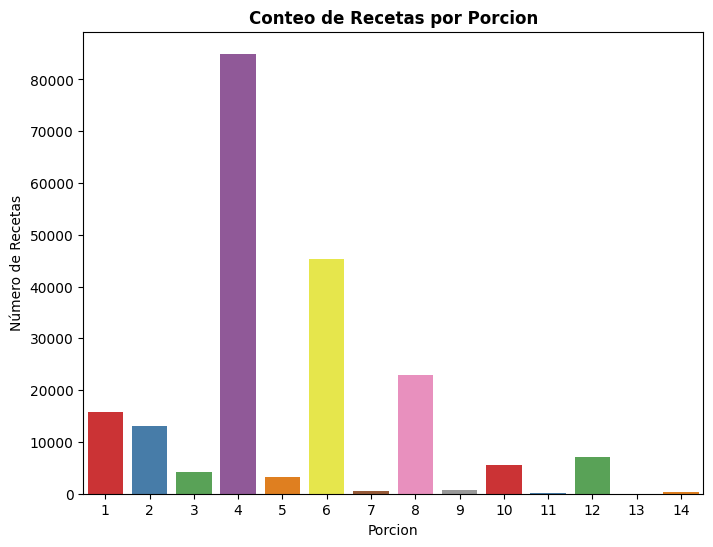

Min servings:  1
Max servings:  14
Promedio servings:  5.01

1º Quartile:  4.0
2º Quartile (Mediana):  4.0
3º Quartile:  6.0
4º Quartile:  14.0

Valores de "servings" menores a 1.0 podrían ser outliers (valores bajos).
Valores de "servings" mayores a 9.0 podrían ser outliers (valores altos).


In [175]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='servings', data=df_recipes, palette='Set1')
plt.title('Conteo de Recetas por Porcion', fontweight='bold')
plt.xlabel('Porcion')
plt.ylabel('Número de Recetas')
plt.show()

describir_variable(df_recipes, 'servings')

Hay al rededor de 80 mil recetas con 4 servings, seguido de aproximadamente 45 mil con 6 servings y 20 mil con 8. Casi no hay recetas con 11, 13 y 14 servings y el promedio es de 5 porciones por receta.

### ***Distribucion de gramos de las porciones***

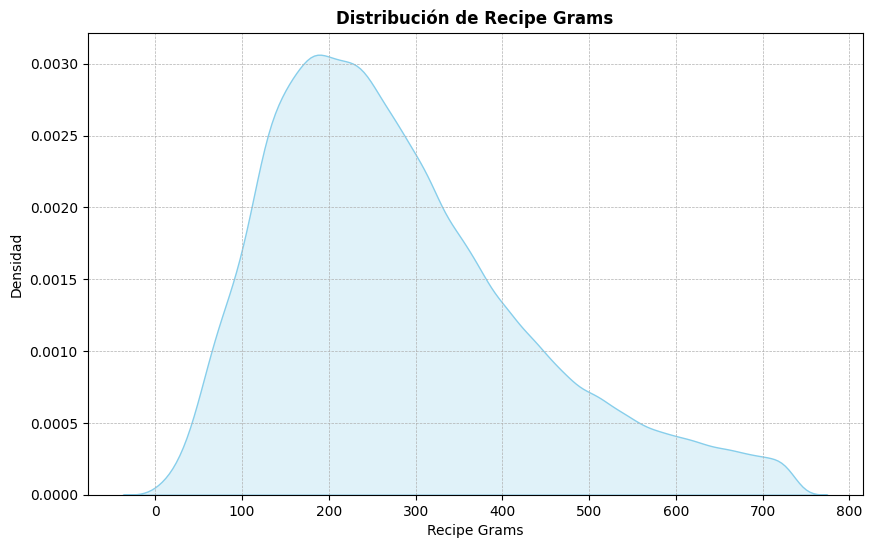

Min recipe_grams:  1.0
Max recipe_grams:  736.0
Promedio recipe_grams:  280.61

1º Quartile:  170.0
2º Quartile (Mediana):  253.0
3º Quartile:  363.5
4º Quartile:  736.0

Valores de "recipe_grams" menores a -120.25 podrían ser outliers (valores bajos).
Valores de "recipe_grams" mayores a 653.75 podrían ser outliers (valores altos).


In [176]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_recipes['recipe_grams'], color='skyblue', fill=True)

plt.title('Distribución de Recipe Grams', fontweight='bold')
plt.xlabel('Recipe Grams')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

describir_variable(df_recipes, 'recipe_grams')

El gráfico muestra un pico alrededor de los 200 gramos, lo que sugiere que la mayoría de las recetas en el conjunto de datos tienen un peso total que oscila entre los 100 y 300 gramos. Este rango parece ser el más común, lo que podría indicar que muchas de las recetas están diseñadas para porciones individuales o tamaños pequeños a medianos, s por ello que el promedio es de 280 gramos.

### ***Distribucion de tiempo de las recetas***

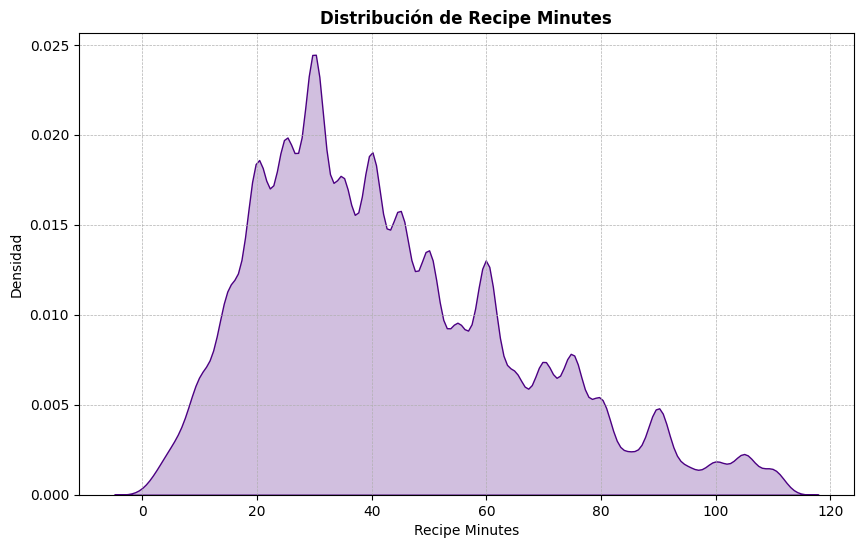

Min recipe_minutes:  1.0
Max recipe_minutes:  112.0
Promedio recipe_minutes:  43.08

1º Quartile:  25.0
2º Quartile (Mediana):  40.0
3º Quartile:  60.0
4º Quartile:  112.0

Valores de "recipe_minutes" menores a -27.5 podrían ser outliers (valores bajos).
Valores de "recipe_minutes" mayores a 112.5 podrían ser outliers (valores altos).


In [177]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_recipes['recipe_minutes'], color='indigo', fill=True)

plt.title('Distribución de Recipe Minutes', fontweight='bold')
plt.xlabel('Recipe Minutes')
plt.ylabel('Densidad')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

describir_variable(df_recipes, 'recipe_minutes')

El gráfico muestra un claro pico en los 30 minutos, lo que indica que la mayoría de las recetas en el conjunto de datos tienen un tiempo de preparación cercano a este valor. El promedio de tiempo de preparación es de 43 minutos. Además, se observa que hay una disminución significativa en la frecuencia de recetas con tiempos de preparación superiores a 90 minutos, lo que sugiere que las recetas que requieren más de una hora y media son relativamente raras en comparación con aquellas de menor duración. Esto podría reflejar una tendencia hacia recetas más rápidas o de preparación sencilla en el conjunto de datos.

### ***Distribucion del numero de ingredientes***

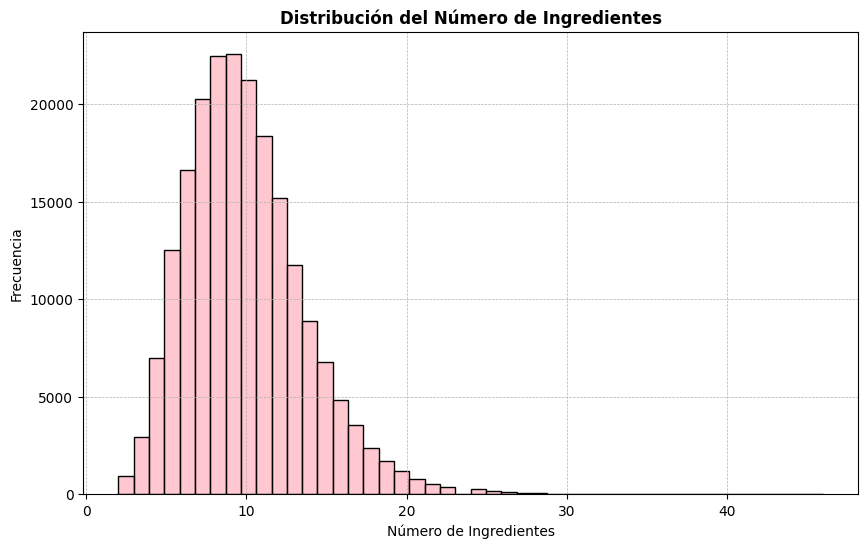

Min n_ingredients:  2
Max n_ingredients:  46
Promedio n_ingredients:  9.8

1º Quartile:  7.0
2º Quartile (Mediana):  9.0
3º Quartile:  12.0
4º Quartile:  46.0

Valores de "n_ingredients" menores a -0.5 podrían ser outliers (valores bajos).
Valores de "n_ingredients" mayores a 19.5 podrían ser outliers (valores altos).


In [178]:
plt.figure(figsize=(10, 6))
sns.histplot(df_recipes['n_ingredients'], bins=46, color='lightpink', kde=False)

plt.title('Distribución del Número de Ingredientes', fontweight='bold')
plt.xlabel('Número de Ingredientes')
plt.ylabel('Frecuencia')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()

describir_variable(df_recipes, 'n_ingredients')

La mayoría de las recetas contienen entre 4 y 12 ingredientes, con un promedio cercano a los 10 ingredientes por receta. Sin embargo, hay una proporción muy pequeña de recetas que superan los 20 ingredientes, y apenas unas pocas alcanzan entre 20 y 40 ingredientes. Esto sugiere que las recetas con una gran cantidad de ingredientes son poco frecuentes en el conjunto de datos.

### ***Matriz de correlacion entre macronutrientes***

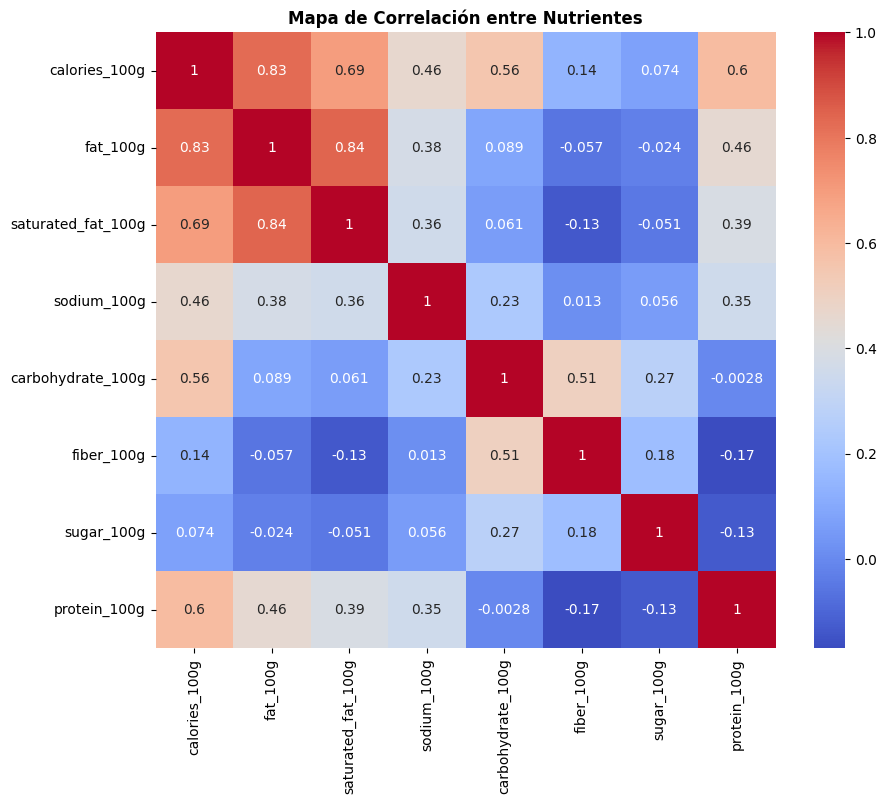

In [179]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_recipes[['calories_100g', 'fat_100g',
       'saturated_fat_100g', 'sodium_100g', 'carbohydrate_100g', 'fiber_100g',
       'sugar_100g', 'protein_100g']].corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Correlación entre Nutrientes', fontweight='bold')
plt.show()

Las variables que muestran la mayor correlación con el total de calorías son las grasas totales y las grasas saturadas, seguidas por los carbohidratos y las proteínas. Esto es lógico, ya que estos macronutrientes son los principales responsables del aporte calórico de los alimentos, con las grasas proporcionando la mayor cantidad de calorías por gramo, seguidas de los carbohidratos y las proteínas. Esta relación es consistente con las expectativas nutricionales.

### ***Cantidad de recetas por Nutriscore***

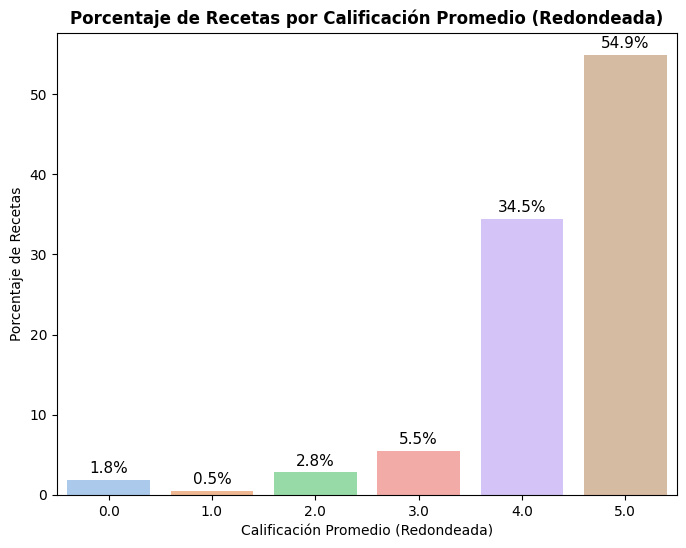

In [180]:
ratings_count = df_recipes.groupby(df_recipes['avg_rating'].round().clip(0, 5))['recipe_id'].count().reset_index(name='recipe_count')

total_recipes = ratings_count['recipe_count'].sum()
ratings_count['percentage'] = (ratings_count['recipe_count'] / total_recipes) * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='avg_rating', y='percentage', data=ratings_count, palette='pastel')  # Cambia a la paleta 'pastel'

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Porcentaje de Recetas por Calificación Promedio (Redondeada)', fontweight='bold')
plt.xlabel('Calificación Promedio (Redondeada)')
plt.ylabel('Porcentaje de Recetas')
plt.xticks(rotation=0)
plt.show()

Se observa una mayor cantidad de recetas con Nutriscore C, seguidas por las de Nutriscore D y A. Es lógico que haya una menor presencia de recetas con Nutriscore E, ya que este puntaje corresponde a productos que no se consideran recomendables para el consumo diario debido a su baja calidad nutricional.

### ***Correlación entre Calorias y Nutriscore***

In [181]:
avg_calories_per_nutriscore = df_recipes.groupby('nutriscore')['calories_100g'].mean().reset_index()

avg_calories_per_nutriscore.columns = ['Nutri-Score', 'Calorías Promedio']

avg_calories_per_nutriscore

,Nutri-Score,Calorías Promedio
0,A,84.431842
1,B,96.108483
2,C,144.415635
3,D,210.303522
4,E,260.288209


Como se puede ver, a medida que la calidad nutricional aumenta, las calorias promedio tambien aumentan. Esto refleja que las calorias tienen una gran incidencia en el etiquetado.

### ***Mapa de Correlación con el Tiempo de preparacion***

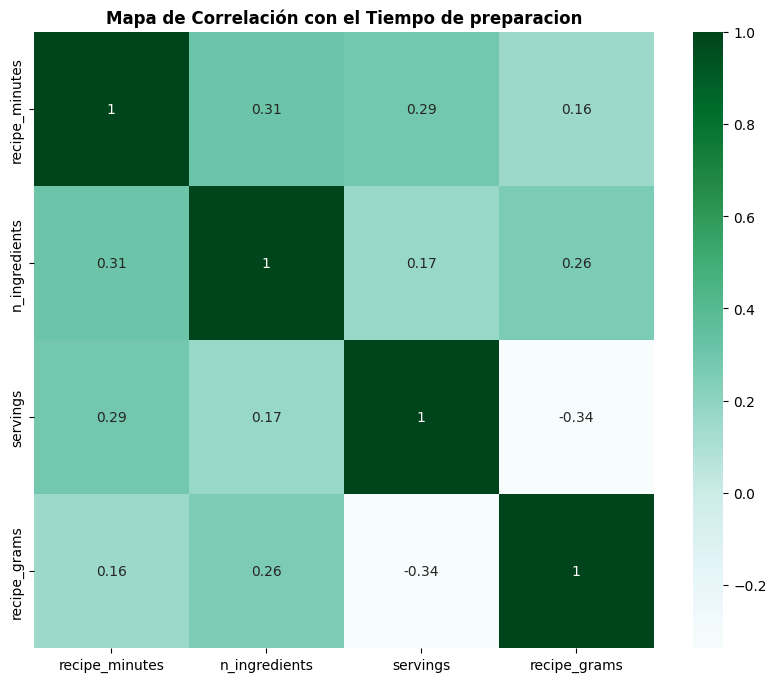

In [182]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_recipes[['recipe_minutes', 'n_ingredients',
       'servings', 'recipe_grams']].corr(), annot=True, cmap='BuGn')
plt.title('Mapa de Correlación con el Tiempo de preparacion', fontweight='bold')
plt.show()

No se observa una correlación significativa entre el tiempo de preparación y variables como los gramos, el número de porciones (servings) ni la cantidad de ingredientes de la receta.

### ***Autores Unicos***

In [214]:
df_reviews.author_id.nunique()

271725

Hay un total de 271725 de autores de reseñas distintos.

### ***Cantidad de reviews por año***

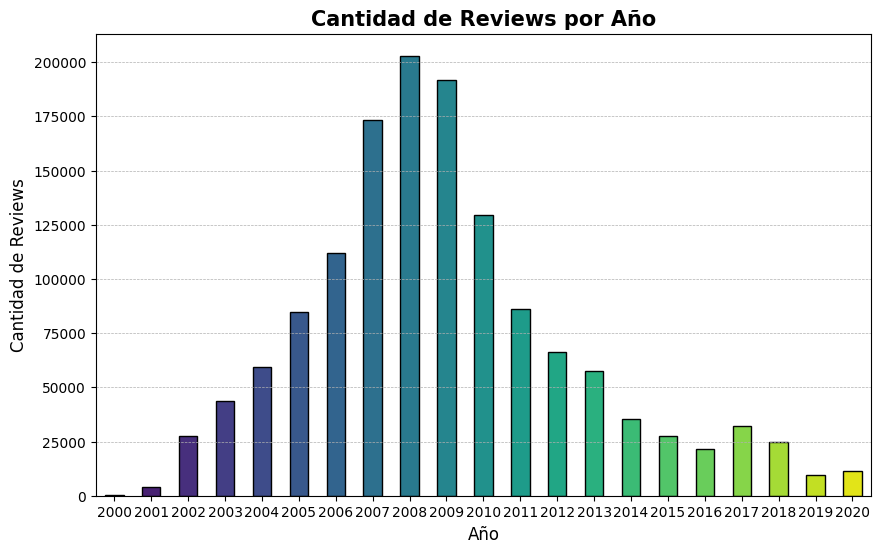

In [183]:
reviews_per_year = df_reviews['review_date'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
colors = sns.color_palette("viridis", len(reviews_per_year))

reviews_per_year.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Cantidad de Reviews por Año', fontsize=15, weight='bold')
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad de Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.show()

In [184]:
variable = 'review_date'

print(f'Min {variable}: ', df_reviews[f'{variable}'].min())
print(f'Max {variable}: ', df_reviews[f'{variable}'].max())

print(f'\n1º Quartile: ', df_reviews[f'{variable}'].quantile(q=0.25))
print(f'2º Quartile (Mediana): ', df_reviews[f'{variable}'].quantile(q=0.50))
print(f'3º Quartile: ', df_reviews[f'{variable}'].quantile(q=0.75))
print(f'4º Quartile: ', df_reviews[f'{variable}'].quantile(q=1.00))

Min review_date:  2000
Max review_date:  2020

1º Quartile:  2007.0
2º Quartile (Mediana):  2008.0
3º Quartile:  2011.0
4º Quartile:  2020.0


La mayor concentración de reseñas se observa entre los años 2007 y 2010, con una disminución en los registros hacia 2020. Esto sugiere que la actividad de reseñas fue más frecuente durante este periodo, y que en años más recientes la cantidad de reseñas ha disminuido notablemente. La base de datos cuenta con reseñas hasta el año 2020.

### ***Cantidad de reviews por rating***

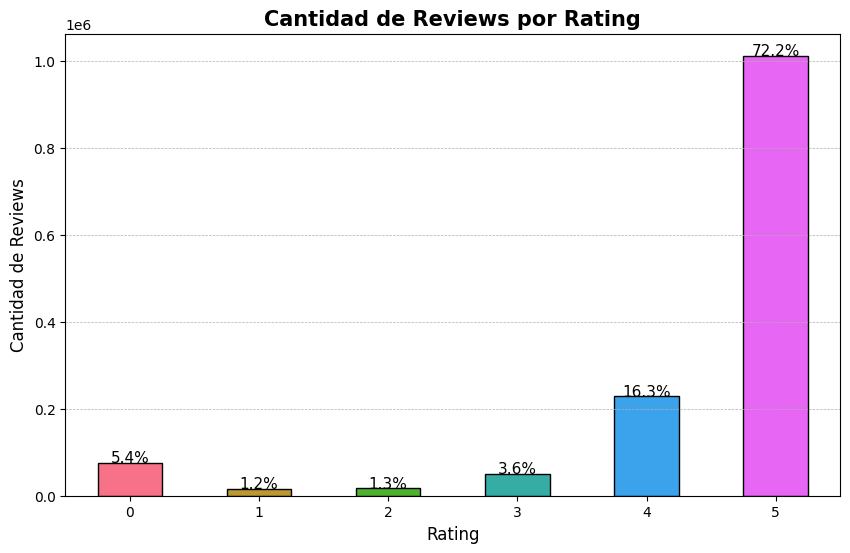

In [185]:
reviews_per_rating = df_reviews['rating'].value_counts().sort_index()
percentages = (reviews_per_rating / reviews_per_rating.sum()) * 100

plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(reviews_per_rating))

ax = reviews_per_rating.plot(kind='bar', color=colors, edgecolor='black')

for i, (count, percentage) in enumerate(zip(reviews_per_rating, percentages)):
    ax.text(i, count + 0.5, f'{percentage:.1f}%', ha='center', fontsize=11, color='black')

plt.title('Cantidad de Reviews por Rating', fontsize=15, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Cantidad de Reviews', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', linewidth=0.5)

plt.show()

In [186]:
variable = 'rating'

print(f'Min {variable}: ', df_reviews[f'{variable}'].min())
print(f'Max {variable}: ', df_reviews[f'{variable}'].max())

print(f'\n1º Quartile: ', df_reviews[f'{variable}'].quantile(q=0.25))
print(f'2º Quartile (Mediana): ', df_reviews[f'{variable}'].quantile(q=0.50))
print(f'3º Quartile: ', df_reviews[f'{variable}'].quantile(q=0.75))
print(f'4º Quartile: ', df_reviews[f'{variable}'].quantile(q=1.00))

Min rating:  0
Max rating:  5

1º Quartile:  4.0
2º Quartile (Mediana):  5.0
3º Quartile:  5.0
4º Quartile:  5.0


La mayoría de las reseñas tienen una calificación de 5 estrellas, lo que indica una tendencia a calificar las recetas de manera muy positiva. Es interesante notar que hay más reseñas con 0 estrellas que con 1, 2 o 3 estrellas. La escasez de reseñas con calificaciones bajas podría indicar que las reseñas más negativas son menos frecuentes o que los usuarios tienden a evitar dejar comentarios muy desfavorables.

### ***Cantidad de recetas por rating promedio***

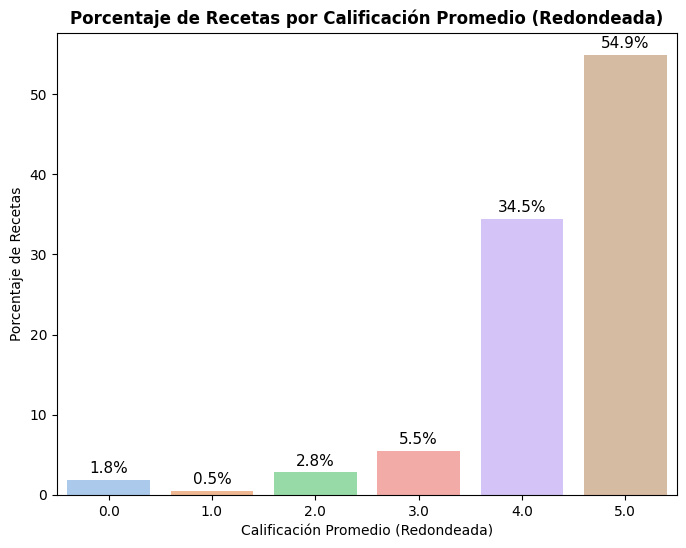

In [187]:
ratings_count = df_recipes.groupby(df_recipes['avg_rating'].round().clip(0, 5))['recipe_id'].count().reset_index(name='recipe_count')

total_recipes = ratings_count['recipe_count'].sum()

ratings_count['percentage'] = (ratings_count['recipe_count'] / total_recipes) * 100

plt.figure(figsize=(8, 6))
ax = sns.barplot(x='avg_rating', y='percentage', data=ratings_count, palette='pastel')

for p in ax.patches:
    percentage = f'{p.get_height():.1f}%'  # Formatear el porcentaje con un decimal
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Porcentaje de Recetas por Calificación Promedio (Redondeada)', fontweight='bold')
plt.xlabel('Calificación Promedio (Redondeada)')
plt.ylabel('Porcentaje de Recetas')
plt.xticks(rotation=0)

plt.show()

In [188]:
variable = 'avg_rating'

print(f'Min {variable}: ', df_recipes[f'{variable}'].min())
print(f'Max {variable}: ', df_recipes[f'{variable}'].max())

print(f'\n1º Quartile: ', df_recipes[f'{variable}'].quantile(q=0.25))
print(f'2º Quartile (Mediana): ', df_recipes[f'{variable}'].quantile(q=0.50))
print(f'3º Quartile: ', df_recipes[f'{variable}'].quantile(q=0.75))
print(f'4º Quartile: ', df_recipes[f'{variable}'].quantile(q=1.00))

Min avg_rating:  0.0
Max avg_rating:  5.0

1º Quartile:  4.0
2º Quartile (Mediana):  4.67
3º Quartile:  5.0
4º Quartile:  5.0


La mayoría de las recetas tienen un promedio de 4 o 5 estrellas, lo que es muy favorable para el desarrollo del sistema de recomendación, ya que indica que los usuarios generalmente están satisfechos con las recetas a recomendar.

### ***Relacion entre la cantidad de reseñas y la reseña promedio de la receta***

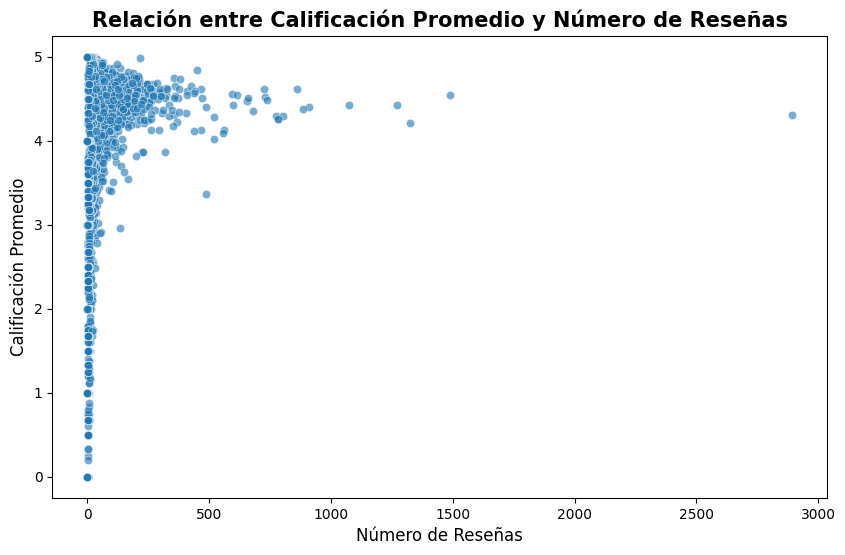

In [189]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_recipes, x='review_count', y='avg_rating', alpha=0.6)

plt.title('Relación entre Calificación Promedio y Número de Reseñas', fontsize=15, weight="bold")
plt.xlabel('Número de Reseñas', fontsize=12)
plt.ylabel('Calificación Promedio', fontsize=12)

plt.show()

Se ve que a medida que la receta tiene mayor numero de recetas, tiene un mejor puntaje promedio.

### **Frecuencia de Ingredientes**

`counts` es un diccionario que contiene el número de veces que cada ingrediente aparece en `ingredients_list`

In [190]:
tokens_corpus = [token for row in df_recipes['ingredients_list'] for token in row]
counts = nltk.FreqDist(tokens_corpus)
counts

FreqDist({'salt': 78760, 'onion': 54101, 'olive oil': 46192, 'butter': 46000, 'garlic cloves': 34431, 'water': 31644, 'pepper': 28529, 'milk': 22640, 'eggs': 22068, 'parmesan cheese': 20657, ...})

Operando sobre `counts` podemos calcular fácilmente el tamaño del vocabulario y la diversidad léxica:

In [191]:
vocab = len(counts.keys())
words = sum(counts.values())

lexdiv = float(words) / float(vocab)

print("El corpus tiene %i ingredientes distintos y un total de %i palabras con una diversidad léxica de %0.3f" % (vocab, words, lexdiv))

El corpus tiene 13672 ingredientes distintos y un total de 1995554 palabras con una diversidad léxica de 145.959


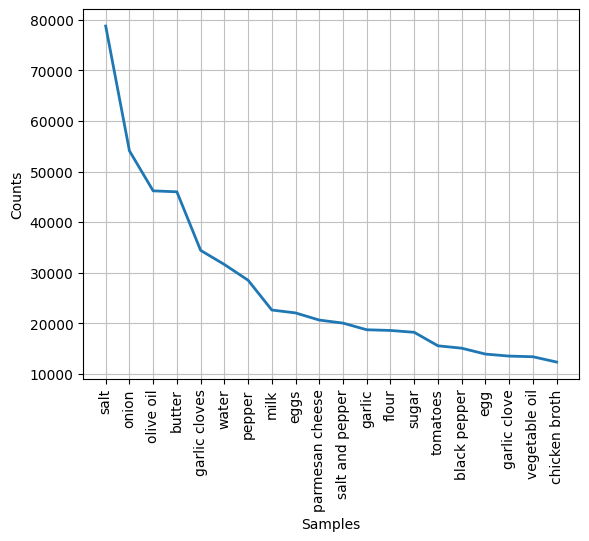

In [192]:
counts.plot(20, cumulative=False)
plt.show()

Más de 3,000 recetas incluyen ingredientes básicos como sal, cebolla, aceite de oliva, manteca, dientes de ajo, agua y pimienta, lo cual es lógico, ya que estos ingredientes son fundamentales en muchas preparaciones culinarias. 

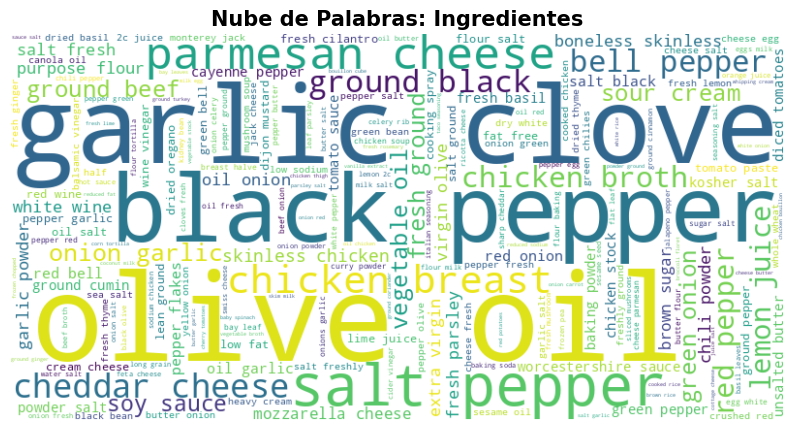

In [193]:
all_ingredients = ' '.join([' '.join(ingredients) for ingredients in df_recipes['ingredients_list']])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_ingredients)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras: Ingredientes', fontsize=15, fontweight='bold')
plt.savefig('wordcloud_ingredientes.png', format='png', bbox_inches='tight')
plt.show()

Se puede ver en la nube que las palabras mas grandes son las que mas veces aparecen, que son las mencionadas previamente.

Ahora veamos los ingrededientes menos frecuentes:

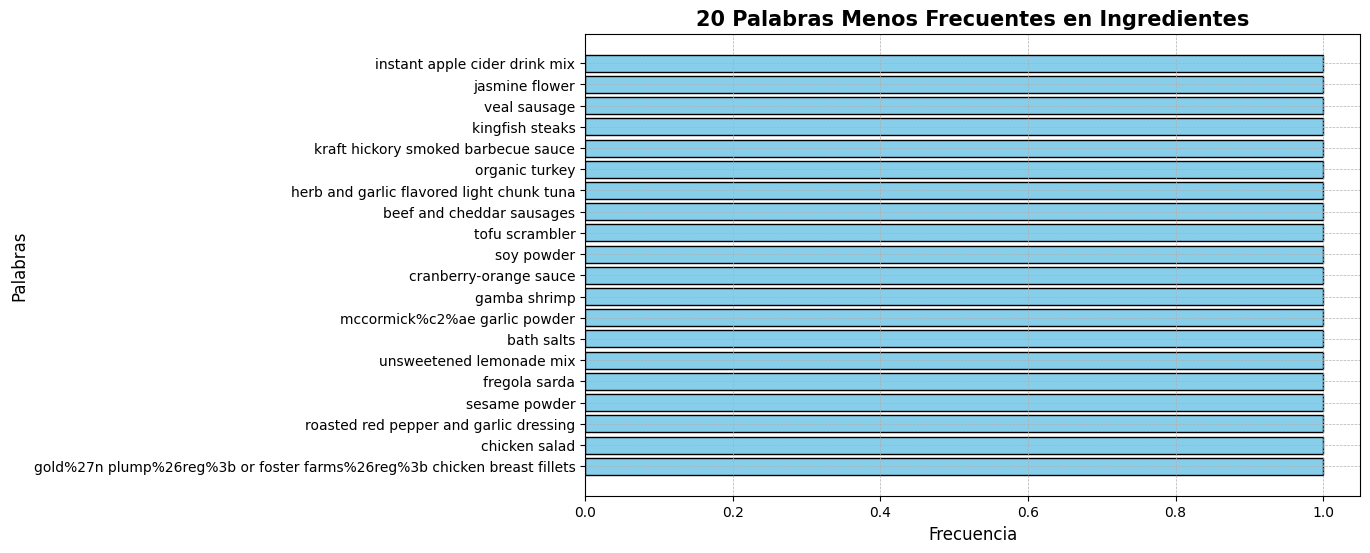

In [194]:
tokens_corpus = [token for row in df_recipes['ingredients_list'] for token in row]
counts = nltk.FreqDist(tokens_corpus)

sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1]))

least_frequent_words = list(sorted_counts.items())[:20]

words, freqs = zip(*least_frequent_words)

plt.figure(figsize=(10, 6))
plt.barh(words, freqs, color='skyblue', edgecolor='black')

plt.title('20 Palabras Menos Frecuentes en Ingredientes', fontsize=15, fontweight='bold')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Palabras', fontsize=12)

plt.gca().invert_yaxis()  # Para mostrar la palabra menos frecuente en la parte superior
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

Como se puede ver, hay ingredientes que tienen errores de registro que no identificamos previamente. Por ello vamos a eliminar las palabras que contengan caracteres como % dentro de los ingredientes para quedarnos unicamente con el ingrediente en cuestión.

In [195]:
def normalizar_texto(texto):
    if isinstance(texto, str):
        # Convertir a minúsculas
        texto = texto.lower()
        
        # Dividir el texto en palabras
        palabras = texto.split()
        
        # Filtrar las palabras que contienen caracteres especiales
        palabras_filtradas = []
        for palabra in palabras:
            # Si encontramos un caracter especial (%), eliminamos esta palabra y la siguiente
            if re.search(r'[%&@#$^*()_+\-=\[\]\{\};:\'",<>\./?\\|`~]', palabra):
                continue
            else:
                palabras_filtradas.append(palabra)
        
        # Volver a unir las palabras filtradas
        texto_normalizado = ' '.join(palabras_filtradas)
        
        # Eliminar números
        texto_normalizado = re.sub(r'\d+', '', texto_normalizado)
        
        # Eliminar caracteres especiales restantes (si existen) y quitar espacios extra
        texto_normalizado = re.sub(r'[^\w\s]', '', texto_normalizado)
        
        # Eliminar espacios extra entre las palabras
        texto_normalizado = re.sub(r'\s+', ' ', texto_normalizado).strip()
        
        return texto_normalizado
    elif isinstance(texto, list):
        # Si es una lista, aplicar la función recursivamente a cada elemento
        return [normalizar_texto(item) for item in texto]
    return texto


df_recipes['filtered_list'] = df_recipes['ingredients_list'].apply(normalizar_texto)
df_recipes[['ingredients_list', 'filtered_list']]

,ingredients_list,filtered_list
0,"[water, grits, salt, cheddar cheese, garlic, o...","[water, grits, salt, cheddar cheese, garlic, o..."
1,"[onion, red bell pepper, garlic cloves, large ...","[onion, red bell pepper, garlic cloves, large ..."
2,"[eggs, milk, fresh sage, fresh thyme, garlic c...","[eggs, milk, fresh sage, fresh thyme, garlic c..."
3,"[butter, onion, garlic, potatoes, flour, milk,...","[butter, onion, garlic, potatoes, flour, milk,..."
4,"[lean ground beef, ketchup, heinz chili sauce,...","[lean ground beef, ketchup, heinz chili sauce,..."
...,...,...
203554,"[ground sirloin, instant minced onion, taco se...","[ground sirloin, instant minced onion, taco se..."
203555,"[cod fish fillets, lemon juice, salt and peppe...","[cod fish fillets, lemon juice, salt and peppe..."
203556,"[chicken, garlic, dry white wine, lemon juice,...","[chicken, garlic, dry white wine, lemon juice,..."
203557,"[unbleached flour, baking soda, butter, orange...","[unbleached flour, baking soda, butter, orange..."


Verificamos que se haya realizado correctamente:

In [196]:
df_recipes['contains_%'] = df_recipes['ingredients_list'].apply(
    lambda x: '%' in ' '.join(x).lower()
)

df_recipes[['ingredients_list', 'filtered_list']][df_recipes['contains_%']]

,ingredients_list,filtered_list
6,"[button mushrooms, portabella mushrooms, olive...","[button mushrooms, portabella mushrooms, olive..."
17,"[skinless chicken breasts, carrots, celery, pa...","[skinless chicken breasts, carrots, celery, pa..."
46,"[chicken stock, garlic cloves, butter, olive o...","[chicken stock, garlic cloves, butter, olive o..."
58,"[extra virgin olive oil, boneless skinless chi...","[extra virgin olive oil, boneless skinless chi..."
86,"[beef stew meat, chicken stock, beets, onion, ...","[beef stew meat, chicken stock, beets, onion, ..."
...,...,...
203479,"[boneless skinless chicken breast halves, wate...","[boneless skinless chicken breast halves, wate..."
203498,"[pizza dough, sliced mushrooms, salt %26 fresh...","[pizza dough, sliced mushrooms, salt fresh gro..."
203499,"[boneless skinless chicken breasts, cooking oi...","[boneless skinless chicken breasts, cooking oi..."
203531,"[macaroni %26 cheese dinner mix, ground beef, ...","[macaroni cheese dinner mix, ground beef, pizz..."


In [197]:
# Eliminar la columna 'ingredients_list'
df_recipes.drop(columns='ingredients_list', inplace=True)
#Renombrar 'filtered_list' a 'ingredients_list'
df_recipes.rename(columns={'filtered_list': 'ingredients_list'}, inplace=True)

Ahora si veamos los ingredientes menos frecuentes:

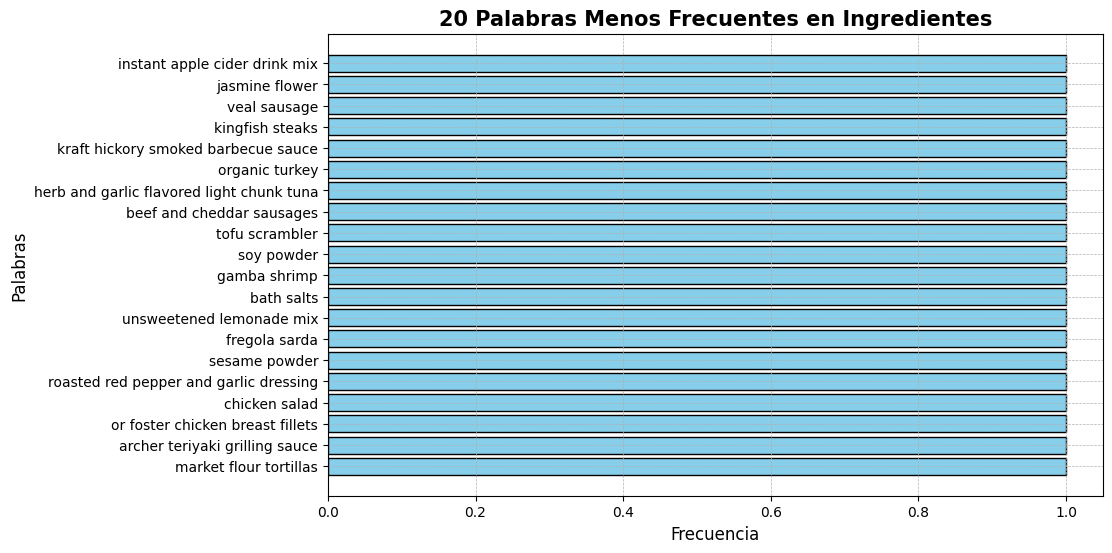

In [198]:
tokens_corpus = [token for row in df_recipes['ingredients_list'] for token in row]
counts = nltk.FreqDist(tokens_corpus)

sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1]))

least_frequent_words = list(sorted_counts.items())[:20]

words, freqs = zip(*least_frequent_words)

plt.figure(figsize=(10, 6))
plt.barh(words, freqs, color='skyblue', edgecolor='black')

plt.title('20 Palabras Menos Frecuentes en Ingredientes', fontsize=15, fontweight='bold')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Palabras', fontsize=12)

plt.gca().invert_yaxis()  # Para mostrar la palabra menos frecuente en la parte superior
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

La lista de ingredientes menos frecuentes es bastante variada, abarcando desde productos como veal sausage, kingfish steaks, chicken breast fillets hasta ingredientes más exóticos como jasmine flower, gamba shrimp, fregola sarda. 

### **Frecuencia de Keywords**

In [199]:
tokens_corpus = [token for row in df_recipes['keywords'] for token in row]
counts = nltk.FreqDist(tokens_corpus)
counts

FreqDist({'preparation': 203288, 'time-to-make': 203096, 'course': 188702, 'main-ingredient': 164629, 'dietary': 136911, 'dinner': 120106, 'easy': 104206, 'low-carb': 96803, 'main-dish': 96514, 'occasion': 86858, ...})

Como las primeras 2 palabras, que son las mas frequentes, son palabras que justo no dicen nada acerca del plato, vamos a eliminarlas.

In [200]:
df_recipes['keywords'] = df_recipes['keywords'].apply(lambda x: [keyword for keyword in x if keyword not in ['preparation', 'time-to-make']])

In [201]:
tokens_corpus = [token for row in df_recipes['keywords'] for token in row]
counts = nltk.FreqDist(tokens_corpus)
counts

FreqDist({'course': 188702, 'main-ingredient': 164629, 'dietary': 136911, 'dinner': 120106, 'easy': 104206, 'low-carb': 96803, 'main-dish': 96514, 'occasion': 86858, '60-minutes-or-less': 84151, 'low-calorie': 82988, ...})

Ahora si veamos la distribucion de las palabras.

In [202]:
vocab = len(counts.keys())
words = sum(counts.values())

lexdiv = float(words) / float(vocab)

print("El corpus tiene %i keywords distintos y un total de %i palabras con una diversidad léxica de %0.3f" % (vocab, words, lexdiv))

El corpus tiene 553 keywords distintos y un total de 3733073 palabras con una diversidad léxica de 6750.584


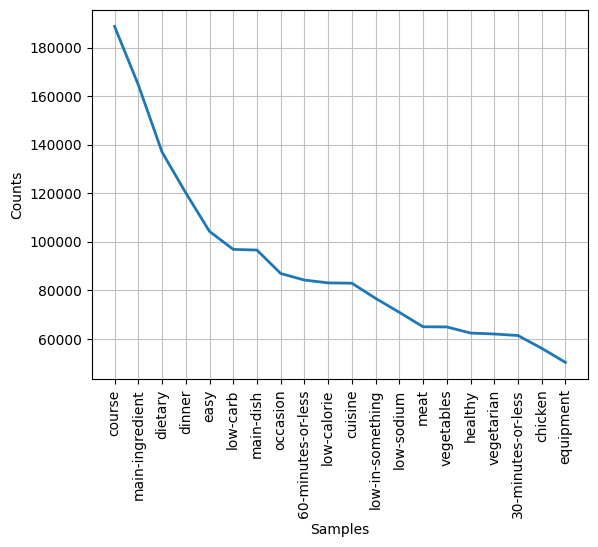

In [203]:
counts.plot(20, cumulative=False)
plt.show()

Las palabras mas frecuentes son: plato, que hace referencia a que la receta es un plato de comida, ingrediente principal, dietetico, cena, facil, bajo en carbohidratos entre otras.

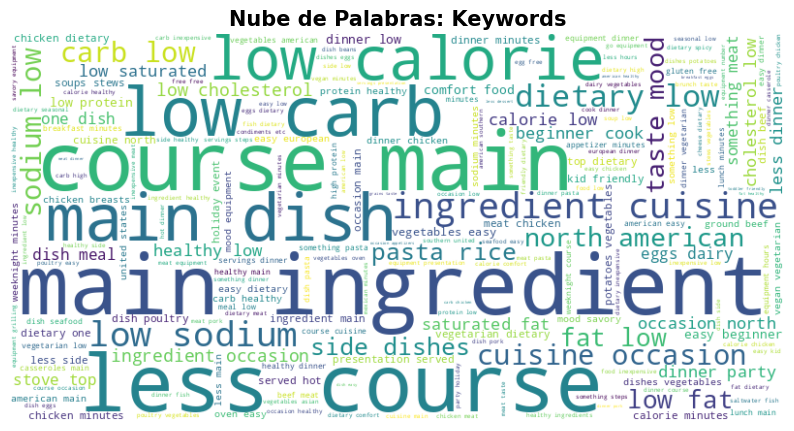

In [204]:
all_ingredients = ' '.join([' '.join(ingredients) for ingredients in df_recipes['keywords']])

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_ingredients)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras: Keywords', fontsize=15, fontweight='bold')
plt.savefig('wordcloud_keywords.png', format='png', bbox_inches='tight')
plt.show()

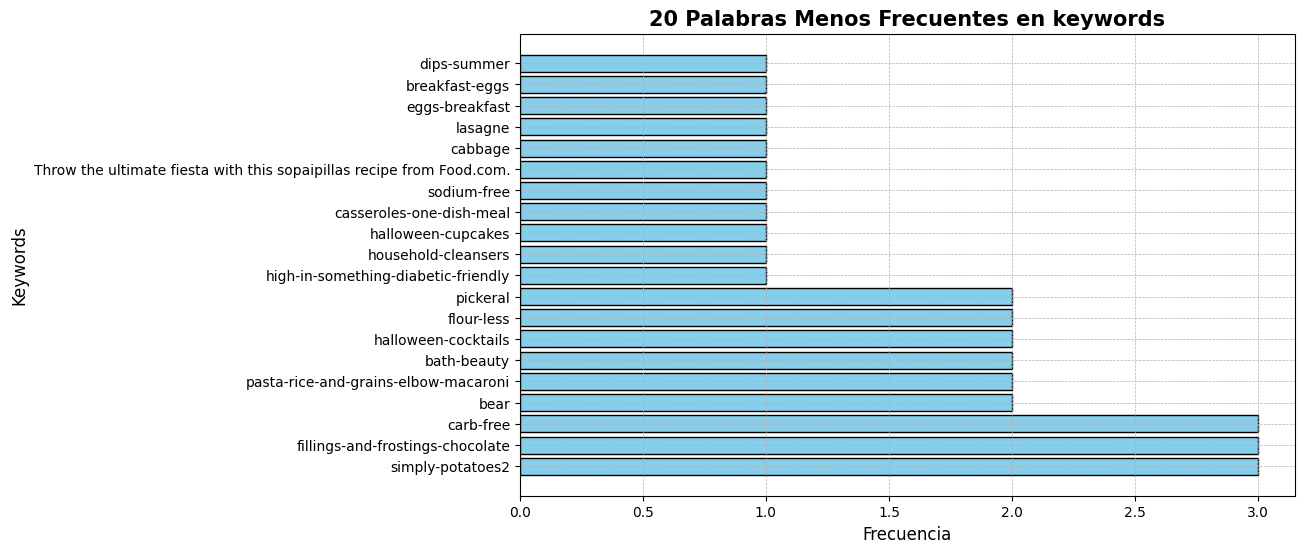

In [211]:
tokens_corpus = [token for row in df_recipes['keywords'] for token in row]
counts = nltk.FreqDist(tokens_corpus)

sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1]))

least_frequent_words = list(sorted_counts.items())[:20]

words, freqs = zip(*least_frequent_words)

plt.figure(figsize=(10, 6))
plt.barh(words, freqs, color='skyblue', edgecolor='black')

plt.title('20 Palabras Menos Frecuentes en keywords', fontsize=15, fontweight='bold')
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Keywords', fontsize=12)

plt.gca().invert_yaxis()  # Para mostrar la palabra menos frecuente en la parte superior
plt.grid(True, linestyle='--', linewidth=0.5)

plt.show()

# **Exportacion de datos**

Una vez filtrado y hecho el analisis EDA, exportemos los dataframes preprocesados para seguir trabajando en otra notebook.

In [206]:
df_recipes_filtered.head()

,name,description,servings,recipe_id,recipe_grams,recipe_minutes,ingredients_list,ingredients_and_quantities,instructions,keywords,...,sodium_100g,carbohydrate_100g,fiber_100g,sugar_100g,protein_100g,time_group,avg_rating,review_count,n_ingredients,nutriscore
0,Bourbon Chicken,I searched and finally found this recipe on th...,4,45809.0,330.0,35.0,"[boneless chicken breasts, olive oil, garlic c...","[2 lbs boneless chicken breasts, cut into bite...",[1. Editor's Note: Named Bourbon Chicken beca...,"[dinner, chinese, low-carb, chicken, 60-minute...",...,476.67,7.09,0.09,6.52,15.18,30-40,4.31,2892.0,11,C
1,Creamy Cajun Chicken Pasta,N'awlin's style of chicken with an updated Alf...,2,39087.0,373.0,25.0,"[boneless skinless chicken breast halves, ling...","[2 boneless skinless chicken breast halves, cu...",[1. Place chicken and Cajun seasoning in a bow...,"[pasta, dinner, cajun, southern, chicken, 30-m...",...,218.98,12.71,0.67,0.83,10.54,20-30,4.54,1491.0,12,D
2,"Yes, Virginia There is a Great Meatloaf",Absolutely delicious meatloaf and sauce! Those...,4,54257.0,232.0,80.0,"[ground beef, bread, egg, vidalia onions, tabl...",[1 1/2 lbs ground beef (ground shoulder roast ...,[1. Meatloaf: Combine meat loaf ingredients an...,"[dinner, southern, low-carb, time-to-make, cou...",...,543.32,10.00,0.17,8.15,15.30,80-90,4.21,1325.0,11,D
3,Jo Mama's World Famous Spaghetti,My kids will give up a steak dinner for this s...,10,22782.0,285.0,80.0,"[italian sausage, onion, garlic cloves, diced ...","[2 lbs Italian sausage, casings removed (mild ...","[1. In large, heavy stockpot, brown Italian sa...","[dinner, pasta, italian, weeknight, time-to-ma...",...,722.32,17.58,1.33,4.00,10.46,80-90,4.42,1273.0,16,D
4,Pancakes,"This is really a great recipe! It is fast, sim...",1,25690.0,407.0,10.0,"[egg, milk, butter, flour, sugar, baking powde...","[1 egg, 3/4 cup milk, 2 tablespoons butter or ...","[1. Beat egg until fluffy., 2. Add milk and me...","[breakfast, 15-minutes-or-less, time-to-make, ...",...,51.65,3.22,0.10,0.37,0.69,10-20,4.43,1076.0,7,A


In [207]:
bucket_name = 'mi-bucket-tfg'
pickle_file_path = 'df_recipes_filtered.pkl'

df_recipes_filtered.to_pickle(pickle_file_path)

# Conectar con el cliente de Google Cloud Storage
client = storage.Client()
bucket = client.bucket(bucket_name)
blob = bucket.blob('datos/df_recipes_filtered.pkl')

# Subir el archivo pickle al bucket
blob.upload_from_filename(pickle_file_path)

print(f'El archivo pickle ha sido subido exitosamente al bucket {bucket_name}')

El archivo pickle ha sido subido exitosamente al bucket mi-bucket-tfg


In [208]:
df_reviews_filtered.head()

,review_id,recipe_id,author_id,rating,review,review_date
0,9,4523,2046,2,i think i did something wrong because i could ...,2000
1,14,44,2085,5,An excellent dish.,2000
2,23,4684,2046,5,this is absolutely delicious. i even served i...,2000
3,28,1451,2416,1,Where does the bbq come in,2000
4,55,7762,2369,3,They taste better than they appear.\r\n,2000


In [209]:
bucket_name = 'mi-bucket-tfg'
pickle_file_path = 'df_reviews_filtered.pkl'

df_reviews_filtered.to_pickle(pickle_file_path)

# Conectar con el cliente de Google Cloud Storage
client = storage.Client()
bucket = client.bucket(bucket_name)
blob = bucket.blob('datos/df_reviews_filtered.pkl')

# Subir el archivo pickle al bucket
blob.upload_from_filename(pickle_file_path)

print(f'El archivo pickle ha sido subido exitosamente al bucket {bucket_name}')

El archivo pickle ha sido subido exitosamente al bucket mi-bucket-tfg
